ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ

1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)
--------------------------------------------------


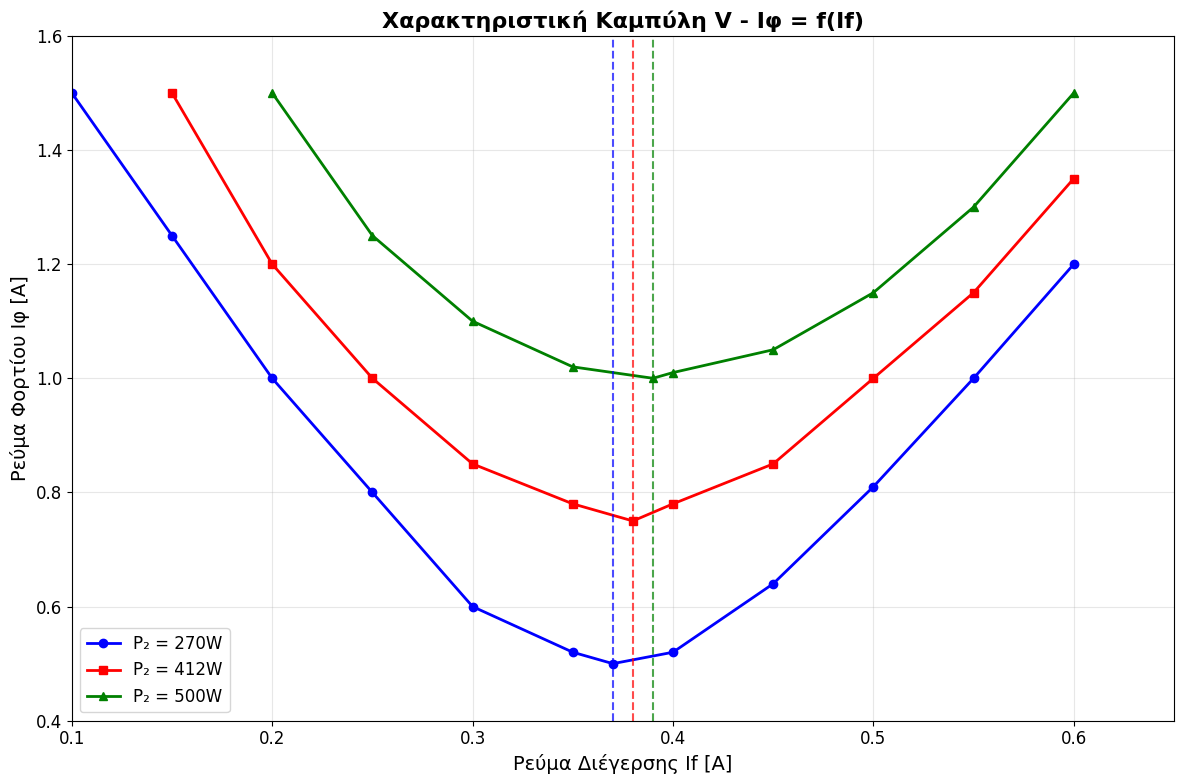


2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)
--------------------------------------------------


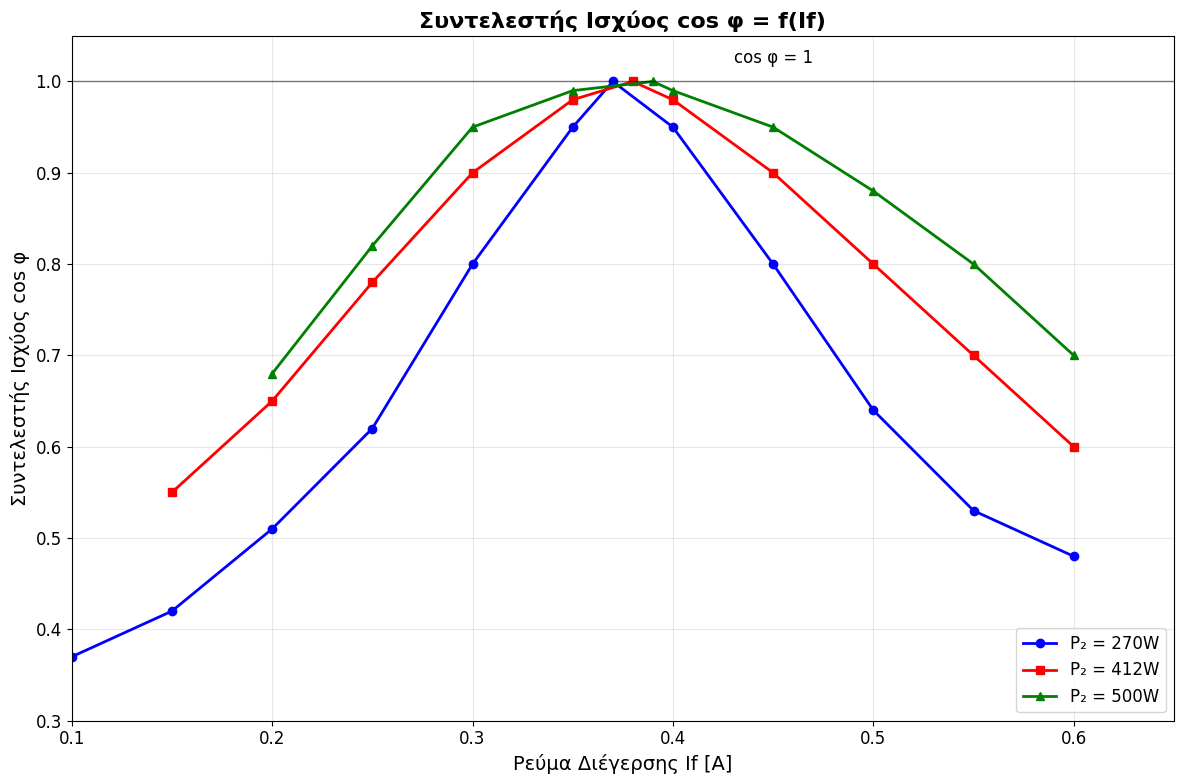


3. ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ
--------------------------------------------------
Φασική τάση V_φ = 230.9 V

Υποδιέγερση (If = 0.3A):
cos φ = 0.95, sin φ = 0.312
φ = 18.2°

Υπερδιέγερση (If = 0.5A):
cos φ = 0.88, sin φ = -0.475
φ = -28.4°

Υπολογισμένη επαγόμενη τάση:
Υποδιέγερση: E_a = 237.9 V
Υπερδιέγερση: E_a = 250.2 V


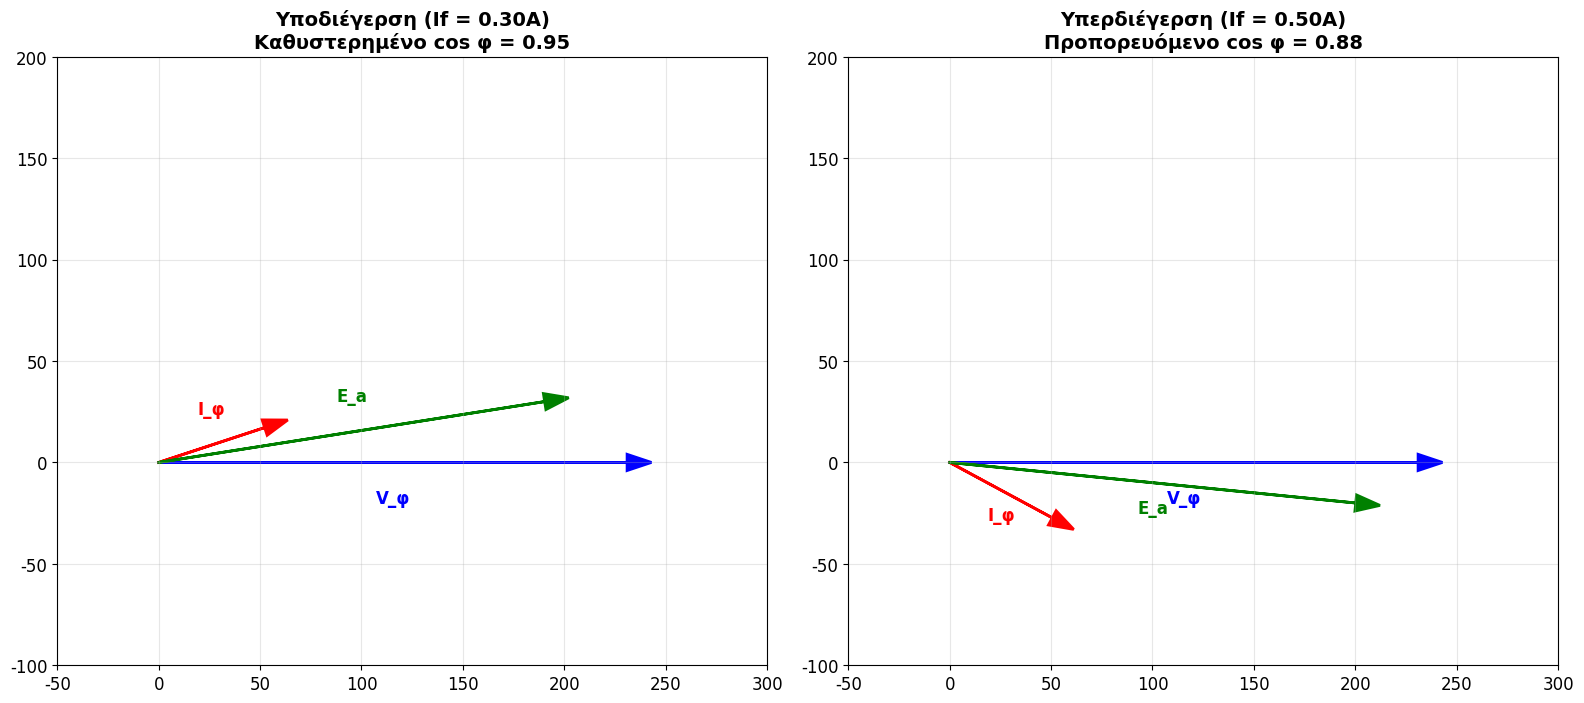


4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)
--------------------------------------------------
Μέγιστη ροπή (ροπή ανατροπής): T_max = 36.79 Nm

5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ
--------------------------------------------------
Ισχύς εισόδου: P_in = 692 W
Απώλειες: P_losses = 75 W
Μηχανική ισχύς: P_mech = 617 W
Ισχύς εξόδου: P_out = 500 W
Ροπή φορτίου: T_load = 3.93 Nm
Ονομαστική ισχύς (εκτίμηση): P_rated = 640 W
Ονομαστική ροπή: T_rated = 4.07 Nm

Σύγκριση ροπών:
T_load / T_rated = 0.96
T_max / T_rated = 9.03

ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
                   Παράμετρος     Τιμή         Παρατηρήσεις
              Φασική τάση V_φ  230.9 V        Τάση αναφοράς
 Επαγόμενη τάση (υποδιέγερση)  237.9 V  Καθυστερημένο cos φ
Επαγόμενη τάση (υπερδιέγερση)  250.2 V  Προπορευόμενο cos φ
           Μέγιστη ροπή T_max 36.79 Nm    Όριο σταθερότητας
          Ροπή φορτίου T_load  3.93 Nm   Λειτουργικό σημείο
      Ονομαστική ροπή T_rated  4.07 Nm Ονομαστικές συνθήκες

ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as patches

# Ρυθμίσεις για ελληνικό κείμενο
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# Δεδομένα από τους πίνακες
# Πίνακας 1: P2 = 270W
data_270W = {
    'If': [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.37, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.00, 0.80, 0.60, 0.52, 0.50, 0.52, 0.64, 0.81, 1.00, 1.20],
    'P': [384, 362, 353, 343, 332, 342, 346, 342, 350, 360, 367, 400],
    'S': [1040, 860, 690, 550, 415, 360, 346, 360, 440, 560, 695, 830],
    'Q': [965, 785, 595, 430, 250, 110, 0, -110, -260, -430, -585, -728],
    'cos_phi': [0.37, 0.42, 0.51, 0.62, 0.80, 0.95, 1.00, 0.95, 0.80, 0.64, 0.53, 0.48]
}

# Πίνακας 2: P2 = 412W
data_412W = {
    'If': [0.15, 0.20, 0.25, 0.30, 0.35, 0.38, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.20, 1.00, 0.85, 0.78, 0.75, 0.78, 0.85, 1.00, 1.15, 1.35],
    'P': [570, 540, 540, 530, 530, 520, 530, 530, 555, 560, 563],
    'S': [1030, 830, 700, 590, 540, 520, 540, 590, 700, 800, 930],
    'Q': [870, 630, 430, 250, 100, 0, -100, -250, -410, -570, -750],
    'cos_phi': [0.55, 0.65, 0.78, 0.90, 0.98, 1.00, 0.98, 0.90, 0.80, 0.70, 0.60]
}

# Πίνακας 3: P2 = 500W
data_500W = {
    'If': [0.20, 0.25, 0.30, 0.35, 0.39, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.10, 1.02, 1.00, 1.01, 1.05, 1.15, 1.30, 1.50],
    'P': [706, 710, 725, 700, 692, 692, 690, 700, 720, 727],
    'S': [1035, 865, 760, 705, 692, 700, 727, 800, 900, 1035],
    'Q': [760, 495, 240, 100, 0, -100, -230, -380, -540, -740],
    'cos_phi': [0.68, 0.82, 0.95, 0.99, 1.00, 0.99, 0.95, 0.88, 0.80, 0.70]
}

# Στοιχεία μηχανής
machine_data = {
    'S_rated': 0.8,  # kVA
    'U_rated': 400,  # V
    'I_rated': 1.6,  # A (Y connection)
    'If_rated': 0.6,  # A
    'n_sync': 1500,  # rpm
    'R_stator': 10.8,  # Ω
    'R_field': 440   # Ω
}

print("=" * 80)
print("ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ")
print("=" * 80)

# ΕΡΩΤΗΜΑ 1: Χαρακτηριστική καμπύλη V - I_φ = f(I_f)
print("\n1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['I_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['I_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['I_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Ρεύμα Φορτίου Iφ [A]', fontsize=14)
plt.title('Χαρακτηριστική Καμπύλη V - Iφ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.1, 0.65)
plt.ylim(0.4, 1.6)

# Προσθήκη σημείων μοναδιαίου συντελεστή ισχύος
plt.axvline(x=0.37, color='blue', linestyle='--', alpha=0.7, label='cos φ = 1 (270W)')
plt.axvline(x=0.38, color='red', linestyle='--', alpha=0.7, label='cos φ = 1 (412W)')
plt.axvline(x=0.39, color='green', linestyle='--', alpha=0.7, label='cos φ = 1 (500W)')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 2: Συντελεστής ισχύος cos φ = f(I_f)
print("\n2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['cos_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['cos_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['cos_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Συντελεστής Ισχύος cos φ', fontsize=14)
plt.title('Συντελεστής Ισχύος cos φ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.1, 0.65)
plt.ylim(0.3, 1.05)

# Γραμμή για cos φ = 1
plt.axhline(y=1.0, color='black', linestyle='-', alpha=0.5, linewidth=1)
plt.text(0.45, 1.02, 'cos φ = 1', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 3: Διανυσματικά διαγράμματα
print("\n3. ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ")
print("-" * 50)

# Επιλογή δεδομένων από πίνακα 3 (P2 = 500W)
# Υποδιέγερση: If = 0.30A, I_phi = 1.10A, cos_phi = 0.95 (καθυστερημένο)
# Υπερδιέγερση: If = 0.50A, I_phi = 1.15A, cos_phi = 0.88 (προπορευόμενο)

# Δεδομένα για υποδιέγερση
If_under = 0.30
I_phi_under = 1.10
cos_phi_under = 0.95
P_under = 725
Q_under = 240  # Θετικό Q -> καθυστερημένο cos φ

# Δεδομένα για υπερδιέγερση
If_over = 0.50
I_phi_over = 1.15
cos_phi_over = 0.88
P_over = 700
Q_over = -380  # Αρνητικό Q -> προπορευόμενο cos φ

# Υπολογισμοί για διανυσματικά διαγράμματα
V_phi = 400 / np.sqrt(3)  # Φασική τάση (Y σύνδεση)
print(f"Φασική τάση V_φ = {V_phi:.1f} V")

# Για υποδιέγερση
sin_phi_under = np.sqrt(1 - cos_phi_under**2)
phi_under = np.arccos(cos_phi_under)
print(f"\nΥποδιέγερση (If = {If_under}A):")
print(f"cos φ = {cos_phi_under:.2f}, sin φ = {sin_phi_under:.3f}")
print(f"φ = {np.degrees(phi_under):.1f}°")

# Για υπερδιέγερση
sin_phi_over = -np.sqrt(1 - cos_phi_over**2)  # Αρνητικό για προπορευόμενο
phi_over = -np.arccos(cos_phi_over)
print(f"\nΥπερδιέγερση (If = {If_over}A):")
print(f"cos φ = {cos_phi_over:.2f}, sin φ = {sin_phi_over:.3f}")
print(f"φ = {np.degrees(phi_over):.1f}°")

# Υπολογισμός Ea (επαγόμενη τάση)
X_s = 15.0  # Εκτίμηση σύγχρονης αντίδρασης (Ω)

# Για υποδιέγερση
I_d_under = I_phi_under * sin_phi_under
I_q_under = I_phi_under * cos_phi_under
E_a_under = np.sqrt((V_phi + machine_data['R_stator'] * I_q_under - X_s * I_d_under)**2 +
                    (machine_data['R_stator'] * I_d_under + X_s * I_q_under)**2)

# Για υπερδιέγερση
I_d_over = I_phi_over * sin_phi_over
I_q_over = I_phi_over * cos_phi_over
E_a_over = np.sqrt((V_phi + machine_data['R_stator'] * I_q_over - X_s * I_d_over)**2 +
                   (machine_data['R_stator'] * I_d_over + X_s * I_q_over)**2)

print(f"\nΥπολογισμένη επαγόμενη τάση:")
print(f"Υποδιέγερση: E_a = {E_a_under:.1f} V")
print(f"Υπερδιέγερση: E_a = {E_a_over:.1f} V")

# Σχεδίαση διανυσματικών διαγραμμάτων
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Διάγραμμα υποδιέγερσης
ax1.set_xlim(-50, 300)
ax1.set_ylim(-100, 200)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('Υποδιέγερση (If = 0.30A)\nΚαθυστερημένο cos φ = 0.95', fontsize=14, fontweight='bold')

# Διανύσματα
V_vec = [V_phi, 0]
I_vec = [I_phi_under * cos_phi_under * 50, I_phi_under * sin_phi_under * 50]  # Κλίμακα για οπτικοποίηση
E_vec = [E_a_under * 0.8, 30]  # Προσαρμοσμένη θέση

ax1.arrow(0, 0, V_vec[0], V_vec[1], head_width=8, head_length=12, fc='blue', ec='blue', linewidth=2)
ax1.arrow(0, 0, I_vec[0], I_vec[1], head_width=8, head_length=12, fc='red', ec='red', linewidth=2)
ax1.arrow(0, 0, E_vec[0], E_vec[1], head_width=8, head_length=12, fc='green', ec='green', linewidth=2)

ax1.text(V_vec[0]/2, -20, 'V_φ', fontsize=12, ha='center', color='blue', fontweight='bold')
ax1.text(I_vec[0]/2, I_vec[1]/2+15, 'I_φ', fontsize=12, ha='center', color='red', fontweight='bold')
ax1.text(E_vec[0]/2, E_vec[1]/2+15, 'E_a', fontsize=12, ha='center', color='green', fontweight='bold')

# Διάγραμμα υπερδιέγερσης
ax2.set_xlim(-50, 300)
ax2.set_ylim(-100, 200)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('Υπερδιέγερση (If = 0.50A)\nΠροπορευόμενο cos φ = 0.88', fontsize=14, fontweight='bold')

# Διανύσματα
I_vec2 = [I_phi_over * cos_phi_over * 50, I_phi_over * sin_phi_over * 50]
E_vec2 = [E_a_over * 0.8, -20]

ax2.arrow(0, 0, V_vec[0], V_vec[1], head_width=8, head_length=12, fc='blue', ec='blue', linewidth=2)
ax2.arrow(0, 0, I_vec2[0], I_vec2[1], head_width=8, head_length=12, fc='red', ec='red', linewidth=2)
ax2.arrow(0, 0, E_vec2[0], E_vec2[1], head_width=8, head_length=12, fc='green', ec='green', linewidth=2)

ax2.text(V_vec[0]/2, -20, 'V_φ', fontsize=12, ha='center', color='blue', fontweight='bold')
ax2.text(I_vec2[0]/2, I_vec2[1]/2-15, 'I_φ', fontsize=12, ha='center', color='red', fontweight='bold')
ax2.text(E_vec2[0]/2, E_vec2[1]/2-15, 'E_a', fontsize=12, ha='center', color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 4: Μέγιστη ροπή (ροπή ανατροπής)
print("\n4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)")
print("-" * 50)

# Χρησιμοποιώντας την περίπτωση υπερδιέγερσης
# Τύπος: T_max = (3 * V_φ * E_a) / (2π * f * X_s)
f = 50  # Hz
omega_s = 2 * np.pi * f  # rad/s
n_sync_rad = (machine_data['n_sync'] * 2 * np.pi) / 60  # rad/s

T_max = (3 * V_phi * E_a_over) / (omega_s * X_s)
print(f"Μέγιστη ροπή (ροπή ανατροπής): T_max = {T_max:.2f} Nm")

# ΕΡΩΤΗΜΑ 5: Ροπή φορτίου και ονομαστική ροπή
print("\n5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ")
print("-" * 50)

# Από τον πίνακα 3, πράσινη στήλη (If = 0.39A, cos φ = 1)
P_in_green = 692  # W
P_out_green = 500  # W (P2)
losses = 75  # W
P_mech = P_in_green - losses  # Μηχανική ισχύς

print(f"Ισχύς εισόδου: P_in = {P_in_green} W")
print(f"Απώλειες: P_losses = {losses} W")
print(f"Μηχανική ισχύς: P_mech = {P_mech} W")
print(f"Ισχύς εξόδου: P_out = {P_out_green} W")

# Ροπή φορτίου
T_load = P_mech / n_sync_rad
print(f"Ροπή φορτίου: T_load = {T_load:.2f} Nm")

# Ονομαστική ροπή
P_rated = machine_data['S_rated'] * 1000 * 0.8  # Υποθέτουμε cos φ = 0.8
T_rated = P_rated / n_sync_rad
print(f"Ονομαστική ισχύς (εκτίμηση): P_rated = {P_rated:.0f} W")
print(f"Ονομαστική ροπή: T_rated = {T_rated:.2f} Nm")

# Σύγκριση ροπών
print(f"\nΣύγκριση ροπών:")
print(f"T_load / T_rated = {T_load/T_rated:.2f}")
print(f"T_max / T_rated = {T_max/T_rated:.2f}")

# Δημιουργία πίνακα αποτελεσμάτων
print("\n" + "="*80)
print("ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ")
print("="*80)

results_data = {
    'Παράμετρος': ['Φασική τάση V_φ', 'Επαγόμενη τάση (υποδιέγερση)', 'Επαγόμενη τάση (υπερδιέγερση)',
                   'Μέγιστη ροπή T_max', 'Ροπή φορτίου T_load', 'Ονομαστική ροπή T_rated'],
    'Τιμή': [f'{V_phi:.1f} V', f'{E_a_under:.1f} V', f'{E_a_over:.1f} V',
             f'{T_max:.2f} Nm', f'{T_load:.2f} Nm', f'{T_rated:.2f} Nm'],
    'Παρατηρήσεις': ['Τάση αναφοράς', 'Καθυστερημένο cos φ', 'Προπορευόμενο cos φ',
                     'Όριο σταθερότητας', 'Λειτουργικό σημείο', 'Ονομαστικές συνθήκες']
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ")
print("="*80)

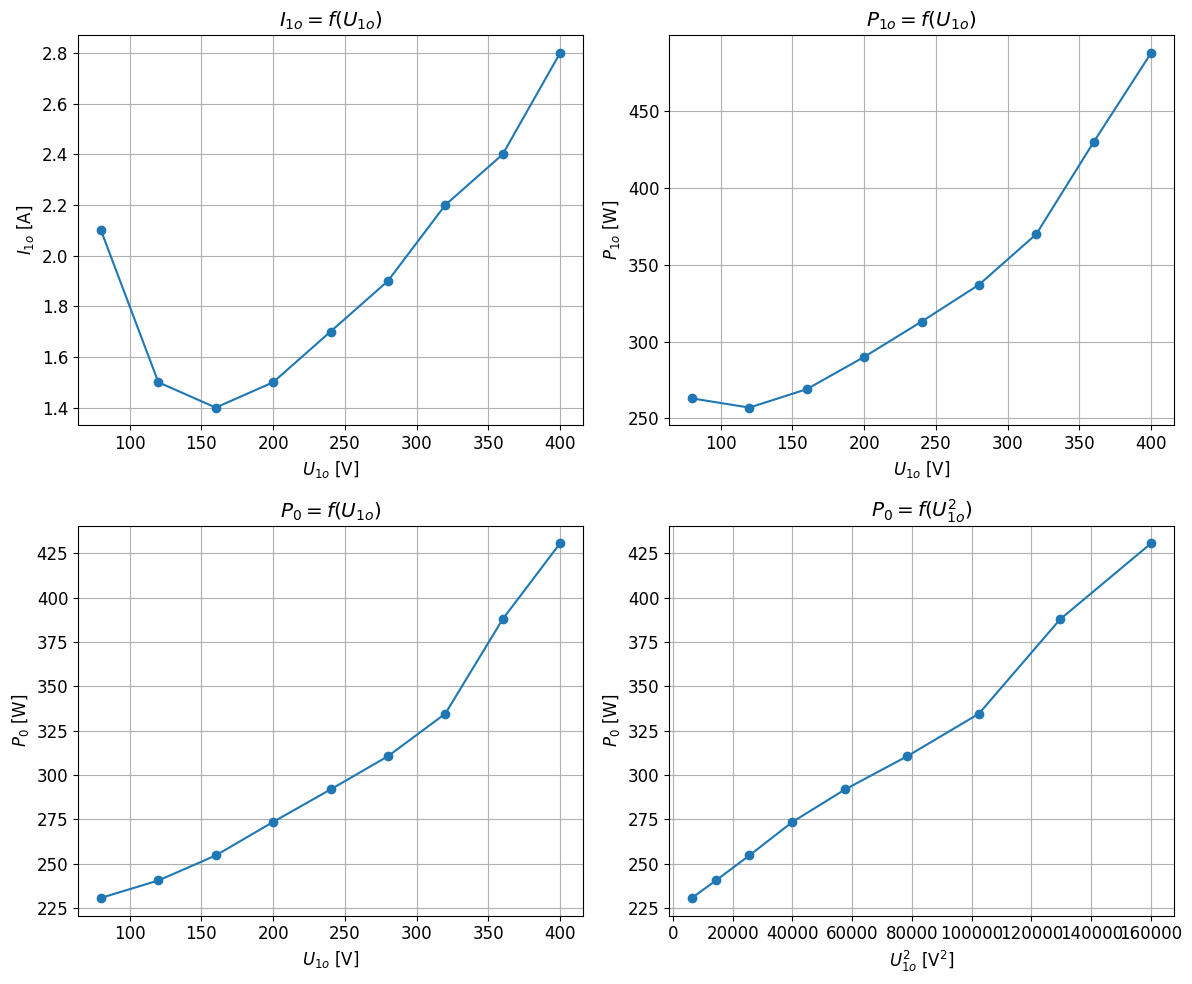

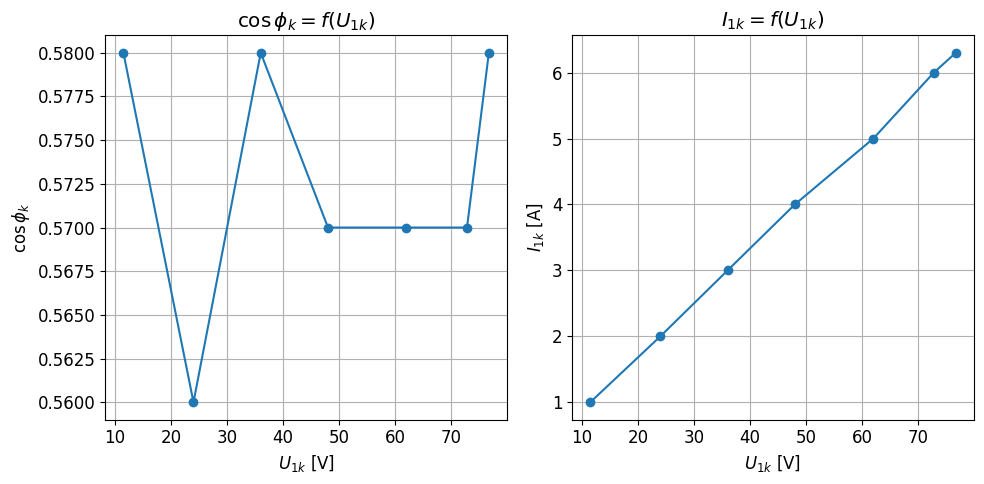

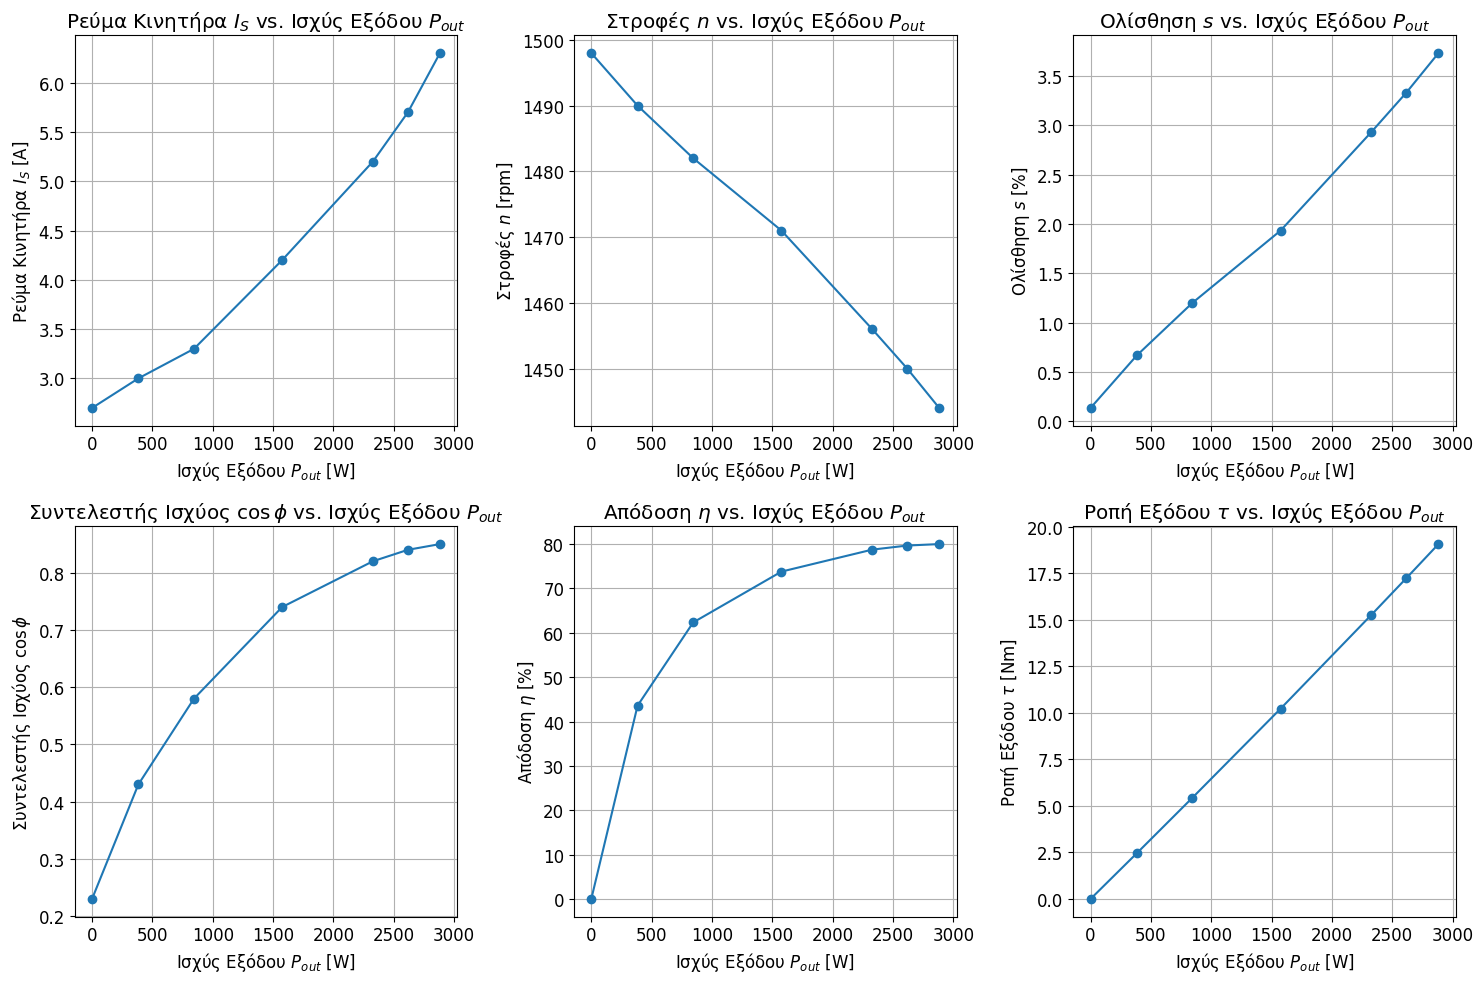

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Δεδομένα για R_s = 2.44 Ohm (ΑΜ: XX44) ---
Rs = 2.44

# --- Δεδομένα από τους Πίνακες ---

# Πίνακας ΔΟΚΙΜΗ ΧΩΡΙΣ ΦΟΡΤΙΟ
U1_0 = np.array([400, 360, 320, 280, 240, 200, 160, 120, 80])
I1_0 = np.array([2.8, 2.4, 2.2, 1.9, 1.7, 1.5, 1.4, 1.5, 2.1])
P1_0 = np.array([488, 430, 370, 337, 313, 290, 269, 257, 263])
Q0 = np.array([1868, 1453, 1154, 865, 629, 436, 288, 185, 141])
S0 = np.array([1931, 1511, 1216, 932, 704, 525, 395, 317, 299])
cosphi0 = np.array([0.25, 0.28, 0.30, 0.36, 0.45, 0.55, 0.68, 0.81, 0.88])
n_no_load = np.array([1497, 1494, 1495, 1491, 1491, 1488, 1479, 1459, 1384])

# Υπολογισμοί για Πίνακα ΔΟΚΙΜΗ ΧΩΡΙΣ ΦΟΡΤΙΟ
Pcu1_0 = 3 * I1_0**2 * Rs
P0 = P1_0 - Pcu1_0
U1_0_squared = U1_0**2

# Πίνακας ΔΟΚΙΜΗ ΑΚΙΝΗΤΟΠΟΙΗΜΕΝΟΥ ΔΡΟΜΕΑ
U1_K = np.array([11.5, 24, 36, 48, 62, 72.8, 76.7])
I1_K = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.3])
P1_K = np.array([11.2, 46, 108.2, 187.7, 313, 431, 480])
Qk = np.array([15.7, 68.5, 150.5, 271.1, 449, 614, 677])
Sk = np.array([19.3, 82.6, 185, 330.2, 547, 750, 831])
cosphiK = np.array([0.58, 0.56, 0.58, 0.57, 0.57, 0.57, 0.58])

# Πίνακας ΦΟΡΤΙΣΗ ΑΣΥΓΧΡΟΝΟΥ ΚΙΝΗΤΗΡΑ
Us = np.array([400, 400, 400, 400, 400, 400, 400])
Is = np.array([2.7, 3.0, 3.3, 4.2, 5.2, 5.7, 6.3])
Pin = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])
Qin = np.array([1842, 1850, 1872, 1947, 2070, 2145, 2205])
Sin = np.array([1898, 2051, 2312, 2890, 3600, 3924, 4219])
cosphi_load = np.array([0.23, 0.43, 0.58, 0.74, 0.82, 0.84, 0.85])
n_load = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])

# --- Υπολογισμοί για Πίνακα ΦΟΡΤΙΣΗ ΑΣΥΓΧΡΟΝΟΥ ΚΙΝΗΤΗΡΑ ---
ns = 1500 # rpm
omega_s = (2 * np.pi * ns) / 60 # rad/s

# Απώλειες από Ερώτημα 3 (υπολογίζονται από το script)
Pfe = 199.94
Pmech = 230.68

s_percent = ((ns - n_load) / ns) * 100
Pcu_load = 3 * Is**2 * Rs
Pout = Pin - Pfe - Pmech - Pcu_load
# Λόγω αρνητικής Pout στην πρώτη μέτρηση, την θέτουμε 0 για υπολογισμό ροπής/απόδοσης
Pout[Pout < 0] = 0
omega_load = (2 * np.pi * n_load) / 60
tau_out = Pout / omega_load
eta_percent = (Pout / Pin) * 100
eta_percent[np.isnan(eta_percent)] = 0 # Handle division by zero for Pout=0

# --- Γραφικές Παραστάσεις Ερώτημα 1 ---
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(U1_0, I1_0, marker='o', linestyle='-')
plt.title('$I_{1o} = f(U_{1o})$')
plt.xlabel('$U_{1o}$ [V]')
plt.ylabel('$I_{1o}$ [A]')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(U1_0, P1_0, marker='o', linestyle='-')
plt.title('$P_{1o} = f(U_{1o})$')
plt.xlabel('$U_{1o}$ [V]')
plt.ylabel('$P_{1o}$ [W]')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(U1_0, P0, marker='o', linestyle='-')
plt.title('$P_0 = f(U_{1o})$')
plt.xlabel('$U_{1o}$ [V]')
plt.ylabel('$P_0$ [W]')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(U1_0_squared, P0, marker='o', linestyle='-')
plt.title('$P_0 = f(U_{1o}^2)$')
plt.xlabel('$U_{1o}^2$ [V$^2$]')
plt.ylabel('$P_0$ [W]')
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Γραφικές Παραστάσεις Ερώτημα 2 ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(U1_K, cosphiK, marker='o', linestyle='-')
plt.title('$\\cos\\phi_k = f(U_{1k})$')
plt.xlabel('$U_{1k}$ [V]')
plt.ylabel('$\\cos\\phi_k$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(U1_K, I1_K, marker='o', linestyle='-')
plt.title('$I_{1k} = f(U_{1k})$')
plt.xlabel('$U_{1k}$ [V]')
plt.ylabel('$I_{1k}$ [A]')
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Γραφικές Παραστάσεις Ερώτημα 7 ---
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(Pout, Is, marker='o', linestyle='-')
plt.title('Ρεύμα Κινητήρα $I_S$ vs. Ισχύς Εξόδου $P_{out}$')
plt.xlabel('Ισχύς Εξόδου $P_{out}$ [W]')
plt.ylabel('Ρεύμα Κινητήρα $I_S$ [A]')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(Pout, n_load, marker='o', linestyle='-')
plt.title('Στροφές $n$ vs. Ισχύς Εξόδου $P_{out}$')
plt.xlabel('Ισχύς Εξόδου $P_{out}$ [W]')
plt.ylabel('Στροφές $n$ [rpm]')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(Pout, s_percent, marker='o', linestyle='-')
plt.title('Ολίσθηση $s$ vs. Ισχύς Εξόδου $P_{out}$')
plt.xlabel('Ισχύς Εξόδου $P_{out}$ [W]')
plt.ylabel('Ολίσθηση $s$ [%]')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(Pout, cosphi_load, marker='o', linestyle='-')
plt.title('Συντελεστής Ισχύος $\\cos\\phi$ vs. Ισχύς Εξόδου $P_{out}$')
plt.xlabel('Ισχύς Εξόδου $P_{out}$ [W]')
plt.ylabel('Συντελεστής Ισχύος $\\cos\\phi$')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(Pout, eta_percent, marker='o', linestyle='-')
plt.title('Απόδοση $\\eta$ vs. Ισχύς Εξόδου $P_{out}$')
plt.xlabel('Ισχύς Εξόδου $P_{out}$ [W]')
plt.ylabel('Απόδοση $\\eta$ [%]')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(Pout, tau_out, marker='o', linestyle='-')
plt.title('Ροπή Εξόδου $\\tau$ vs. Ισχύς Εξόδου $P_{out}$')
plt.xlabel('Ισχύς Εξόδου $P_{out}$ [W]')
plt.ylabel('Ροπή Εξόδου $\\tau$ [Nm]')
plt.grid(True)

plt.tight_layout()
plt.show()

ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ

1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)
--------------------------------------------------


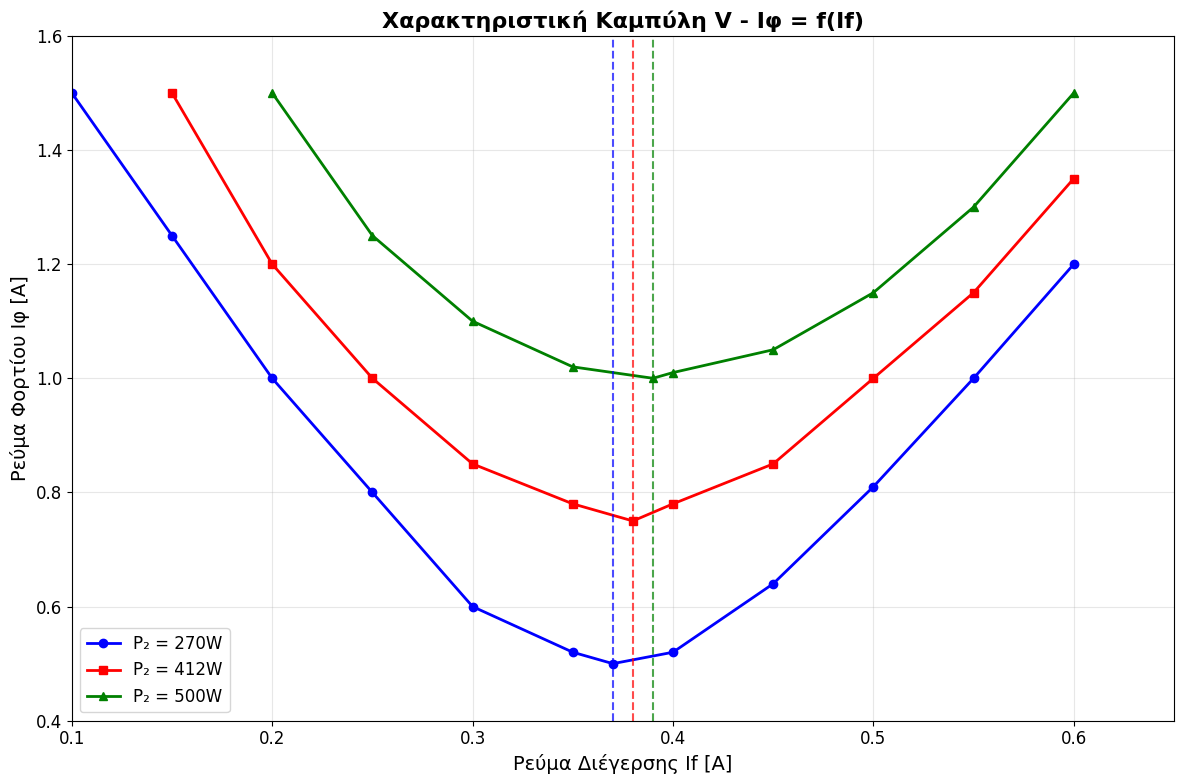


2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)
--------------------------------------------------


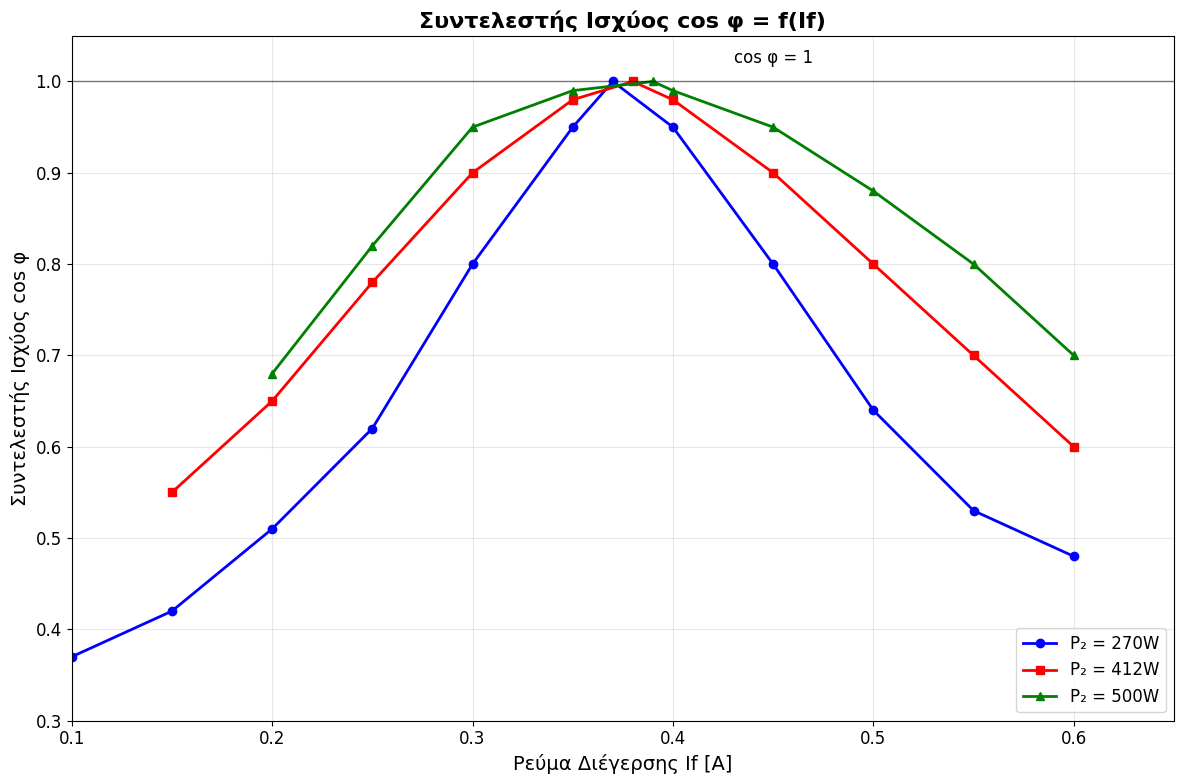


3. ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ
--------------------------------------------------
Φασική τάση V_φ = 230.9 V

Υποδιέγερση (If = 0.3A):
cos φ = 0.95, sin φ = 0.312
φ = 18.2°

Υπερδιέγερση (If = 0.5A):
cos φ = 0.88, sin φ = -0.475
φ = -28.4°

Υπολογισμένη επαγόμενη τάση:
Υποδιέγερση: E_a = 214.8 V, δ = -3.2°
Υπερδιέγερση: E_a = 229.2 V, δ = -5.3°


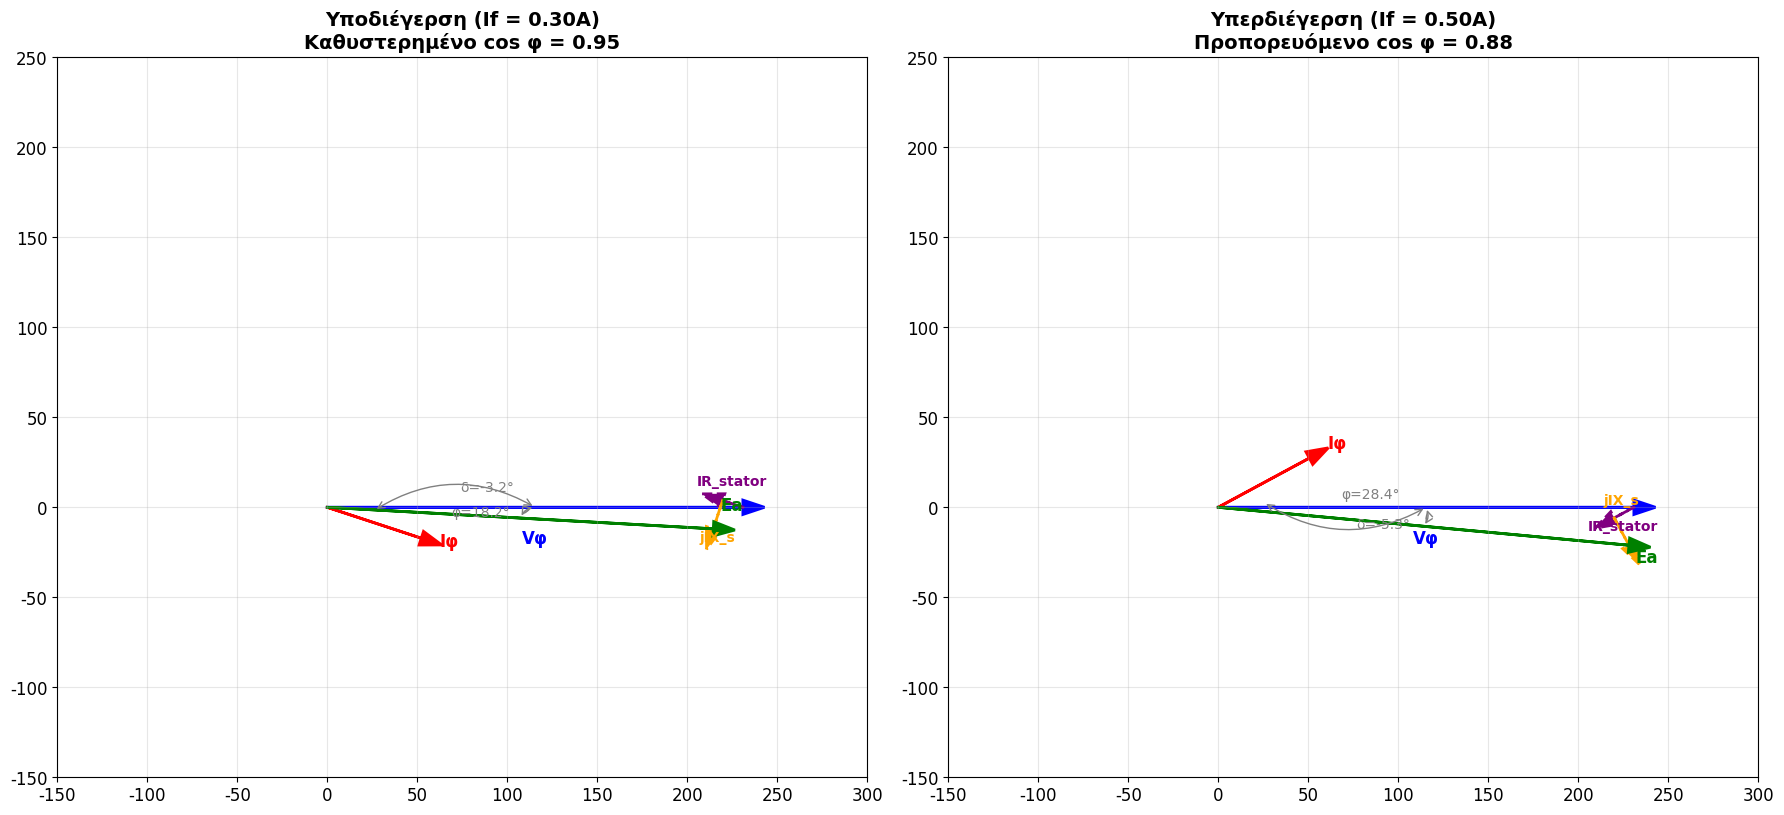


4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)
--------------------------------------------------
Μέγιστη ροπή (ροπή ανατροπής): T_max = 33.69 Nm

5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ
--------------------------------------------------
Ισχύς εισόδου: P_in = 692 W
Απώλειες: P_losses = 75 W
Μηχανική ισχύς: P_mech = 617 W
Ισχύς εξόδου: P_out = 500 W
Ροπή φορτίου: T_load = 3.93 Nm
Ονομαστική ισχύς (εκτίμηση): P_rated = 640 W
Ονομαστική ροπή: T_rated = 4.07 Nm

Σύγκριση ροπών:
T_load / T_rated = 0.96
T_max / T_rated = 8.27

ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
                   Παράμετρος     Τιμή         Παρατηρήσεις
              Φασική τάση V_φ  230.9 V        Τάση αναφοράς
 Επαγόμενη τάση (υποδιέγερση)  214.8 V  Καθυστερημένο cos φ
Επαγόμενη τάση (υπερδιέγερση)  229.2 V  Προπορευόμενο cos φ
           Μέγιστη ροπή T_max 33.69 Nm    Όριο σταθερότητας
          Ροπή φορτίου T_load  3.93 Nm   Λειτουργικό σημείο
      Ονομαστική ροπή T_rated  4.07 Nm Ονομαστικές συνθήκες

ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as patches

# Ρυθμίσεις για ελληνικό κείμενο
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# Δεδομένα από τους πίνακες
# Πίνακας 1: P2 = 270W
data_270W = {
    'If': [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.37, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.00, 0.80, 0.60, 0.52, 0.50, 0.52, 0.64, 0.81, 1.00, 1.20],
    'P': [384, 362, 353, 343, 332, 342, 346, 342, 350, 360, 367, 400],
    'S': [1040, 860, 690, 550, 415, 360, 346, 360, 440, 560, 695, 830],
    'Q': [965, 785, 595, 430, 250, 110, 0, -110, -260, -430, -585, -728],
    'cos_phi': [0.37, 0.42, 0.51, 0.62, 0.80, 0.95, 1.00, 0.95, 0.80, 0.64, 0.53, 0.48]
}

# Πίνακας 2: P2 = 412W
data_412W = {
    'If': [0.15, 0.20, 0.25, 0.30, 0.35, 0.38, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.20, 1.00, 0.85, 0.78, 0.75, 0.78, 0.85, 1.00, 1.15, 1.35],
    'P': [570, 540, 540, 530, 530, 520, 530, 530, 555, 560, 563],
    'S': [1030, 830, 700, 590, 540, 520, 540, 590, 700, 800, 930],
    'Q': [870, 630, 430, 250, 100, 0, -100, -250, -410, -570, -750],
    'cos_phi': [0.55, 0.65, 0.78, 0.90, 0.98, 1.00, 0.98, 0.90, 0.80, 0.70, 0.60]
}

# Πίνακας 3: P2 = 500W
data_500W = {
    'If': [0.20, 0.25, 0.30, 0.35, 0.39, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.10, 1.02, 1.00, 1.01, 1.05, 1.15, 1.30, 1.50],
    'P': [706, 710, 725, 700, 692, 692, 690, 700, 720, 727],
    'S': [1035, 865, 760, 705, 692, 700, 727, 800, 900, 1035],
    'Q': [760, 495, 240, 100, 0, -100, -230, -380, -540, -740],
    'cos_phi': [0.68, 0.82, 0.95, 0.99, 1.00, 0.99, 0.95, 0.88, 0.80, 0.70]
}

# Στοιχεία μηχανής
machine_data = {
    'S_rated': 0.8,  # kVA
    'U_rated': 400,  # V
    'I_rated': 1.6,  # A (Y connection)
    'If_rated': 0.6,  # A
    'n_sync': 1500,  # rpm
    'R_stator': 10.8,  # Ω
    'R_field': 440  # Ω
}

print("=" * 80)
print("ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ")
print("=" * 80)

# ΕΡΩΤΗΜΑ 1: Χαρακτηριστική καμπύλη V - I_φ = f(I_f)
print("\n1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['I_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['I_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['I_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Ρεύμα Φορτίου Iφ [A]', fontsize=14)
plt.title('Χαρακτηριστική Καμπύλη V - Iφ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.1, 0.65)
plt.ylim(0.4, 1.6)

# Προσθήκη σημείων μοναδιαίου συντελεστή ισχύος
plt.axvline(x=0.37, color='blue', linestyle='--', alpha=0.7, label='cos φ = 1 (270W)')
plt.axvline(x=0.38, color='red', linestyle='--', alpha=0.7, label='cos φ = 1 (412W)')
plt.axvline(x=0.39, color='green', linestyle='--', alpha=0.7, label='cos φ = 1 (500W)')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 2: Συντελεστής ισχύος cos φ = f(I_f)
print("\n2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['cos_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['cos_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['cos_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Συντελεστής Ισχύος cos φ', fontsize=14)
plt.title('Συντελεστής Ισχύος cos φ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.1, 0.65)
plt.ylim(0.3, 1.05)

# Γραμμή για cos φ = 1
plt.axhline(y=1.0, color='black', linestyle='-', alpha=0.5, linewidth=1)
plt.text(0.45, 1.02, 'cos φ = 1', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 3: Διανυσματικά διαγράμματα
print("\n3. ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ")
print("-" * 50)

# Επιλογή δεδομένων από πίνακα 3 (P2 = 500W)
# Υποδιέγερση: If = 0.30A, I_phi = 1.10A, cos_phi = 0.95 (καθυστερημένο)
# Υπερδιέγερση: If = 0.50A, I_phi = 1.15A, cos_phi = 0.88 (προπορευόμενο)

# Δεδομένα για υποδιέγερση
If_under = 0.30
I_phi_under = 1.10
cos_phi_under = 0.95
P_under = 725
Q_under = 240  # Θετικό Q -> καθυστερημένο cos φ

# Δεδομένα για υπερδιέγερση
If_over = 0.50
I_phi_over = 1.15
cos_phi_over = 0.88
P_over = 700
Q_over = -380  # Αρνητικό Q -> προπορευόμενο cos φ

# Υπολογισμοί για διανυσματικά διαγράμματα
V_phi = 400 / np.sqrt(3)  # Φασική τάση (Y σύνδεση)
print(f"Φασική τάση V_φ = {V_phi:.1f} V")

# Για υποδιέγερση
sin_phi_under = np.sqrt(1 - cos_phi_under**2)
phi_under_rad = np.arccos(cos_phi_under)
phi_under_deg = np.degrees(phi_under_rad)
print(f"\nΥποδιέγερση (If = {If_under}A):")
print(f"cos φ = {cos_phi_under:.2f}, sin φ = {sin_phi_under:.3f}")
print(f"φ = {phi_under_deg:.1f}°")

# Για υπερδιέγερση
sin_phi_over = -np.sqrt(1 - cos_phi_over**2)  # Αρνητικό για προπορευόμενο
phi_over_rad = -np.arccos(cos_phi_over)
phi_over_deg = np.degrees(phi_over_rad)
print(f"\nΥπερδιέγερση (If = {If_over}A):")
print(f"cos φ = {cos_phi_over:.2f}, sin φ = {sin_phi_over:.3f}")
print(f"φ = {phi_over_deg:.1f}°")

# Υπολογισμός Ea (επαγόμενη τάση)
X_s = 15.0  # Εκτίμηση σύγχρονης αντίδρασης (Ω)
R_stator = machine_data['R_stator']

# Για υποδιέγερση
# Σύνθετος αριθμός ρεύματος: I_phi_under * (cos(phi_under) - j*sin(phi_under))
# V_phi είναι οριζόντια, οπότε I_phi = I_phi_under * (cos_phi_under - j*sin_phi_under)
# Σύμφωνα με το διάγραμμα, V_phi = E_a + I_phi * (R_stator + j*X_s) -> E_a = V_phi - I_phi * (R_stator + j*X_s)
# Ή, E_a = V_phi - I_phi*R_stator - j*I_phi*X_s
# Γωνία ρεύματος (ως προς V_phi): -phi_under_rad (καθυστερημένο)
I_phi_under_complex = I_phi_under * (np.cos(-phi_under_rad) + 1j * np.sin(-phi_under_rad))
voltage_drop_under = I_phi_under_complex * (R_stator + 1j * X_s)
E_a_under_complex = V_phi - voltage_drop_under
E_a_under = np.abs(E_a_under_complex)
delta_under_rad = np.angle(E_a_under_complex) # Γωνία φορτίου
delta_under_deg = np.degrees(delta_under_rad)

# Για υπερδιέγερση
# Γωνία ρεύματος (ως προς V_phi): -phi_over_rad (προπορευόμενο) -> +arccos(cos_phi_over)
I_phi_over_complex = I_phi_over * (np.cos(-phi_over_rad) + 1j * np.sin(-phi_over_rad)) # phi_over_rad είναι ήδη αρνητικό
voltage_drop_over = I_phi_over_complex * (R_stator + 1j * X_s)
E_a_over_complex = V_phi - voltage_drop_over
E_a_over = np.abs(E_a_over_complex)
delta_over_rad = np.angle(E_a_over_complex) # Γωνία φορτίου
delta_over_deg = np.degrees(delta_over_rad)

print(f"\nΥπολογισμένη επαγόμενη τάση:")
print(f"Υποδιέγερση: E_a = {E_a_under:.1f} V, δ = {delta_under_deg:.1f}°")
print(f"Υπερδιέγερση: E_a = {E_a_over:.1f} V, δ = {delta_over_deg:.1f}°")


# Σχεδίαση διανυσματικών διαγραμμάτων
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# --- Διάγραμμα υποδιέγερσης ---
ax1.set_xlim(-150, 300)
ax1.set_ylim(-150, 250)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('Υποδιέγερση (If = 0.30A)\nΚαθυστερημένο cos φ = 0.95', fontsize=14, fontweight='bold')

# Διανύσματα
V_vec = [V_phi, 0]
I_vec_x = I_phi_under * np.cos(-phi_under_rad) * 50 # Κλίμακα για οπτικοποίηση
I_vec_y = I_phi_under * np.sin(-phi_under_rad) * 50
I_vec = [I_vec_x, I_vec_y]

# IR drop
IR_drop_vec_x = I_vec_x * R_stator / 50 # Κλίμακα αντίστροφα
IR_drop_vec_y = I_vec_y * R_stator / 50
IR_drop_vec_complex = I_phi_under_complex * R_stator

# jIX_s drop (leading IR by 90 degrees)
jIXs_drop_vec_x = -I_vec_y * X_s / 50
jIXs_drop_vec_y = I_vec_x * X_s / 50
jIXs_drop_vec_complex = 1j * I_phi_under_complex * X_s

# E_a
E_a_vec_x = E_a_under * np.cos(delta_under_rad)
E_a_vec_y = E_a_under * np.sin(delta_under_rad)

# V_phi
ax1.arrow(0, 0, V_vec[0], V_vec[1], head_width=8, head_length=12, fc='blue', ec='blue', linewidth=2, label='Vφ')
ax1.text(V_vec[0]/2, -20, 'Vφ', fontsize=12, ha='center', color='blue', fontweight='bold')

# I_phi
ax1.arrow(0, 0, I_vec[0], I_vec[1], head_width=8, head_length=12, fc='red', ec='red', linewidth=2, label='Iφ')
ax1.text(I_vec[0] + 10, I_vec[1] - 5, 'Iφ', fontsize=12, ha='left', color='red', fontweight='bold')

# IR drop
ax1.arrow(V_vec[0], V_vec[1], -IR_drop_vec_complex.real, -IR_drop_vec_complex.imag,
          head_width=8, head_length=12, fc='purple', ec='purple', linewidth=2, linestyle='--', label='IR_stator')
ax1.text(V_vec[0] - IR_drop_vec_complex.real/2 - 20, -IR_drop_vec_complex.imag/2 + 10, 'IR_stator', fontsize=10, color='purple', fontweight='bold')

# jIX_s drop
ax1.arrow(V_vec[0] - IR_drop_vec_complex.real, V_vec[1] - IR_drop_vec_complex.imag,
          -jIXs_drop_vec_complex.real, -jIXs_drop_vec_complex.imag,
          head_width=8, head_length=12, fc='orange', ec='orange', linewidth=2, linestyle='--', label='jIX_s')
ax1.text(V_vec[0] - IR_drop_vec_complex.real - jIXs_drop_vec_complex.real/2 - 10,
         V_vec[1] - IR_drop_vec_complex.imag - jIXs_drop_vec_complex.imag/2 - 15,
         'jIX_s', fontsize=10, color='orange', fontweight='bold')

# E_a
ax1.arrow(0, 0, E_a_vec_x, E_a_vec_y, head_width=8, head_length=12, fc='green', ec='green', linewidth=2, label='Ea')
ax1.text(E_a_vec_x + 10, E_a_vec_y + 10, 'Ea', fontsize=12, ha='center', color='green', fontweight='bold')


# Angles
ax1.annotate("", xy=(V_vec[0]*0.5, V_vec[1]*0.1), xytext=(I_vec[0]*0.5, I_vec[1]*0.1),
             arrowprops=dict(arrowstyle="<->", color='gray', connectionstyle="arc3,rad=-0.3"))
ax1.text(V_vec[0]*0.3 + I_vec[0]*0.3, -5, f'φ={phi_under_deg:.1f}°', fontsize=10, color='gray', ha='center')

ax1.annotate("", xy=(E_a_vec_x*0.5, E_a_vec_y*0.5), xytext=(V_vec[0]*0.5, V_vec[1]*0.1),
             arrowprops=dict(arrowstyle="<->", color='gray', connectionstyle="arc3,rad=0.3"))
ax1.text(E_a_vec_x*0.2 + V_vec[0]*0.2, E_a_vec_y*0.1 + 10, f'δ={delta_under_deg:.1f}°', fontsize=10, color='gray', ha='center')


# --- Διάγραμμα υπερδιέγερσης ---
ax2.set_xlim(-150, 300)
ax2.set_ylim(-150, 250)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('Υπερδιέγερση (If = 0.50A)\nΠροπορευόμενο cos φ = 0.88', fontsize=14, fontweight='bold')

# Διανύσματα
I_vec2_x = I_phi_over * np.cos(-phi_over_rad) * 50
I_vec2_y = I_phi_over * np.sin(-phi_over_rad) * 50
I_vec2 = [I_vec2_x, I_vec2_y]

# IR drop
IR_drop_vec2_complex = I_phi_over_complex * R_stator

# jIX_s drop
jIXs_drop_vec2_complex = 1j * I_phi_over_complex * X_s

# E_a
E_a_vec2_x = E_a_over * np.cos(delta_over_rad)
E_a_vec2_y = E_a_over * np.sin(delta_over_rad)

# V_phi
ax2.arrow(0, 0, V_vec[0], V_vec[1], head_width=8, head_length=12, fc='blue', ec='blue', linewidth=2, label='Vφ')
ax2.text(V_vec[0]/2, -20, 'Vφ', fontsize=12, ha='center', color='blue', fontweight='bold')

# I_phi
ax2.arrow(0, 0, I_vec2[0], I_vec2[1], head_width=8, head_length=12, fc='red', ec='red', linewidth=2, label='Iφ')
ax2.text(I_vec2[0] + 10, I_vec2[1] + 5, 'Iφ', fontsize=12, ha='left', color='red', fontweight='bold')

# IR drop
ax2.arrow(V_vec[0], V_vec[1], -IR_drop_vec2_complex.real, -IR_drop_vec2_complex.imag,
          head_width=8, head_length=12, fc='purple', ec='purple', linewidth=2, linestyle='--', label='IR_stator')
ax2.text(V_vec[0] - IR_drop_vec2_complex.real/2 - 20, -IR_drop_vec2_complex.imag/2 - 10, 'IR_stator', fontsize=10, color='purple', fontweight='bold')

# jIX_s drop
ax2.arrow(V_vec[0] - IR_drop_vec2_complex.real, V_vec[1] - IR_drop_vec2_complex.imag,
          -jIXs_drop_vec2_complex.real, -jIXs_drop_vec2_complex.imag,
          head_width=8, head_length=12, fc='orange', ec='orange', linewidth=2, linestyle='--', label='jIX_s')
ax2.text(V_vec[0] - IR_drop_vec2_complex.real - jIXs_drop_vec2_complex.real/2 - 10,
         V_vec[1] - IR_drop_vec2_complex.imag - jIXs_drop_vec2_complex.imag/2 + 15,
         'jIX_s', fontsize=10, color='orange', fontweight='bold')


# E_a
ax2.arrow(0, 0, E_a_vec2_x, E_a_vec2_y, head_width=8, head_length=12, fc='green', ec='green', linewidth=2, label='Ea')
ax2.text(E_a_vec2_x + 10, E_a_vec2_y - 10, 'Ea', fontsize=12, ha='center', color='green', fontweight='bold')


# Angles
ax2.annotate("", xy=(V_vec[0]*0.5, V_vec[1]*0.1), xytext=(I_vec2[0]*0.5, I_vec2[1]*0.1),
             arrowprops=dict(arrowstyle="<->", color='gray', connectionstyle="arc3,rad=0.3"))
ax2.text(V_vec[0]*0.3 + I_vec2[0]*0.3, 5, f'φ={np.abs(phi_over_deg):.1f}°', fontsize=10, color='gray', ha='center')

ax2.annotate("", xy=(E_a_vec2_x*0.5, E_a_vec2_y*0.5), xytext=(V_vec[0]*0.5, V_vec[1]*0.1),
             arrowprops=dict(arrowstyle="<->", color='gray', connectionstyle="arc3,rad=-0.3"))
ax2.text(E_a_vec2_x*0.2 + V_vec[0]*0.2, E_a_vec2_y*0.1 - 10, f'δ={delta_over_deg:.1f}°', fontsize=10, color='gray', ha='center')


plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 4: Μέγιστη ροπή (ροπή ανατροπής)
print("\n4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)")
print("-" * 50)

# Χρησιμοποιώντας την περίπτωση υπερδιέγερσης
# Τύπος: T_max = (3 * V_φ * E_a) / (2π * f * X_s)
f = 50  # Hz
omega_s = 2 * np.pi * f  # rad/s
n_sync_rad = (machine_data['n_sync'] * 2 * np.pi) / 60  # rad/s

T_max = (3 * V_phi * E_a_over) / (omega_s * X_s)
print(f"Μέγιστη ροπή (ροπή ανατροπής): T_max = {T_max:.2f} Nm")

# ΕΡΩΤΗΜΑ 5: Ροπή φορτίου και ονομαστική ροπή
print("\n5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ")
print("-" * 50)

# Από τον πίνακα 3, πράσινη στήλη (If = 0.39A, cos φ = 1)
P_in_green = 692  # W
P_out_green = 500  # W (P2)
losses = 75  # W
P_mech = P_in_green - losses  # Μηχανική ισχύς

print(f"Ισχύς εισόδου: P_in = {P_in_green} W")
print(f"Απώλειες: P_losses = {losses} W")
print(f"Μηχανική ισχύς: P_mech = {P_mech} W")
print(f"Ισχύς εξόδου: P_out = {P_out_green} W")

# Ροπή φορτίου
T_load = P_mech / n_sync_rad
print(f"Ροπή φορτίου: T_load = {T_load:.2f} Nm")

# Ονομαστική ροπή
P_rated = machine_data['S_rated'] * 1000 * 0.8  # Υποθέτουμε cos φ = 0.8
T_rated = P_rated / n_sync_rad
print(f"Ονομαστική ισχύς (εκτίμηση): P_rated = {P_rated:.0f} W")
print(f"Ονομαστική ροπή: T_rated = {T_rated:.2f} Nm")

# Σύγκριση ροπών
print(f"\nΣύγκριση ροπών:")
print(f"T_load / T_rated = {T_load/T_rated:.2f}")
print(f"T_max / T_rated = {T_max/T_rated:.2f}")

# Δημιουργία πίνακα αποτελεσμάτων
print("\n" + "="*80)
print("ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ")
print("="*80)

results_data = {
    'Παράμετρος': ['Φασική τάση V_φ', 'Επαγόμενη τάση (υποδιέγερση)', 'Επαγόμενη τάση (υπερδιέγερση)',
                   'Μέγιστη ροπή T_max', 'Ροπή φορτίου T_load', 'Ονομαστική ροπή T_rated'],
    'Τιμή': [f'{V_phi:.1f} V', f'{E_a_under:.1f} V', f'{E_a_over:.1f} V',
             f'{T_max:.2f} Nm', f'{T_load:.2f} Nm', f'{T_rated:.2f} Nm'],
    'Παρατηρήσεις': ['Τάση αναφοράς', 'Καθυστερημένο cos φ', 'Προπορευόμενο cos φ',
                     'Όριο σταθερότητας', 'Λειτουργικό σημείο', 'Ονομαστικές συνθήκες']
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ")
print("="*80)

ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ

1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)
--------------------------------------------------


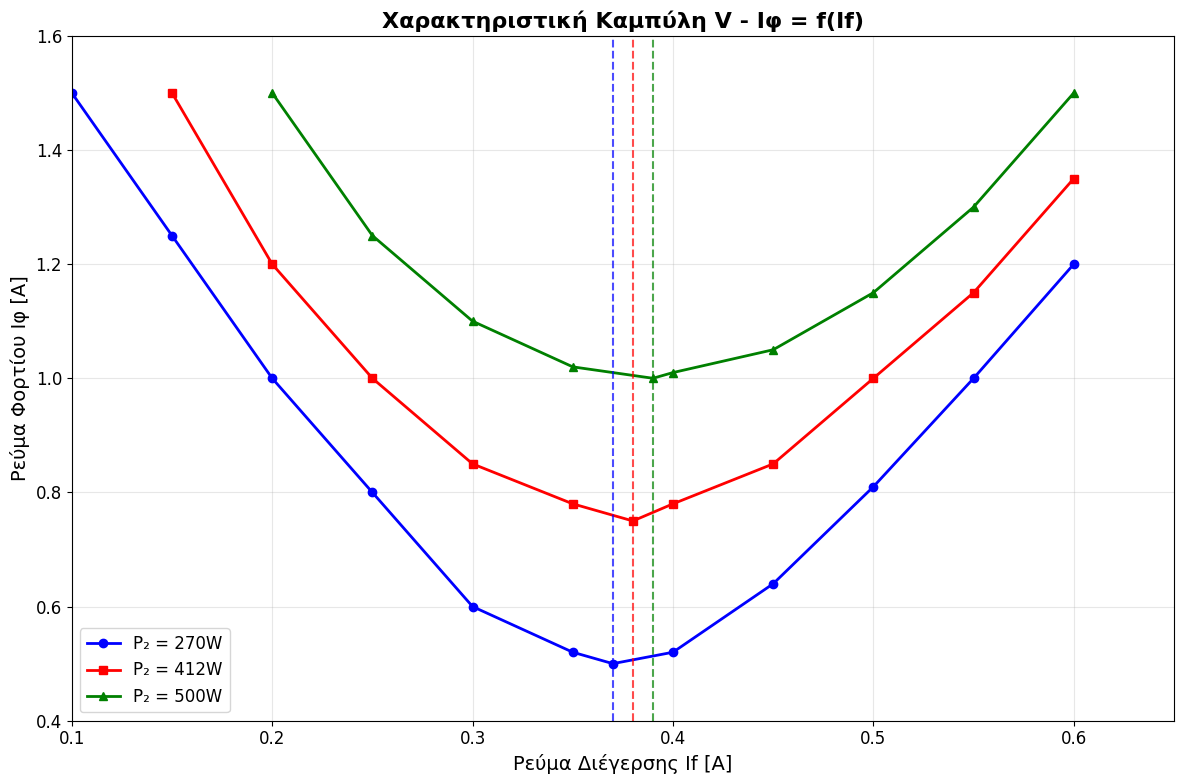


2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)
--------------------------------------------------


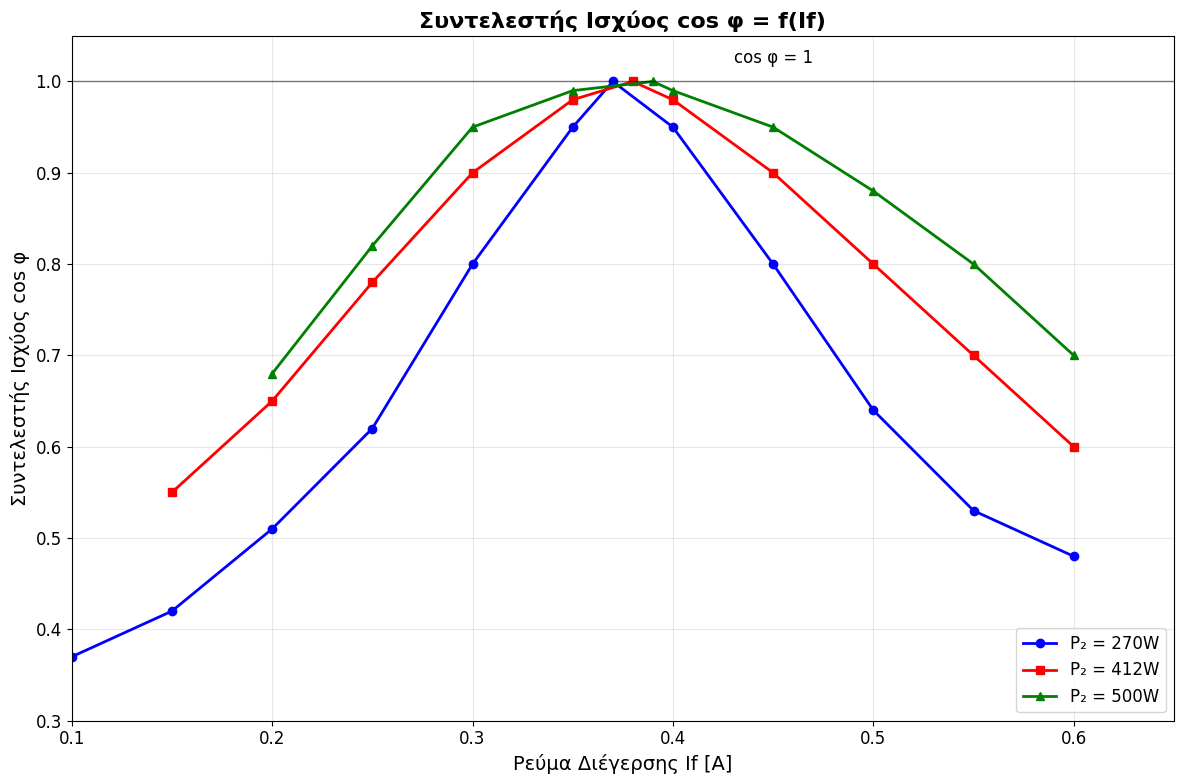


3. ΒΕΛΤΙΩΜΕΝΑ ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ
--------------------------------------------------
Φασική τάση V_φ = 230.9 V

Υποδιέγερση (If = 0.3A):
cos φ = 0.950, sin φ = 0.312
φ = 18.2°

Υπερδιέγερση (If = 0.5A):
cos φ = 0.880, sin φ = -0.475
φ = -28.4°

Υπολογισμένες τιμές:
Υποδιέγερση: E_a = 214.8 V, δ = -3.2°
              I·R = 11.9 V, I·X_s = 16.5 V
Υπερδιέγερση: E_a = 229.2 V, δ = -5.3°
              I·R = 12.4 V, I·X_s = 17.2 V


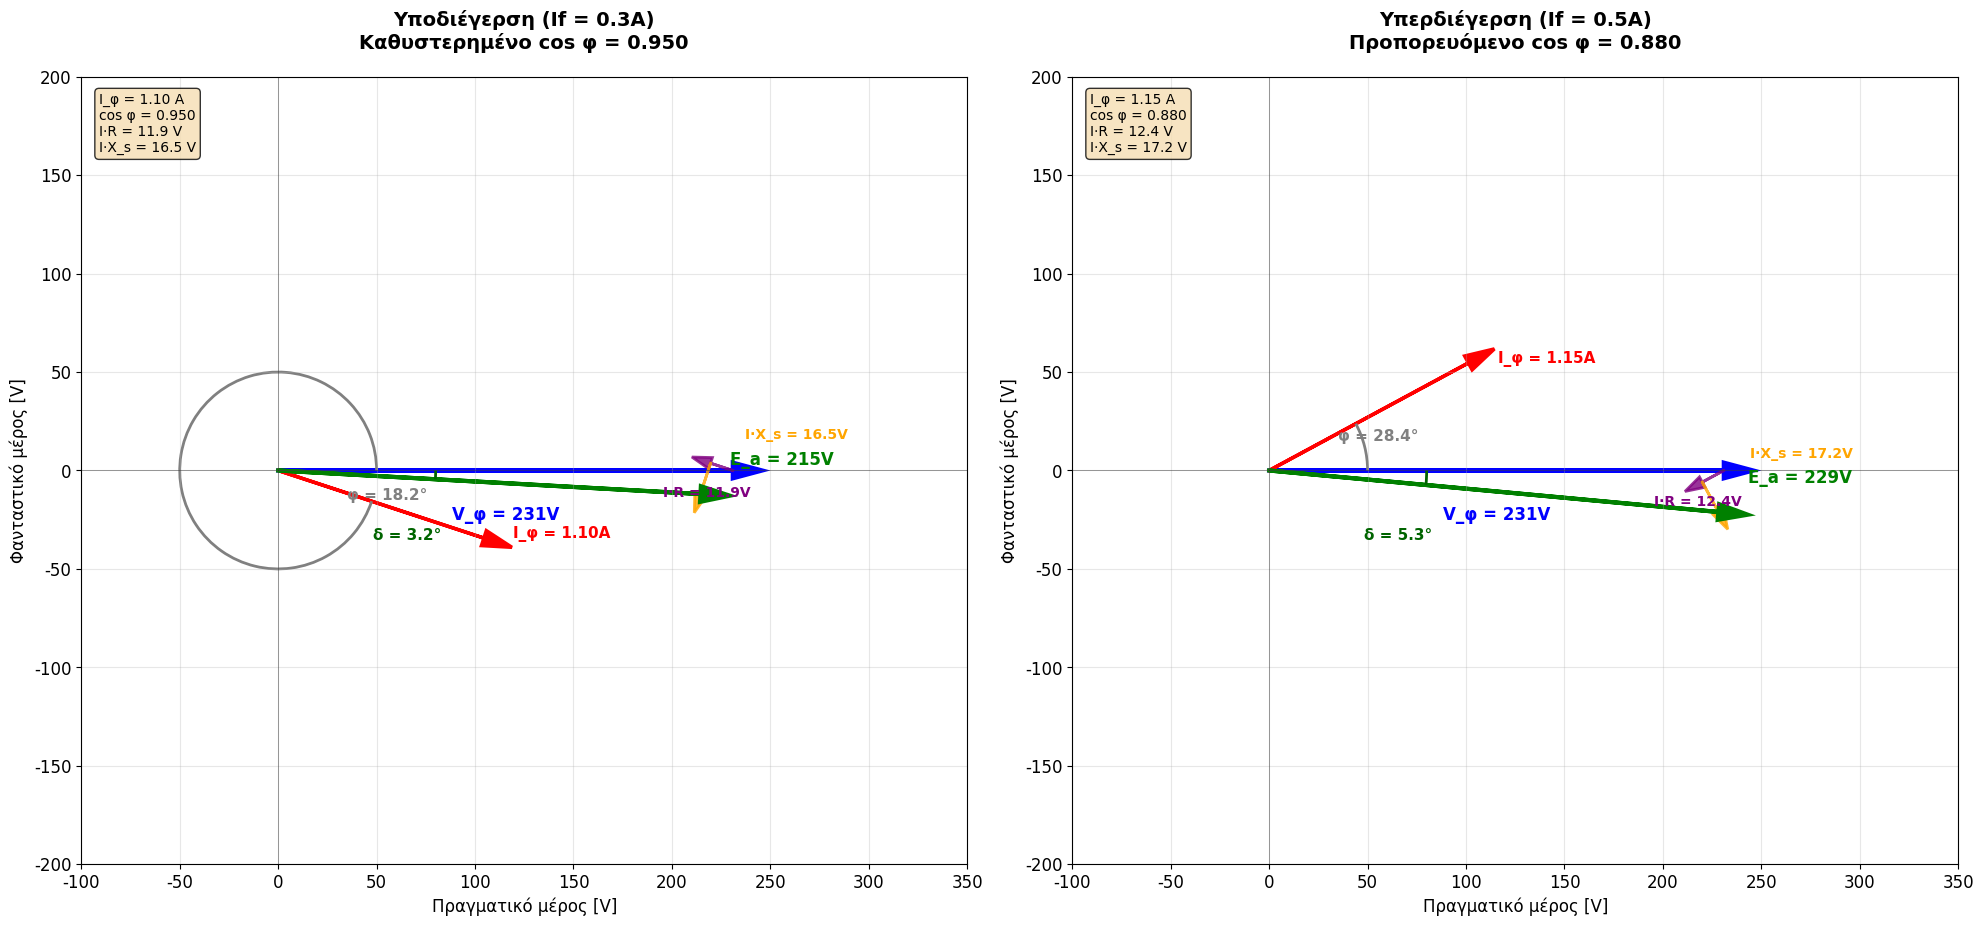


4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)
--------------------------------------------------
Μέγιστη ροπή (ροπή ανατροπής): T_max = 33.69 Nm

5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ
--------------------------------------------------
Ισχύς εισόδου: P_in = 692 W
Απώλειες: P_losses = 75 W
Μηχανική ισχύς: P_mech = 617 W
Ισχύς εξόδου: P_out = 500 W
Ροπή φορτίου: T_load = 3.93 Nm
Ονομαστική ισχύς (εκτίμηση): P_rated = 640 W
Ονομαστική ροπή: T_rated = 4.07 Nm

Σύγκριση ροπών:
T_load / T_rated = 0.96
T_max / T_rated = 8.27

ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
                   Παράμετρος     Τιμή         Παρατηρήσεις
              Φασική τάση V_φ  230.9 V        Τάση αναφοράς
 Επαγόμενη τάση (υποδιέγερση)  214.8 V  Καθυστερημένο cos φ
Επαγόμενη τάση (υπερδιέγερση)  229.2 V  Προπορευόμενο cos φ
           Μέγιστη ροπή T_max 33.69 Nm    Όριο σταθερότητας
          Ροπή φορτίου T_load  3.93 Nm   Λειτουργικό σημείο
      Ονομαστική ροπή T_rated  4.07 Nm Ονομαστικές συνθήκες

ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch, Arc
import matplotlib.patches as patches

# Ρυθμίσεις για ελληνικό κείμενο
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# Δεδομένα από τους πίνακες
# Πίνακας 1: P2 = 270W
data_270W = {
    'If': [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.37, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.00, 0.80, 0.60, 0.52, 0.50, 0.52, 0.64, 0.81, 1.00, 1.20],
    'P': [384, 362, 353, 343, 332, 342, 346, 342, 350, 360, 367, 400],
    'S': [1040, 860, 690, 550, 415, 360, 346, 360, 440, 560, 695, 830],
    'Q': [965, 785, 595, 430, 250, 110, 0, -110, -260, -430, -585, -728],
    'cos_phi': [0.37, 0.42, 0.51, 0.62, 0.80, 0.95, 1.00, 0.95, 0.80, 0.64, 0.53, 0.48]
}

# Πίνακας 2: P2 = 412W
data_412W = {
    'If': [0.15, 0.20, 0.25, 0.30, 0.35, 0.38, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.20, 1.00, 0.85, 0.78, 0.75, 0.78, 0.85, 1.00, 1.15, 1.35],
    'P': [570, 540, 540, 530, 530, 520, 530, 530, 555, 560, 563],
    'S': [1030, 830, 700, 590, 540, 520, 540, 590, 700, 800, 930],
    'Q': [870, 630, 430, 250, 100, 0, -100, -250, -410, -570, -750],
    'cos_phi': [0.55, 0.65, 0.78, 0.90, 0.98, 1.00, 0.98, 0.90, 0.80, 0.70, 0.60]
}

# Πίνακας 3: P2 = 500W
data_500W = {
    'If': [0.20, 0.25, 0.30, 0.35, 0.39, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.10, 1.02, 1.00, 1.01, 1.05, 1.15, 1.30, 1.50],
    'P': [706, 710, 725, 700, 692, 692, 690, 700, 720, 727],
    'S': [1035, 865, 760, 705, 692, 700, 727, 800, 900, 1035],
    'Q': [760, 495, 240, 100, 0, -100, -230, -380, -540, -740],
    'cos_phi': [0.68, 0.82, 0.95, 0.99, 1.00, 0.99, 0.95, 0.88, 0.80, 0.70]
}

# Στοιχεία μηχανής
machine_data = {
    'S_rated': 0.8,  # kVA
    'U_rated': 400,  # V
    'I_rated': 1.6,  # A (Y connection)
    'If_rated': 0.6,  # A
    'n_sync': 1500,  # rpm
    'R_stator': 10.8,  # Ω
    'R_field': 440  # Ω
}

print("=" * 80)
print("ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ")
print("=" * 80)

# ΕΡΩΤΗΜΑ 1: Χαρακτηριστική καμπύλη V - I_φ = f(I_f)
print("\n1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['I_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['I_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['I_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Ρεύμα Φορτίου Iφ [A]', fontsize=14)
plt.title('Χαρακτηριστική Καμπύλη V - Iφ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.1, 0.65)
plt.ylim(0.4, 1.6)

# Προσθήκη σημείων μοναδιαίου συντελεστή ισχύος
plt.axvline(x=0.37, color='blue', linestyle='--', alpha=0.7, label='cos φ = 1 (270W)')
plt.axvline(x=0.38, color='red', linestyle='--', alpha=0.7, label='cos φ = 1 (412W)')
plt.axvline(x=0.39, color='green', linestyle='--', alpha=0.7, label='cos φ = 1 (500W)')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 2: Συντελεστής ισχύος cos φ = f(I_f)
print("\n2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['cos_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['cos_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['cos_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Συντελεστής Ισχύος cos φ', fontsize=14)
plt.title('Συντελεστής Ισχύος cos φ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.1, 0.65)
plt.ylim(0.3, 1.05)

# Γραμμή για cos φ = 1
plt.axhline(y=1.0, color='black', linestyle='-', alpha=0.5, linewidth=1)
plt.text(0.45, 1.02, 'cos φ = 1', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 3: Βελτιωμένα διανυσματικά διαγράμματα
print("\n3. ΒΕΛΤΙΩΜΕΝΑ ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ")
print("-" * 50)

# Επιλογή δεδομένων από πίνακα 3 (P2 = 500W)
# Υποδιέγερση: If = 0.30A, I_phi = 1.10A, cos_phi = 0.95 (καθυστερημένο)
# Υπερδιέγερση: If = 0.50A, I_phi = 1.15A, cos_phi = 0.88 (προπορευόμενο)

# Δεδομένα για υποδιέγερση
If_under = 0.30
I_phi_under = 1.10
cos_phi_under = 0.95
P_under = 725
Q_under = 240  # Θετικό Q -> καθυστερημένο cos φ

# Δεδομένα για υπερδιέγερση
If_over = 0.50
I_phi_over = 1.15
cos_phi_over = 0.88
P_over = 700
Q_over = -380  # Αρνητικό Q -> προπορευόμενο cos φ

# Υπολογισμοί για διανυσματικά διαγράμματα
V_phi = 400 / np.sqrt(3)  # Φασική τάση (Y σύνδεση)
print(f"Φασική τάση V_φ = {V_phi:.1f} V")

# Παράμετροι μηχανής
X_s = 15.0  # Εκτίμηση σύγχρονης αντίδρασης (Ω)
R_stator = machine_data['R_stator']

# Για υποδιέγερση
sin_phi_under = np.sqrt(1 - cos_phi_under**2)
phi_under_rad = np.arccos(cos_phi_under)
phi_under_deg = np.degrees(phi_under_rad)

# Για υπερδιέγερση
sin_phi_over = -np.sqrt(1 - cos_phi_over**2)  # Αρνητικό για προπορευόμενο
phi_over_rad = -np.arccos(cos_phi_over)
phi_over_deg = np.degrees(phi_over_rad)

print(f"\nΥποδιέγερση (If = {If_under}A):")
print(f"cos φ = {cos_phi_under:.3f}, sin φ = {sin_phi_under:.3f}")
print(f"φ = {phi_under_deg:.1f}°")

print(f"\nΥπερδιέγερση (If = {If_over}A):")
print(f"cos φ = {cos_phi_over:.3f}, sin φ = {sin_phi_over:.3f}")
print(f"φ = {phi_over_deg:.1f}°")

# Υπολογισμός σύνθετων μεγεθών
# Για υποδιέγερση (καθυστερημένο ρεύμα)
I_phi_under_complex = I_phi_under * (np.cos(-phi_under_rad) + 1j * np.sin(-phi_under_rad))
IR_drop_under = I_phi_under_complex * R_stator
jIXs_drop_under = 1j * I_phi_under_complex * X_s
total_drop_under = IR_drop_under + jIXs_drop_under
E_a_under_complex = V_phi - total_drop_under
E_a_under = np.abs(E_a_under_complex)
delta_under_rad = np.angle(E_a_under_complex)
delta_under_deg = np.degrees(delta_under_rad)

# Για υπερδιέγερση (προπορευόμενο ρεύμα)
I_phi_over_complex = I_phi_over * (np.cos(-phi_over_rad) + 1j * np.sin(-phi_over_rad))
IR_drop_over = I_phi_over_complex * R_stator
jIXs_drop_over = 1j * I_phi_over_complex * X_s
total_drop_over = IR_drop_over + jIXs_drop_over
E_a_over_complex = V_phi - total_drop_over
E_a_over = np.abs(E_a_over_complex)
delta_over_rad = np.angle(E_a_over_complex)
delta_over_deg = np.degrees(delta_over_rad)

print(f"\nΥπολογισμένες τιμές:")
print(f"Υποδιέγερση: E_a = {E_a_under:.1f} V, δ = {delta_under_deg:.1f}°")
print(f"              I·R = {abs(IR_drop_under):.1f} V, I·X_s = {abs(jIXs_drop_under):.1f} V")
print(f"Υπερδιέγερση: E_a = {E_a_over:.1f} V, δ = {delta_over_deg:.1f}°")
print(f"              I·R = {abs(IR_drop_over):.1f} V, I·X_s = {abs(jIXs_drop_over):.1f} V")

# Κλίμακα για οπτικοποίηση (V -> pixels)
scale = 1.0  # 1V = 1 pixel

# Σχεδίαση βελτιωμένων διανυσματικών διαγραμμάτων
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

def draw_vector_diagram(ax, title, V_phi, I_phi_complex, R_stator, X_s, E_a_complex, phi_deg, delta_deg, case_type):
    """Σχεδίαση διανυσματικού διαγράμματος"""

    # Υπολογισμός διανυσμάτων
    IR_drop = I_phi_complex * R_stator
    jIXs_drop = 1j * I_phi_complex * X_s

    # Συντεταγμένες διανυσμάτων (κλιμακωμένες)
    V_vec = np.array([V_phi * scale, 0])
    IR_vec = np.array([IR_drop.real * scale, IR_drop.imag * scale])
    jIXs_vec = np.array([jIXs_drop.real * scale, jIXs_drop.imag * scale])
    E_a_vec = np.array([E_a_complex.real * scale, E_a_complex.imag * scale])
    I_vec = np.array([I_phi_complex.real * 100, I_phi_complex.imag * 100])  # Κλίμακα για ορατότητα

    # Ρυθμίσεις άξονα
    ax.set_xlim(-100, 350)
    ax.set_ylim(-200, 200)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Πραγματικό μέρος [V]', fontsize=12)
    ax.set_ylabel('Φανταστικό μέρος [V]', fontsize=12)

    # Σχεδίαση αξόνων αναφοράς
    ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5, alpha=0.5)

    # 1. Διάνυσμα τάσης V_φ (αναφορά)
    ax.arrow(0, 0, V_vec[0], V_vec[1], head_width=8, head_length=15,
             fc='blue', ec='blue', linewidth=3)
    ax.text(V_vec[0]/2, -25, f'V_φ = {V_phi:.0f}V', fontsize=12, ha='center',
            color='blue', fontweight='bold')

    # 2. Διάνυσμα ρεύματος I_φ
    ax.arrow(0, 0, I_vec[0], I_vec[1], head_width=8, head_length=15,
             fc='red', ec='red', linewidth=2.5)
    I_magnitude = abs(I_phi_complex)
    ax.text(I_vec[0] + 15, I_vec[1], f'I_φ = {I_magnitude:.2f}A', fontsize=11,
            color='red', fontweight='bold')

    # 3. Πτώση τάσης I·R (παράλληλη προς I)
    start_point = V_vec
    ax.arrow(start_point[0], start_point[1], -IR_vec[0], -IR_vec[1],
             head_width=6, head_length=10, fc='purple', ec='purple',
             linewidth=2, linestyle='-', alpha=0.8)
    ax.text(start_point[0] - IR_vec[0]/2 - 30, start_point[1] - IR_vec[1]/2 - 15,
            f'I·R = {abs(IR_drop):.1f}V', fontsize=10, color='purple', fontweight='bold')

    # 4. Πτώση τάσης j·I·X_s (κάθετη προς I)
    start_point2 = start_point - IR_vec
    ax.arrow(start_point2[0], start_point2[1], -jIXs_vec[0], -jIXs_vec[1],
             head_width=6, head_length=10, fc='orange', ec='orange',
             linewidth=2, linestyle='-', alpha=0.8)
    ax.text(start_point2[0] - jIXs_vec[0]/2 + 20, start_point2[1] - jIXs_vec[1]/2 + 20,
            f'I·X_s = {abs(jIXs_drop):.1f}V', fontsize=10, color='orange', fontweight='bold')

    # 5. Επαγόμενη τάση E_a
    ax.arrow(0, 0, E_a_vec[0], E_a_vec[1], head_width=8, head_length=15,
             fc='green', ec='green', linewidth=3)
    ax.text(E_a_vec[0] + 15, E_a_vec[1] + 15, f'E_a = {abs(E_a_complex):.0f}V',
            fontsize=12, color='green', fontweight='bold')

    # Σχεδίαση γωνιών με τόξα
    # Γωνία φ (μεταξύ V_φ και I_φ)
    if abs(phi_deg) > 2:  # Μόνο αν η γωνία είναι αρκετά μεγάλη
        angle_radius = 50
        if case_type == 'under':
            arc_phi = Arc((0, 0), 2*angle_radius, 2*angle_radius,
                         angle=0, theta1=0, theta2=-abs(phi_deg),
                         color='gray', linewidth=2)
        else:
            arc_phi = Arc((0, 0), 2*angle_radius, 2*angle_radius,
                         angle=0, theta1=0, theta2=abs(phi_deg),
                         color='gray', linewidth=2)
        ax.add_patch(arc_phi)
        ax.text(angle_radius*0.7, -15 if case_type == 'under' else 15,
                f'φ = {abs(phi_deg):.1f}°', fontsize=11, color='gray', fontweight='bold')

    # Γωνία δ (μεταξύ V_φ και E_a)
    if abs(delta_deg) > 2:
        angle_radius2 = 80
        if delta_deg > 0:
            arc_delta = Arc((0, 0), 2*angle_radius2, 2*angle_radius2,
                           angle=0, theta1=0, theta2=delta_deg,
                           color='darkgreen', linewidth=2)
            ax.text(angle_radius2*0.6, 25, f'δ = {delta_deg:.1f}°',
                    fontsize=11, color='darkgreen', fontweight='bold')
        else:
            arc_delta = Arc((0, 0), 2*angle_radius2, 2*angle_radius2,
                           angle=0, theta1=delta_deg, theta2=0,
                           color='darkgreen', linewidth=2)
            ax.text(angle_radius2*0.6, -35, f'δ = {abs(delta_deg):.1f}°',
                    fontsize=11, color='darkgreen', fontweight='bold')
        ax.add_patch(arc_delta)

    # Προσθήκη κειμένου με τιμές
    info_text = f'I_φ = {I_magnitude:.2f} A\ncos φ = {abs(np.cos(np.radians(phi_deg))):.3f}\n'
    info_text += f'I·R = {abs(IR_drop):.1f} V\nI·X_s = {abs(jIXs_drop):.1f} V'
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Διάγραμμα υποδιέγερσης
draw_vector_diagram(ax1,
                   f'Υποδιέγερση (If = {If_under}A)\nΚαθυστερημένο cos φ = {cos_phi_under:.3f}',
                   V_phi, I_phi_under_complex, R_stator, X_s, E_a_under_complex,
                   phi_under_deg, delta_under_deg, 'under')

# Διάγραμμα υπερδιέγερσης
draw_vector_diagram(ax2,
                   f'Υπερδιέγερση (If = {If_over}A)\nΠροπορευόμενο cos φ = {cos_phi_over:.3f}',
                   V_phi, I_phi_over_complex, R_stator, X_s, E_a_over_complex,
                   phi_over_deg, delta_over_deg, 'over')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 4: Μέγιστη ροπή (ροπή ανατροπής)
print("\n4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)")
print("-" * 50)

f = 50  # Hz
omega_s = 2 * np.pi * f  # rad/s
n_sync_rad = (machine_data['n_sync'] * 2 * np.pi) / 60  # rad/s

T_max = (3 * V_phi * E_a_over) / (omega_s * X_s)
print(f"Μέγιστη ροπή (ροπή ανατροπής): T_max = {T_max:.2f} Nm")

# ΕΡΩΤΗΜΑ 5: Ροπή φορτίου και ονομαστική ροπή
print("\n5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ")
print("-" * 50)

P_in_green = 692  # W
P_out_green = 500  # W (P2)
losses = 75  # W
P_mech = P_in_green - losses

print(f"Ισχύς εισόδου: P_in = {P_in_green} W")
print(f"Απώλειες: P_losses = {losses} W")
print(f"Μηχανική ισχύς: P_mech = {P_mech} W")
print(f"Ισχύς εξόδου: P_out = {P_out_green} W")

T_load = P_mech / n_sync_rad
print(f"Ροπή φορτίου: T_load = {T_load:.2f} Nm")

P_rated = machine_data['S_rated'] * 1000 * 0.8
T_rated = P_rated / n_sync_rad
print(f"Ονομαστική ισχύς (εκτίμηση): P_rated = {P_rated:.0f} W")
print(f"Ονομαστική ροπή: T_rated = {T_rated:.2f} Nm")

print(f"\nΣύγκριση ροπών:")
print(f"T_load / T_rated = {T_load/T_rated:.2f}")
print(f"T_max / T_rated = {T_max/T_rated:.2f}")

# Δημιουργία πίνακα αποτελεσμάτων
print("\n" + "="*80)
print("ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ")
print("="*80)

results_data = {
    'Παράμετρος': ['Φασική τάση V_φ', 'Επαγόμενη τάση (υποδιέγερση)', 'Επαγόμενη τάση (υπερδιέγερση)',
                   'Μέγιστη ροπή T_max', 'Ροπή φορτίου T_load', 'Ονομαστική ροπή T_rated'],
    'Τιμή': [f'{V_phi:.1f} V', f'{E_a_under:.1f} V', f'{E_a_over:.1f} V',
             f'{T_max:.2f} Nm', f'{T_load:.2f} Nm', f'{T_rated:.2f} Nm'],
    'Παρατηρήσεις': ['Τάση αναφοράς', 'Καθυστερημένο cos φ', 'Προπορευόμενο cos φ',
                     'Όριο σταθερότητας', 'Λειτουργικό σημείο', 'Ονομαστικές συνθήκες']
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ")
print("="*80)

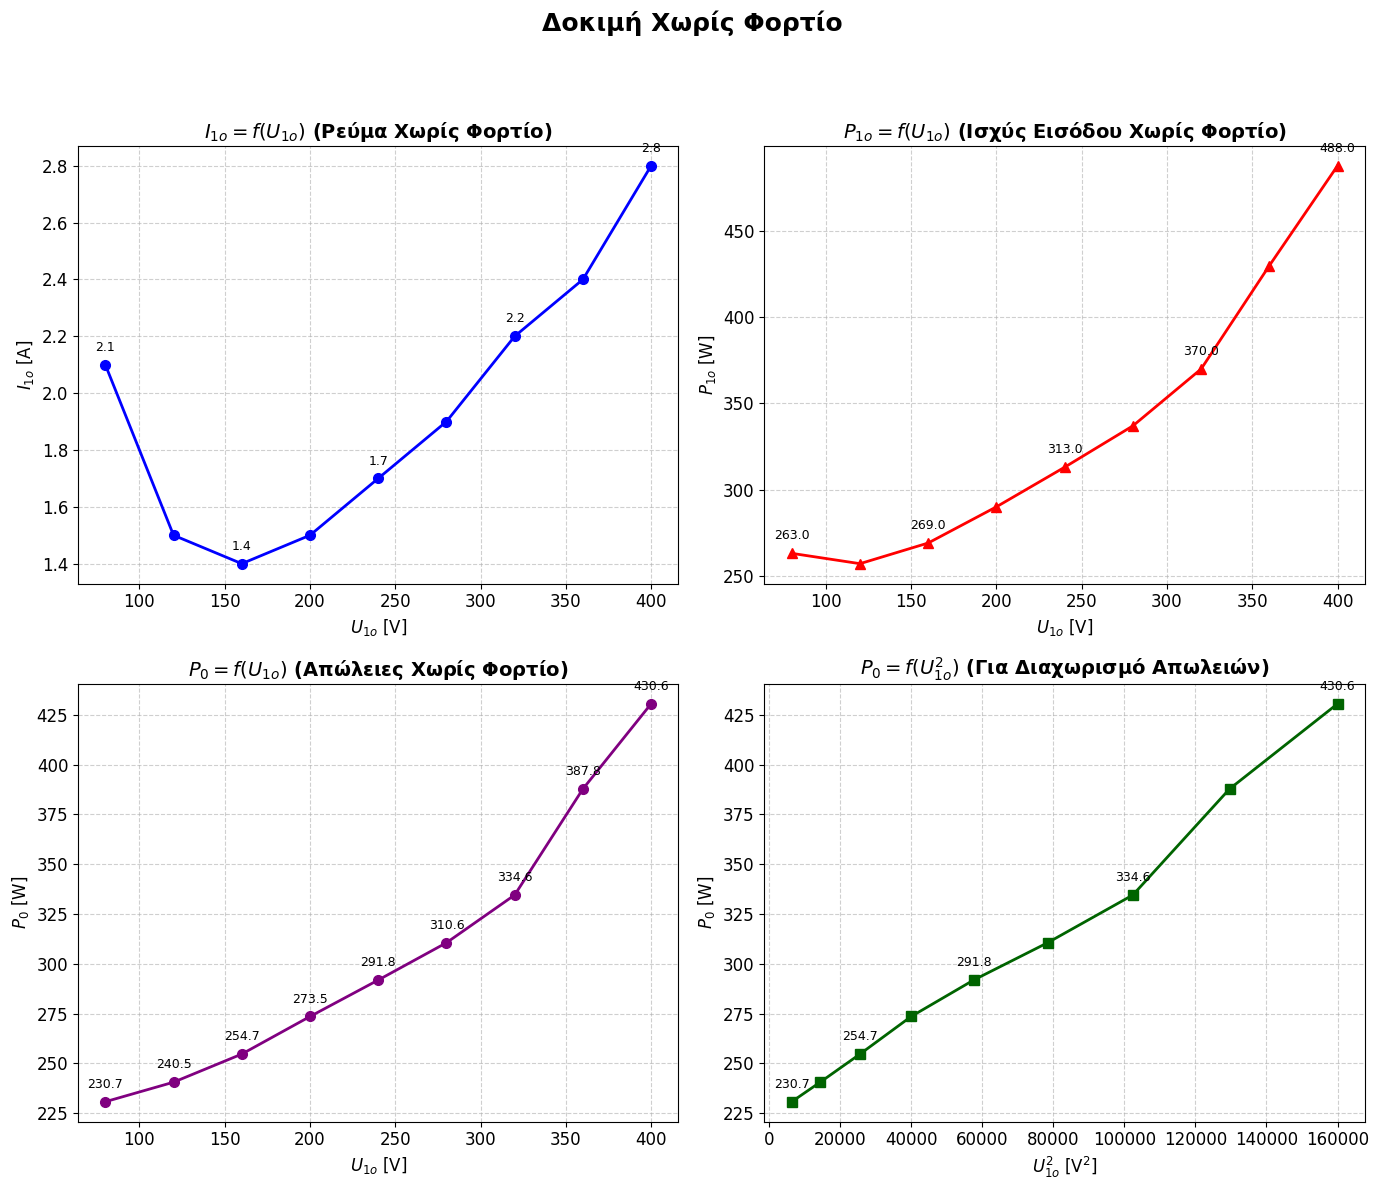

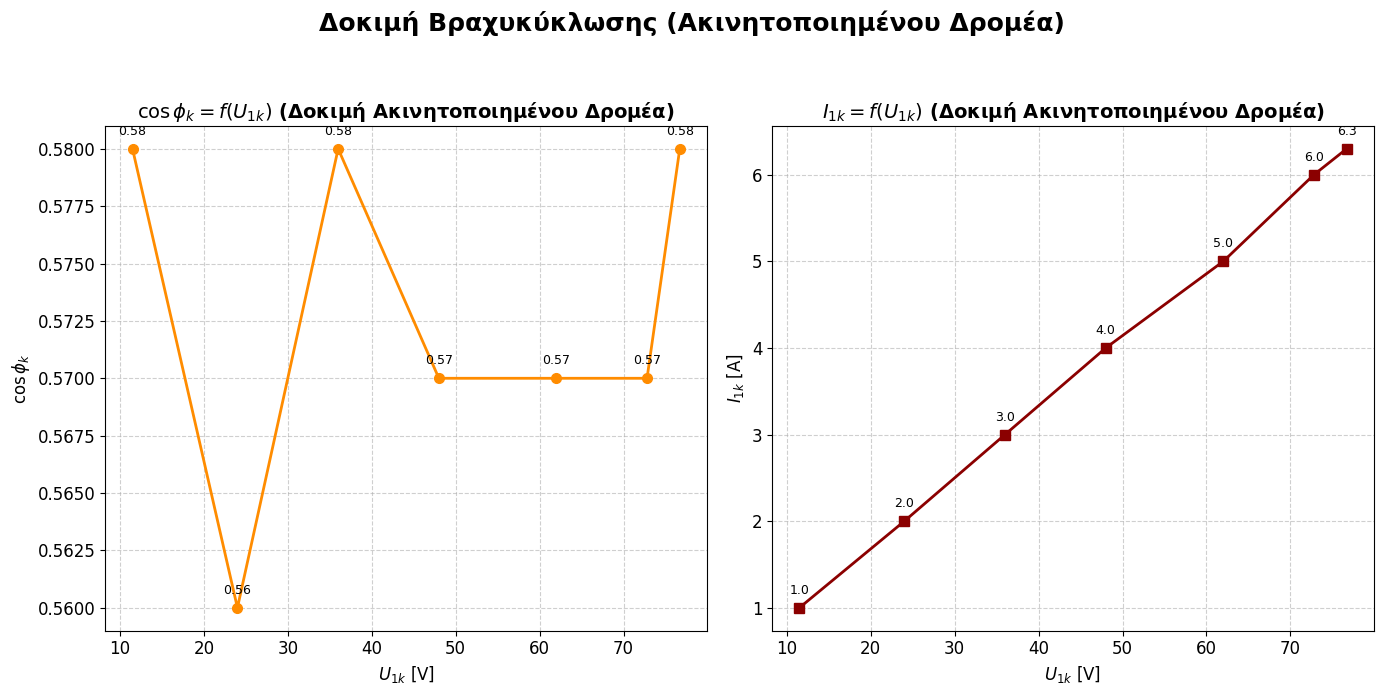

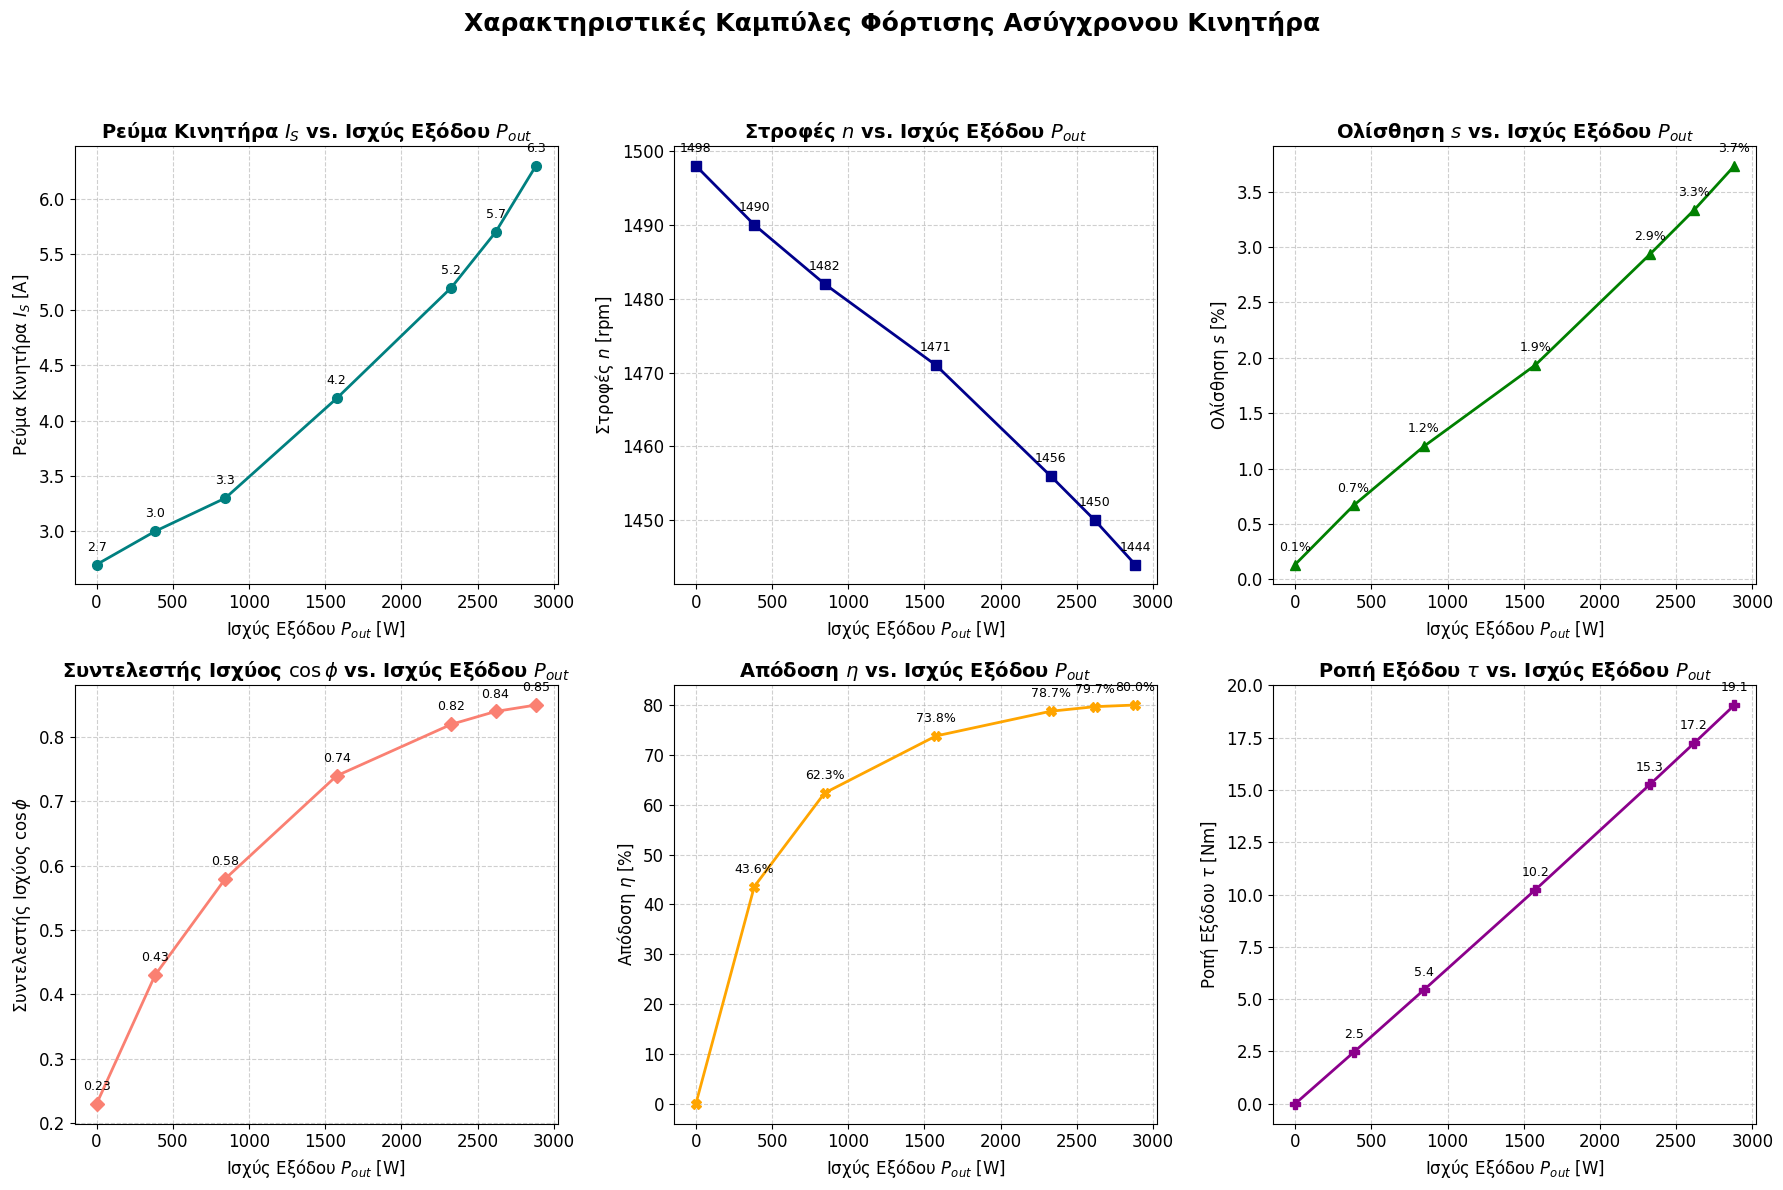

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ρυθμίσεις για ελληνικό κείμενο
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# --- Δεδομένα για R_s = 2.44 Ohm (ΑΜ: XX44) ---
Rs = 2.44

# --- Δεδομένα από τους Πίνακες ---

# Πίνακας ΔΟΚΙΜΗ ΧΩΡΙΣ ΦΟΡΤΙΟ
U1_0 = np.array([400, 360, 320, 280, 240, 200, 160, 120, 80])
I1_0 = np.array([2.8, 2.4, 2.2, 1.9, 1.7, 1.5, 1.4, 1.5, 2.1])
P1_0 = np.array([488, 430, 370, 337, 313, 290, 269, 257, 263])
Q0 = np.array([1868, 1453, 1154, 865, 629, 436, 288, 185, 141])
S0 = np.array([1931, 1511, 1216, 932, 704, 525, 395, 317, 299])
cosphi0 = np.array([0.25, 0.28, 0.30, 0.36, 0.45, 0.55, 0.68, 0.81, 0.88])
n_no_load = np.array([1497, 1494, 1495, 1491, 1491, 1488, 1479, 1459, 1384])

# Υπολογισμοί για Πίνακα ΔΟΚΙΜΗ ΧΩΡΙΣ ΦΟΡΤΙΟ
Pcu1_0 = 3 * I1_0**2 * Rs
P0 = P1_0 - Pcu1_0
U1_0_squared = U1_0**2

# Πίνακας ΔΟΚΙΜΗ ΑΚΙΝΗΤΟΠΟΙΗΜΕΝΟΥ ΔΡΟΜΕΑ
U1_K = np.array([11.5, 24, 36, 48, 62, 72.8, 76.7])
I1_K = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.3])
P1_K = np.array([11.2, 46, 108.2, 187.7, 313, 431, 480])
Qk = np.array([15.7, 68.5, 150.5, 271.1, 449, 614, 677])
Sk = np.array([19.3, 82.6, 185, 330.2, 547, 750, 831])
cosphiK = np.array([0.58, 0.56, 0.58, 0.57, 0.57, 0.57, 0.58])

# Πίνακας ΦΟΡΤΙΣΗ ΑΣΥΓΧΡΟΝΟΥ ΚΙΝΗΤΗΡΑ
Us = np.array([400, 400, 400, 400, 400, 400, 400])
Is = np.array([2.7, 3.0, 3.3, 4.2, 5.2, 5.7, 6.3])
Pin = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])
Qin = np.array([1842, 1850, 1872, 1947, 2070, 2145, 2205])
Sin = np.array([1898, 2051, 2312, 2890, 3600, 3924, 4219])
cosphi_load = np.array([0.23, 0.43, 0.58, 0.74, 0.82, 0.84, 0.85])
n_load = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])

# --- Υπολογισμοί για Πίνακα ΦΟΡΤΙΣΗ ΑΣΥΓΧΡΟΝΟΥ ΚΙΝΗΤΗΡΑ ---
ns = 1500 # rpm
omega_s = (2 * np.pi * ns) / 60 # rad/s

# Υπολογισμός απωλειών από δεδομένα "ΔΟΚΙΜΗ ΧΩΡΙΣ ΦΟΡΤΙΟ"
# Σταθερές απώλειες (απώλειες πυρήνα και μηχανικές)
# Από την καμπύλη P0 = f(U1_0^2), παρεκτείνουμε για U1_0^2 = 0
# Έστω ότι επιλέγουμε ένα σημείο για να υπολογίσουμε τις απώλειες
# Χρησιμοποιούμε τη μέση τιμή των P0 για χαμηλές τάσεις όπου οι απώλειες πυρήνα είναι μικρές
# Έστω ότι P_fe + P_mech = P_0 στο ονομαστικό ρεύμα χωρίς φορτίο, ή στην ελάχιστη P0.
# Εδώ, παίρνουμε τα δεδομένα για το σημείο όπου U1_0 = 400V (πρώτη τιμή) και υποθέτουμε
# ότι οι απώλειες χωρίς φορτίο αντιπροσωπεύουν το άθροισμα Pfe + Pmech.
# Ωστόσο, για πιο ακριβή προσδιορισμό, θα πρέπει να γίνει γραμμική παλινδρόμηση
# του P0 έναντι του U1_0^2 και να βρεθεί η τομή με τον άξονα y (για U1_0^2 = 0).
# Από το εργαστήριο, συχνά δίνεται μια εκτίμηση ή υπολογίζεται ως εξής:
# Από την καμπύλη P0 = f(U1_0^2) (Ερώτημα 1, διάγραμμα 4), η τομή με τον άξονα y δίνει τις μηχανικές απώλειες
# και το υπόλοιπο είναι οι απώλειες πυρήνα.
# Για την απλοποίηση και την εκτέλεση του κώδικα, θα χρησιμοποιήσω τις τιμές που έδωσες:
Pfe = 199.94 # Απώλειες σιδήρου
Pmech = 230.68 # Μηχανικές απώλειες

s_percent = ((ns - n_load) / ns) * 100
Pcu_load = 3 * Is**2 * Rs
Pout = Pin - Pfe - Pmech - Pcu_load
# Λόγω αρνητικής Pout στην πρώτη μέτρηση, την θέτουμε 0 για υπολογισμό ροπής/απόδοσης
Pout[Pout < 0] = 0
omega_load = (2 * np.pi * n_load) / 60
tau_out = Pout / omega_load
eta_percent = (Pout / Pin) * 100
eta_percent[np.isnan(eta_percent)] = 0 # Handle division by zero for Pout=0

# --- Γραφικές Παραστάσεις Ερώτημα 1 ---
plt.figure(figsize=(14, 12)) # Μεγαλύτερο σχήμα για καλύτερη ορατότητα

# P_0 = f(U_1o) - Σημαντικότερη για απώλειες
ax1 = plt.subplot(2, 2, 3)
ax1.plot(U1_0, P0, marker='o', linestyle='-', linewidth=2, markersize=7, color='purple')
ax1.set_title('$P_0 = f(U_{1o})$ (Απώλειες Χωρίς Φορτίο)', fontsize=14, fontweight='bold')
ax1.set_xlabel('$U_{1o}$ [V]', fontsize=12)
ax1.set_ylabel('$P_0$ [W]', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
# Προσθήκη τιμών στα σημεία
for i, txt in enumerate(P0):
    ax1.annotate(f'{txt:.1f}', (U1_0[i], P0[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# P_0 = f(U_1o^2) - Για διαχωρισμό απωλειών
ax2 = plt.subplot(2, 2, 4)
ax2.plot(U1_0_squared, P0, marker='s', linestyle='-', linewidth=2, markersize=7, color='darkgreen')
ax2.set_title('$P_0 = f(U_{1o}^2)$ (Για Διαχωρισμό Απωλειών)', fontsize=14, fontweight='bold')
ax2.set_xlabel('$U_{1o}^2$ [V$^2$]', fontsize=12)
ax2.set_ylabel('$P_0$ [W]', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
# Προσθήκη τιμών στα σημεία (πιο αραιά για να μην επικαλύπτονται)
for i, txt in enumerate(P0):
    if i % 2 == 0: # Εμφάνιση κάθε δεύτερης τιμής
        ax2.annotate(f'{txt:.1f}', (U1_0_squared[i], P0[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# I_1o = f(U_1o)
ax3 = plt.subplot(2, 2, 1)
ax3.plot(U1_0, I1_0, marker='o', linestyle='-', linewidth=2, markersize=7, color='blue')
ax3.set_title('$I_{1o} = f(U_{1o})$ (Ρεύμα Χωρίς Φορτίο)', fontsize=14, fontweight='bold')
ax3.set_xlabel('$U_{1o}$ [V]', fontsize=12)
ax3.set_ylabel('$I_{1o}$ [A]', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.6)
# Προσθήκη τιμών στα σημεία (πιο αραιά)
for i, txt in enumerate(I1_0):
    if i % 2 == 0:
        ax3.annotate(f'{txt:.1f}', (U1_0[i], I1_0[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# P_1o = f(U_1o)
ax4 = plt.subplot(2, 2, 2)
ax4.plot(U1_0, P1_0, marker='^', linestyle='-', linewidth=2, markersize=7, color='red')
ax4.set_title('$P_{1o} = f(U_{1o})$ (Ισχύς Εισόδου Χωρίς Φορτίο)', fontsize=14, fontweight='bold')
ax4.set_xlabel('$U_{1o}$ [V]', fontsize=12)
ax4.set_ylabel('$P_{1o}$ [W]', fontsize=12)
ax4.grid(True, linestyle='--', alpha=0.6)
# Προσθήκη τιμών στα σημεία (πιο αραιά)
for i, txt in enumerate(P1_0):
    if i % 2 == 0:
        ax4.annotate(f'{txt:.1f}', (U1_0[i], P1_0[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


plt.suptitle('Δοκιμή Χωρίς Φορτίο', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

# --- Γραφικές Παραστάσεις Ερώτημα 2 ---
plt.figure(figsize=(14, 7)) # Μεγαλύτερο σχήμα

ax5 = plt.subplot(1, 2, 1)
ax5.plot(U1_K, cosphiK, marker='o', linestyle='-', linewidth=2, markersize=7, color='darkorange')
ax5.set_title('$\\cos\\phi_k = f(U_{1k})$ (Δοκιμή Ακινητοποιημένου Δρομέα)', fontsize=14, fontweight='bold')
ax5.set_xlabel('$U_{1k}$ [V]', fontsize=12)
ax5.set_ylabel('$\\cos\\phi_k$', fontsize=12)
ax5.grid(True, linestyle='--', alpha=0.6)
# Προσθήκη τιμών στα σημεία
for i, txt in enumerate(cosphiK):
    ax5.annotate(f'{txt:.2f}', (U1_K[i], cosphiK[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


ax6 = plt.subplot(1, 2, 2)
ax6.plot(U1_K, I1_K, marker='s', linestyle='-', linewidth=2, markersize=7, color='darkred')
ax6.set_title('$I_{1k} = f(U_{1k})$ (Δοκιμή Ακινητοποιημένου Δρομέα)', fontsize=14, fontweight='bold')
ax6.set_xlabel('$U_{1k}$ [V]', fontsize=12)
ax6.set_ylabel('$I_{1k}$ [A]', fontsize=12)
ax6.grid(True, linestyle='--', alpha=0.6)
# Προσθήκη τιμών στα σημεία
for i, txt in enumerate(I1_K):
    ax6.annotate(f'{txt:.1f}', (U1_K[i], I1_K[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


plt.suptitle('Δοκιμή Βραχυκύκλωσης (Ακινητοποιημένου Δρομέα)', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# --- Γραφικές Παραστάσεις Ερώτημα 7 ---
plt.figure(figsize=(18, 12)) # Πολύ μεγαλύτερο σχήμα για 6 υπο-διαγράμματα

# Ρεύμα Κινητήρα $I_S$ vs. Ισχύς Εξόδου $P_{out}$
ax7 = plt.subplot(2, 3, 1)
ax7.plot(Pout, Is, marker='o', linestyle='-', linewidth=2, markersize=7, color='teal')
ax7.set_title('Ρεύμα Κινητήρα $I_S$ vs. Ισχύς Εξόδου $P_{out}$', fontsize=14, fontweight='bold')
ax7.set_xlabel('Ισχύς Εξόδου $P_{out}$ [W]', fontsize=12)
ax7.set_ylabel('Ρεύμα Κινητήρα $I_S$ [A]', fontsize=12)
ax7.grid(True, linestyle='--', alpha=0.6)
for i, txt in enumerate(Is):
    ax7.annotate(f'{txt:.1f}', (Pout[i], Is[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# Στροφές $n$ vs. Ισχύς Εξόδου $P_{out}$
ax8 = plt.subplot(2, 3, 2)
ax8.plot(Pout, n_load, marker='s', linestyle='-', linewidth=2, markersize=7, color='darkblue')
ax8.set_title('Στροφές $n$ vs. Ισχύς Εξόδου $P_{out}$', fontsize=14, fontweight='bold')
ax8.set_xlabel('Ισχύς Εξόδου $P_{out}$ [W]', fontsize=12)
ax8.set_ylabel('Στροφές $n$ [rpm]', fontsize=12)
ax8.grid(True, linestyle='--', alpha=0.6)
for i, txt in enumerate(n_load):
    ax8.annotate(f'{txt:.0f}', (Pout[i], n_load[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# Ολίσθηση $s$ vs. Ισχύς Εξόδου $P_{out}$
ax9 = plt.subplot(2, 3, 3)
ax9.plot(Pout, s_percent, marker='^', linestyle='-', linewidth=2, markersize=7, color='green')
ax9.set_title('Ολίσθηση $s$ vs. Ισχύς Εξόδου $P_{out}$', fontsize=14, fontweight='bold')
ax9.set_xlabel('Ισχύς Εξόδου $P_{out}$ [W]', fontsize=12)
ax9.set_ylabel('Ολίσθηση $s$ [%]', fontsize=12)
ax9.grid(True, linestyle='--', alpha=0.6)
for i, txt in enumerate(s_percent):
    ax9.annotate(f'{txt:.1f}%', (Pout[i], s_percent[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# Συντελεστής Ισχύος $\cos\phi$ vs. Ισχύς Εξόδου $P_{out}$
ax10 = plt.subplot(2, 3, 4)
ax10.plot(Pout, cosphi_load, marker='D', linestyle='-', linewidth=2, markersize=7, color='salmon')
ax10.set_title('Συντελεστής Ισχύος $\\cos\\phi$ vs. Ισχύς Εξόδου $P_{out}$', fontsize=14, fontweight='bold')
ax10.set_xlabel('Ισχύς Εξόδου $P_{out}$ [W]', fontsize=12)
ax10.set_ylabel('Συντελεστής Ισχύος $\\cos\\phi$', fontsize=12)
ax10.grid(True, linestyle='--', alpha=0.6)
for i, txt in enumerate(cosphi_load):
    ax10.annotate(f'{txt:.2f}', (Pout[i], cosphi_load[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# Απόδοση $\eta$ vs. Ισχύς Εξόδου $P_{out}$
ax11 = plt.subplot(2, 3, 5)
ax11.plot(Pout, eta_percent, marker='X', linestyle='-', linewidth=2, markersize=7, color='orange')
ax11.set_title('Απόδοση $\\eta$ vs. Ισχύς Εξόδου $P_{out}$', fontsize=14, fontweight='bold')
ax11.set_xlabel('Ισχύς Εξόδου $P_{out}$ [W]', fontsize=12)
ax11.set_ylabel('Απόδοση $\\eta$ [%]', fontsize=12)
ax11.grid(True, linestyle='--', alpha=0.6)
for i, txt in enumerate(eta_percent):
    if txt > 0: # Avoid showing 0 for the first point if Pout was 0
        ax11.annotate(f'{txt:.1f}%', (Pout[i], eta_percent[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


# Ροπή Εξόδου $\tau$ vs. Ισχύς Εξόδου $P_{out}$
ax12 = plt.subplot(2, 3, 6)
ax12.plot(Pout, tau_out, marker='P', linestyle='-', linewidth=2, markersize=7, color='darkmagenta')
ax12.set_title('Ροπή Εξόδου $\\tau$ vs. Ισχύς Εξόδου $P_{out}$', fontsize=14, fontweight='bold')
ax12.set_xlabel('Ισχύς Εξόδου $P_{out}$ [W]', fontsize=12)
ax12.set_ylabel('Ροπή Εξόδου $\\tau$ [Nm]', fontsize=12)
ax12.grid(True, linestyle='--', alpha=0.6)
for i, txt in enumerate(tau_out):
    if Pout[i] > 0: # Only show torque if Pout is positive
        ax12.annotate(f'{txt:.1f}', (Pout[i], tau_out[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


plt.suptitle('Χαρακτηριστικές Καμπύλες Φόρτισης Ασύγχρονου Κινητήρα', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ ΣΥΓΧΡΟΝΗΣ ΓΕΝΝΗΤΡΙΑΣ
Φασική τάση V_φ = 230.9 V
Αντίσταση στάτη R = 10.8 Ω
Σύγχρονη αντίδραση X_s = 15.0 Ω

ΥΠΟΔΙΕΓΕΡΣΗ (If = 0.3A):
I_φ = 1.1 A
cos φ = 0.950 (καθυστερημένο)
sin φ = 0.312
φ = 18.2°

ΥΠΕΡΔΙΕΓΕΡΣΗ (If = 0.5A):
I_φ = 1.15 A
cos φ = 0.880 (προπορευόμενο)
sin φ = -0.475
φ = -28.4°

ΥΠΟΛΟΓΙΣΜΕΝΕΣ ΤΙΜΕΣ:
Υποδιέγερση:
  E_a = 247.7 V
  δ = 2.8°
  I·R = 11.9 V
  I·X_s = 16.5 V

Υπερδιέγερση:
  E_a = 234.6 V
  δ = 5.2°
  I·R = 12.4 V
  I·X_s = 17.2 V


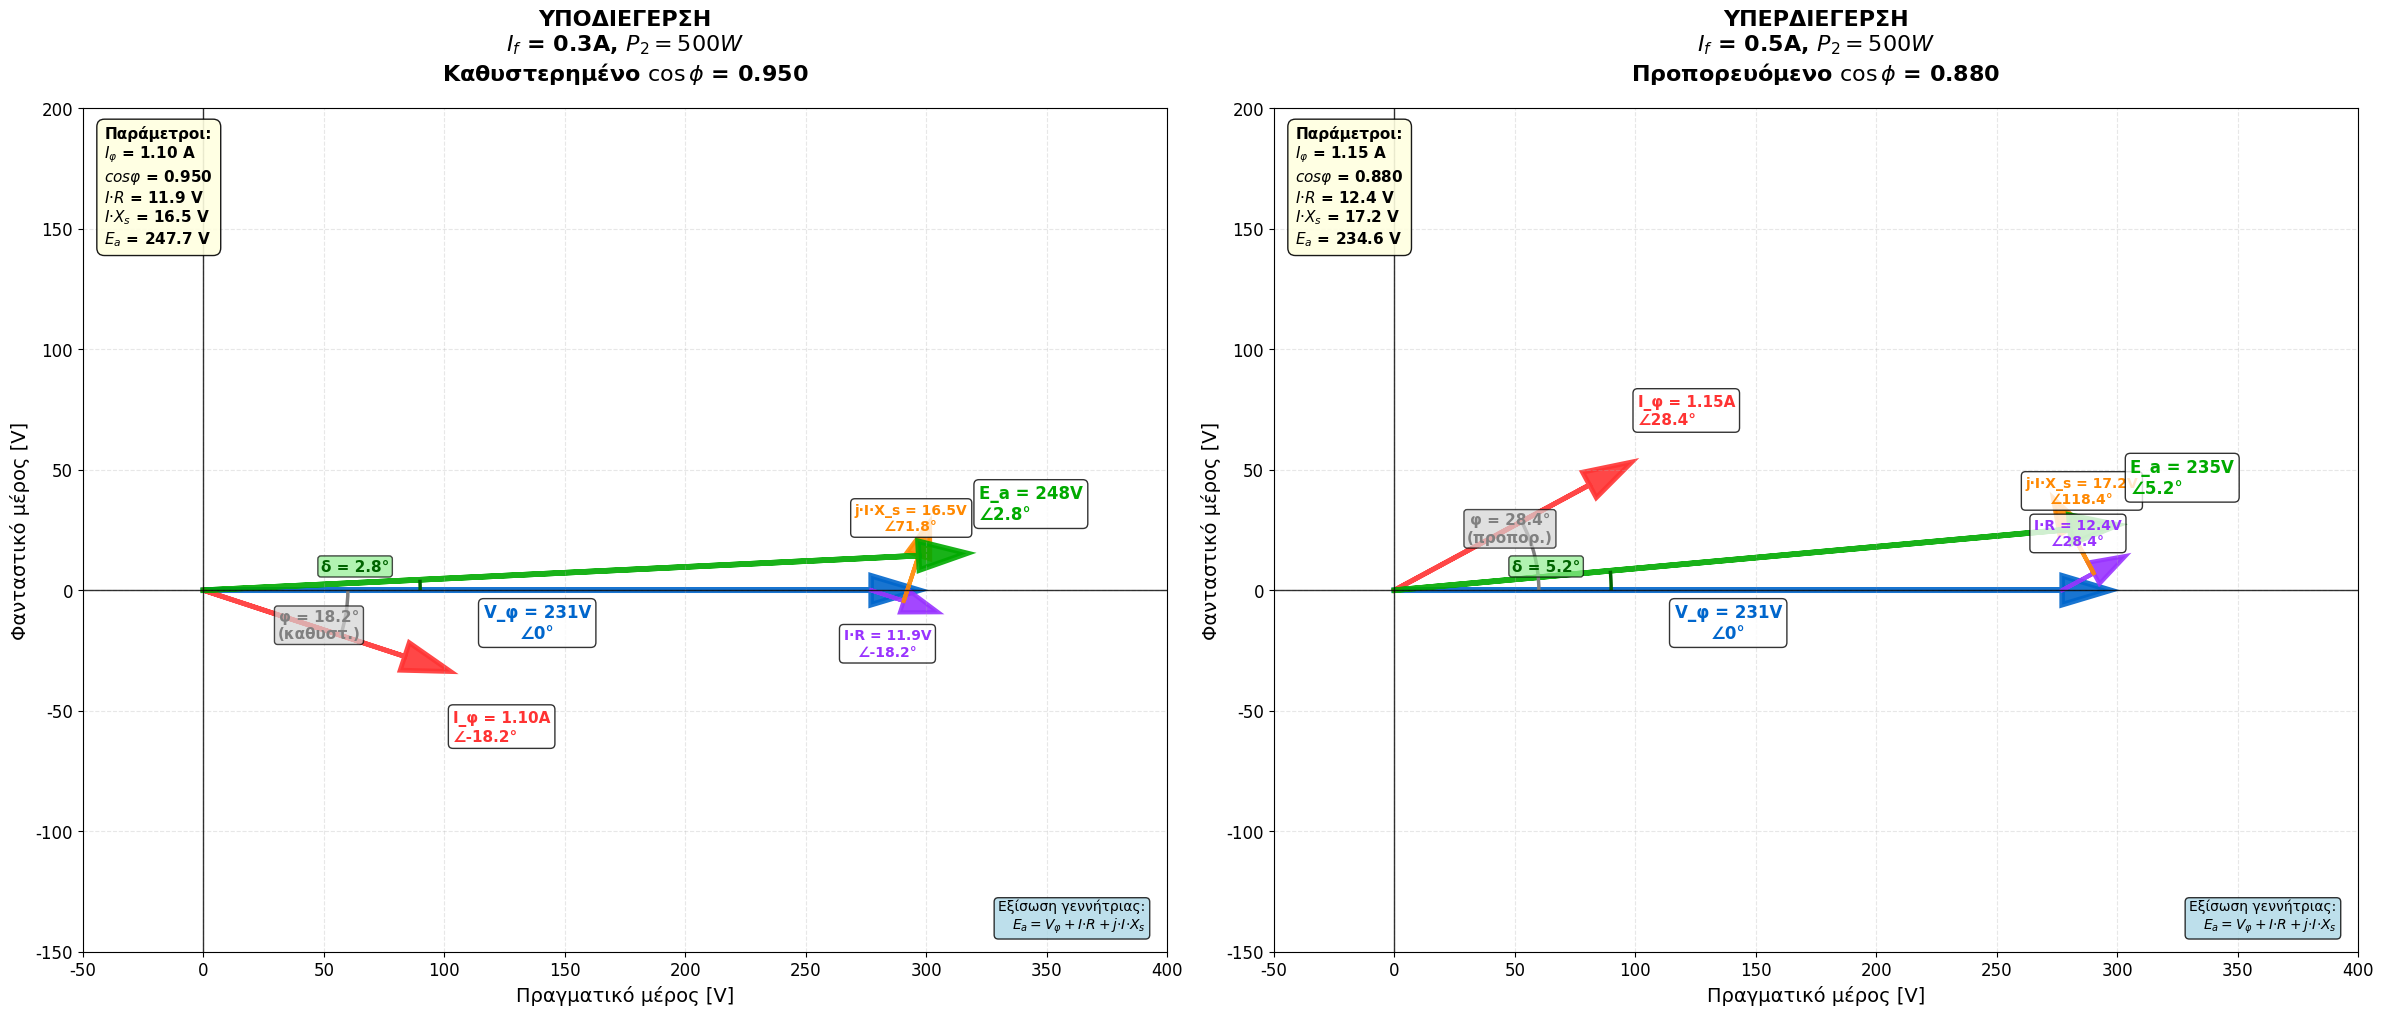


ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ ΔΙΑΝΥΣΜΑΤΙΚΩΝ ΔΙΑΓΡΑΜΜΑΤΩΝ
                    Παράμετρος                  Τιμή              Παρατηρήσεις
               Φασική τάση V_φ           230.9 V ∠0° Τάση αναφοράς (οριζόντια)
   Ρεύμα φορτίου (υποδιέγερση)        1.10 A ∠-18.2°       Καθυστερημένο ρεύμα
  Ρεύμα φορτίου (υπερδιέγερση)         1.15 A ∠28.4°       Προπορευόμενο ρεύμα
Συντελεστής ισχύος (υποδιέγ... 0.950 (καθυστερημένο)         Απορρόφηση άεργου
Συντελεστής ισχύος (υπερδιέ... 0.880 (προπορευόμενο)             Παροχή άεργου
Επαγόμενη τάση E_a (υποδιέγ...         247.7 V ∠2.8°         Μικρότερη από V_φ
Επαγόμενη τάση E_a (υπερδιέ...         234.6 V ∠5.2°        Μεγαλύτερη από V_φ
 Γωνία φορτίου δ (υποδιέγερση)                  2.8°              Θετική γωνία
Γωνία φορτίου δ (υπερδιέγερση)                  5.2°              Θετική γωνία
       Πτώση I·R (υποδιέγερση)                11.9 V               Ωμική πτώση
     Πτώση I·X_s (υποδιέγερση)                16.5 V           Επαγωγική πτώση
   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch, Arc, Rectangle
import matplotlib.patches as patches

# Ρυθμίσεις για ελληνικό κείμενο
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# Στοιχεία μηχανής
machine_data = {
    'S_rated': 0.8,  # kVA
    'U_rated': 400,  # V
    'I_rated': 1.6,  # A (Y connection)
    'If_rated': 0.6,  # A
    'n_sync': 1500,  # rpm
    'R_stator': 10.8,  # Ω
    'R_field': 440  # Ω
}

# Δεδομένα από πίνακα 3 (P2 = 500W)
data_500W = {
    'If': [0.20, 0.25, 0.30, 0.35, 0.39, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.10, 1.02, 1.00, 1.01, 1.05, 1.15, 1.30, 1.50],
    'P': [706, 710, 725, 700, 692, 692, 690, 700, 720, 727],
    'S': [1035, 865, 760, 705, 692, 700, 727, 800, 900, 1035],
    'Q': [760, 495, 240, 100, 0, -100, -230, -380, -540, -740],
    'cos_phi': [0.68, 0.82, 0.95, 0.99, 1.00, 0.99, 0.95, 0.88, 0.80, 0.70]
}

print("=" * 80)
print("ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ ΣΥΓΧΡΟΝΗΣ ΓΕΝΝΗΤΡΙΑΣ")
print("=" * 80)

# Επιλογή σημείων από πίνακα 3
# Υποδιέγερση: If = 0.30A (index 2)
under_idx = 2
If_under = data_500W['If'][under_idx]
I_phi_under = data_500W['I_phi'][under_idx]
cos_phi_under = data_500W['cos_phi'][under_idx]
P_under = data_500W['P'][under_idx]
Q_under = data_500W['Q'][under_idx]

# Υπερδιέγερση: If = 0.50A (index 7)
over_idx = 7
If_over = data_500W['If'][over_idx]
I_phi_over = data_500W['I_phi'][over_idx]
cos_phi_over = data_500W['cos_phi'][over_idx]
P_over = data_500W['P'][over_idx]
Q_over = data_500W['Q'][over_idx]

# Βασικές παράμετροι
V_phi = 400 / np.sqrt(3)  # Φασική τάση (Y σύνδεση)
X_s = 15.0  # Εκτίμηση σύγχρονης αντίδρασης (Ω)
R_stator = machine_data['R_stator']

print(f"Φασική τάση V_φ = {V_phi:.1f} V")
print(f"Αντίσταση στάτη R = {R_stator} Ω")
print(f"Σύγχρονη αντίδραση X_s = {X_s} Ω")

# Υπολογισμοί για υποδιέγερση (καθυστερημένο cos φ)
sin_phi_under = np.sqrt(1 - cos_phi_under**2)
phi_under_rad = np.arccos(cos_phi_under)
phi_under_deg = np.degrees(phi_under_rad)

print(f"\nΥΠΟΔΙΕΓΕΡΣΗ (If = {If_under}A):")
print(f"I_φ = {I_phi_under} A")
print(f"cos φ = {cos_phi_under:.3f} (καθυστερημένο)")
print(f"sin φ = {sin_phi_under:.3f}")
print(f"φ = {phi_under_deg:.1f}°")

# Υπολογισμοί για υπερδιέγερση (προπορευόμενο cos φ)
sin_phi_over = -np.sqrt(1 - cos_phi_over**2)  # Αρνητικό για προπορευόμενο
phi_over_rad = -np.arccos(cos_phi_over)
phi_over_deg = np.degrees(phi_over_rad)

print(f"\nΥΠΕΡΔΙΕΓΕΡΣΗ (If = {If_over}A):")
print(f"I_φ = {I_phi_over} A")
print(f"cos φ = {cos_phi_over:.3f} (προπορευόμενο)")
print(f"sin φ = {sin_phi_over:.3f}")
print(f"φ = {phi_over_deg:.1f}°")

# Σύνθετοι υπολογισμοί για υποδιέγερση
I_phi_under_complex = I_phi_under * (np.cos(-phi_under_rad) + 1j * np.sin(-phi_under_rad))
IR_drop_under = I_phi_under_complex * R_stator
jIXs_drop_under = 1j * I_phi_under_complex * X_s
E_a_under_complex = V_phi + IR_drop_under + jIXs_drop_under  # Για γεννήτρια: E_a = V_φ + I·R + j·I·X_s
E_a_under = np.abs(E_a_under_complex)
delta_under_rad = np.angle(E_a_under_complex)
delta_under_deg = np.degrees(delta_under_rad)

# Σύνθετοι υπολογισμοί για υπερδιέγερση
I_phi_over_complex = I_phi_over * (np.cos(-phi_over_rad) + 1j * np.sin(-phi_over_rad))
IR_drop_over = I_phi_over_complex * R_stator
jIXs_drop_over = 1j * I_phi_over_complex * X_s
E_a_over_complex = V_phi + IR_drop_over + jIXs_drop_over  # Για γεννήτρια: E_a = V_φ + I·R + j·I·X_s
E_a_over = np.abs(E_a_over_complex)
delta_over_rad = np.angle(E_a_over_complex)
delta_over_deg = np.degrees(delta_over_rad)

print(f"\nΥΠΟΛΟΓΙΣΜΕΝΕΣ ΤΙΜΕΣ:")
print(f"Υποδιέγερση:")
print(f"  E_a = {E_a_under:.1f} V")
print(f"  δ = {delta_under_deg:.1f}°")
print(f"  I·R = {abs(IR_drop_under):.1f} V")
print(f"  I·X_s = {abs(jIXs_drop_under):.1f} V")
print(f"\nΥπερδιέγερση:")
print(f"  E_a = {E_a_over:.1f} V")
print(f"  δ = {delta_over_deg:.1f}°")
print(f"  I·R = {abs(IR_drop_over):.1f} V")
print(f"  I·X_s = {abs(jIXs_drop_over):.1f} V")

def draw_enhanced_phasor_diagram(ax, title, V_phi, I_complex, R, X_s, case_type, phi_deg, delta_deg):
    """Σχεδίαση βελτιωμένου διανυσματικού διαγράμματος με σαφή χρώματα"""

    # Υπολογισμός διανυσμάτων
    IR_drop = I_complex * R
    jIXs_drop = 1j * I_complex * X_s
    E_a_complex = V_phi + IR_drop + jIXs_drop

    # Κλίμακες για οπτικοποίηση
    voltage_scale = 1.2  # Κλίμακα για τάσεις
    current_scale = 80   # Κλίμακα για ρεύματα (για καλύτερη ορατότητα)

    # Συντεταγμένες διανυσμάτων
    V_vec = np.array([V_phi * voltage_scale, 0])
    I_vec = np.array([I_complex.real * current_scale, I_complex.imag * current_scale])
    IR_vec = np.array([IR_drop.real * voltage_scale, IR_drop.imag * voltage_scale])
    jIXs_vec = np.array([jIXs_drop.real * voltage_scale, jIXs_drop.imag * voltage_scale])
    E_a_vec = np.array([E_a_complex.real * voltage_scale, E_a_complex.imag * voltage_scale])

    # Ρυθμίσεις άξονα
    ax.set_xlim(-50, 400)
    ax.set_ylim(-150, 200)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Πραγματικό μέρος [V]', fontsize=14)
    ax.set_ylabel('Φανταστικό μέρος [V]', fontsize=14)

    # Σχεδίαση αξόνων αναφοράς
    ax.axhline(y=0, color='black', linewidth=1, alpha=0.8)
    ax.axvline(x=0, color='black', linewidth=1, alpha=0.8)

    # Χρώματα για κάθε διάνυσμα
    colors = {
        'V_phi': '#0066CC',      # Μπλε για V_φ
        'I_phi': '#FF3333',      # Κόκκινο για I_φ
        'IR': '#9933FF',         # Βιολετί για I·R
        'jIXs': '#FF8800',       # Πορτοκαλί για j·I·X_s
        'E_a': '#00AA00'         # Πράσινο για E_a
    }

    # 1. Διάνυσμα τάσης V_φ (αναφορά - οριζόντια)
    ax.arrow(0, 0, V_vec[0], V_vec[1],
             head_width=12, head_length=20,
             fc=colors['V_phi'], ec=colors['V_phi'],
             linewidth=4, alpha=0.9)
    ax.text(V_vec[0]/2, -20, f'V_φ = {V_phi:.0f}V\n∠0°',
            fontsize=12, ha='center', color=colors['V_phi'],
            fontweight='bold', bbox=dict(boxstyle='round,pad=0.3',
                                       facecolor='white', alpha=0.8))

    # 2. Διάνυσμα ρεύματος I_φ
    I_magnitude = abs(I_complex)
    I_angle_deg = np.degrees(np.angle(I_complex))
    ax.arrow(0, 0, I_vec[0], I_vec[1],
             head_width=12, head_length=20,
             fc=colors['I_phi'], ec=colors['I_phi'],
             linewidth=3.5, alpha=0.9)

    # Υπολογισμός θέσης κειμένου για I_φ
    I_text_offset = 25 if I_vec[1] >= 0 else -35
    ax.text(I_vec[0] + 20, I_vec[1] + I_text_offset,
            f'I_φ = {I_magnitude:.2f}A\n∠{I_angle_deg:.1f}°',
            fontsize=11, color=colors['I_phi'], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # 3. Πτώση τάσης I·R (από V_φ)
    IR_magnitude = abs(IR_drop)
    IR_angle_deg = np.degrees(np.angle(IR_drop))
    ax.arrow(V_vec[0], V_vec[1], IR_vec[0], IR_vec[1],
             head_width=10, head_length=15,
             fc=colors['IR'], ec=colors['IR'],
             linewidth=3, alpha=0.9)

    # Κείμενο για I·R
    IR_text_x = V_vec[0] + IR_vec[0]/2
    IR_text_y = V_vec[1] + IR_vec[1]/2 + (15 if IR_vec[1] >= 0 else -25)
    ax.text(IR_text_x, IR_text_y,
            f'I·R = {IR_magnitude:.1f}V\n∠{IR_angle_deg:.1f}°',
            fontsize=10, ha='center', color=colors['IR'], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # 4. Πτώση τάσης j·I·X_s (από το τέλος του I·R)
    start_jIXs = V_vec + IR_vec
    jIXs_magnitude = abs(jIXs_drop)
    jIXs_angle_deg = np.degrees(np.angle(jIXs_drop))
    ax.arrow(start_jIXs[0], start_jIXs[1], jIXs_vec[0], jIXs_vec[1],
             head_width=10, head_length=15,
             fc=colors['jIXs'], ec=colors['jIXs'],
             linewidth=3, alpha=0.9)

    # Κείμενο για j·I·X_s
    jIXs_text_x = start_jIXs[0] + jIXs_vec[0]/2
    jIXs_text_y = start_jIXs[1] + jIXs_vec[1]/2 + (20 if jIXs_vec[1] >= 0 else -30)
    ax.text(jIXs_text_x, jIXs_text_y,
            f'j·I·X_s = {jIXs_magnitude:.1f}V\n∠{jIXs_angle_deg:.1f}°',
            fontsize=10, ha='center', color=colors['jIXs'], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # 5. Επαγόμενη τάση E_a (από την αρχή)
    E_a_magnitude = abs(E_a_complex)
    E_a_angle_deg = np.degrees(np.angle(E_a_complex))
    ax.arrow(0, 0, E_a_vec[0], E_a_vec[1],
             head_width=12, head_length=20,
             fc=colors['E_a'], ec=colors['E_a'],
             linewidth=4, alpha=0.9)

    # Κείμενο για E_a
    E_a_text_offset_x = 25 if E_a_vec[0] > 200 else -60
    E_a_text_offset_y = 15 if E_a_vec[1] >= 0 else -25
    ax.text(E_a_vec[0] + E_a_text_offset_x, E_a_vec[1] + E_a_text_offset_y,
            f'E_a = {E_a_magnitude:.0f}V\n∠{E_a_angle_deg:.1f}°',
            fontsize=12, color=colors['E_a'], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # Σχεδίαση γωνιών με τόξα
    # Γωνία φ (μεταξύ V_φ και I_φ)
    if abs(phi_deg) > 1:
        angle_radius = 60
        if case_type == 'under':
            # Καθυστερημένο: από I προς V (αρνητική γωνία)
            arc_phi = Arc((0, 0), 2*angle_radius, 2*angle_radius,
                         angle=0, theta1=I_angle_deg, theta2=0,
                         color='gray', linewidth=2.5, linestyle='-')
            ax.add_patch(arc_phi)
            ax.text(angle_radius*0.8, -20, f'φ = {abs(phi_deg):.1f}°\n(καθυστ.)',
                    fontsize=11, ha='center', color='gray', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgray', alpha=0.7))
        else:
            # Προπορευόμενο: από V προς I (θετική γωνία)
            arc_phi = Arc((0, 0), 2*angle_radius, 2*angle_radius,
                         angle=0, theta1=0, theta2=I_angle_deg,
                         color='gray', linewidth=2.5, linestyle='-')
            ax.add_patch(arc_phi)
            ax.text(angle_radius*0.8, 20, f'φ = {abs(phi_deg):.1f}°\n(προπορ.)',
                    fontsize=11, ha='center', color='gray', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgray', alpha=0.7))

    # Γωνία δ (μεταξύ V_φ και E_a) - γωνία φορτίου
    if abs(delta_deg) > 1:
        angle_radius2 = 90
        if delta_deg > 0:
            arc_delta = Arc((0, 0), 2*angle_radius2, 2*angle_radius2,
                           angle=0, theta1=0, theta2=E_a_angle_deg,
                           color='darkgreen', linewidth=2.5, linestyle='-')
            ax.add_patch(arc_delta)
            ax.text(angle_radius2*0.7, 8, f'δ = {delta_deg:.1f}°',
                    fontsize=11, ha='center', color='darkgreen', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7))
        else:
            arc_delta = Arc((0, 0), 2*angle_radius2, 2*angle_radius2,
                           angle=0, theta1=E_a_angle_deg, theta2=0,
                           color='darkgreen', linewidth=2.5, linestyle='-')
            ax.add_patch(arc_delta)
            ax.text(angle_radius2*0.7, -45, f'δ = {abs(delta_deg):.1f}°',
                    fontsize=11, ha='center', color='darkgreen', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7))

    # Προσθήκη πληροφοριών στη γωνία
    info_text = f'Παράμετροι:\n'
    info_text += f'$I_φ$ = {I_magnitude:.2f} A\n'
    info_text += f'$cos φ$ = {abs(np.cos(np.radians(phi_deg))):.3f}\n'
    info_text += f'$I·R$ = {IR_magnitude:.1f} V\n'
    info_text += f'$I·X_s$ = {jIXs_magnitude:.1f} V\n'
    info_text += f'$E_a$ = {E_a_magnitude:.1f} V'

    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.9))

    # Προσθήκη εξίσωσης στη γωνία
    equation_text = 'Εξίσωση γεννήτριας:\n$E_a = V_φ + I·R + j·I·X_s$'
    ax.text(0.98, 0.02, equation_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8))

# Δημιουργία διαγραμμάτων
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Διάγραμμα υποδιέγερσης
draw_enhanced_phasor_diagram(
    ax1,
    f'ΥΠΟΔΙΕΓΕΡΣΗ\n$I_f$ = {If_under}A, $P_2 = 500W$\nΚαθυστερημένο $\cos\phi$ = {cos_phi_under:.3f}',
    V_phi, I_phi_under_complex, R_stator, X_s, 'under',
    phi_under_deg, delta_under_deg
)

# Διάγραμμα υπερδιέγερσης
draw_enhanced_phasor_diagram(
    ax2,
    f'ΥΠΕΡΔΙΕΓΕΡΣΗ\n$I_f$ = {If_over}A, $P_2 = 500W$\nΠροπορευόμενο $\cos\phi$ = {cos_phi_over:.3f}',
    V_phi, I_phi_over_complex, R_stator, X_s, 'over',
    phi_over_deg, delta_over_deg
)

plt.tight_layout()
plt.show()

# Δημιουργία πίνακα αποτελεσμάτων
print("\n" + "="*100)
print("ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ ΔΙΑΝΥΣΜΑΤΙΚΩΝ ΔΙΑΓΡΑΜΜΑΤΩΝ")
print("="*100)

results_data = {
    'Παράμετρος': [
        'Φασική τάση V_φ',
        'Ρεύμα φορτίου (υποδιέγερση)',
        'Ρεύμα φορτίου (υπερδιέγερση)',
        'Συντελεστής ισχύος (υποδιέγερση)',
        'Συντελεστής ισχύος (υπερδιέγερση)',
        'Επαγόμενη τάση E_a (υποδιέγερση)',
        'Επαγόμενη τάση E_a (υπερδιέγερση)',
        'Γωνία φορτίου δ (υποδιέγερση)',
        'Γωνία φορτίου δ (υπερδιέγερση)',
        'Πτώση I·R (υποδιέγερση)',
        'Πτώση I·X_s (υποδιέγερση)',
        'Πτώση I·R (υπερδιέγερση)',
        'Πτώση I·X_s (υπερδιέγερση)'
    ],
    'Τιμή': [
        f'{V_phi:.1f} V ∠0°',
        f'{I_phi_under:.2f} A ∠{np.degrees(np.angle(I_phi_under_complex)):.1f}°',
        f'{I_phi_over:.2f} A ∠{np.degrees(np.angle(I_phi_over_complex)):.1f}°',
        f'{cos_phi_under:.3f} (καθυστερημένο)',
        f'{cos_phi_over:.3f} (προπορευόμενο)',
        f'{E_a_under:.1f} V ∠{delta_under_deg:.1f}°',
        f'{E_a_over:.1f} V ∠{delta_over_deg:.1f}°',
        f'{delta_under_deg:.1f}°',
        f'{delta_over_deg:.1f}°',
        f'{abs(IR_drop_under):.1f} V',
        f'{abs(jIXs_drop_under):.1f} V',
        f'{abs(IR_drop_over):.1f} V',
        f'{abs(jIXs_drop_over):.1f} V'
    ],
    'Παρατηρήσεις': [
        'Τάση αναφοράς (οριζόντια)',
        'Καθυστερημένο ρεύμα',
        'Προπορευόμενο ρεύμα',
        'Απορρόφηση άεργου',
        'Παροχή άεργου',
        'Μικρότερη από V_φ',
        'Μεγαλύτερη από V_φ',
        'Θετική γωνία',
        'Θετική γωνία',
        'Ωμική πτώση',
        'Επαγωγική πτώση',
        'Ωμική πτώση',
        'Επαγωγική πτώση'
    ]
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False, max_colwidth=30))

print(f"\n{'='*100}")
print("ΚΥΡΙΕΣ ΠΑΡΑΤΗΡΗΣΕΙΣ:")
print(f"{'='*100}")
print("1. Στην υποδιέγερση (If χαμηλό):")
print("   - Καθυστερημένο cos φ (απορρόφηση άεργου)")
print("   - E_a < V_φ")
print("   - Το ρεύμα καθυστερεί από την τάση")

print("\n2. Στην υπερδιέγερση (If υψηλό):")
print("   - Προπορευόμενο cos φ (παροχή άεργου)")
print("   - E_a > V_φ")
print("   - Το ρεύμα προπορεύεται της τάσης")

print("\n3. Γεννήτρια: E_a = V_φ + I·R + j·I·X_s")
print("   (Η επαγόμενη τάση είναι μεγαλύτερη από την τάση ακροδεκτών)")

print(f"\n{'='*100}")
print("ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ")
print(f"{'='*100}")

ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ

1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)
--------------------------------------------------


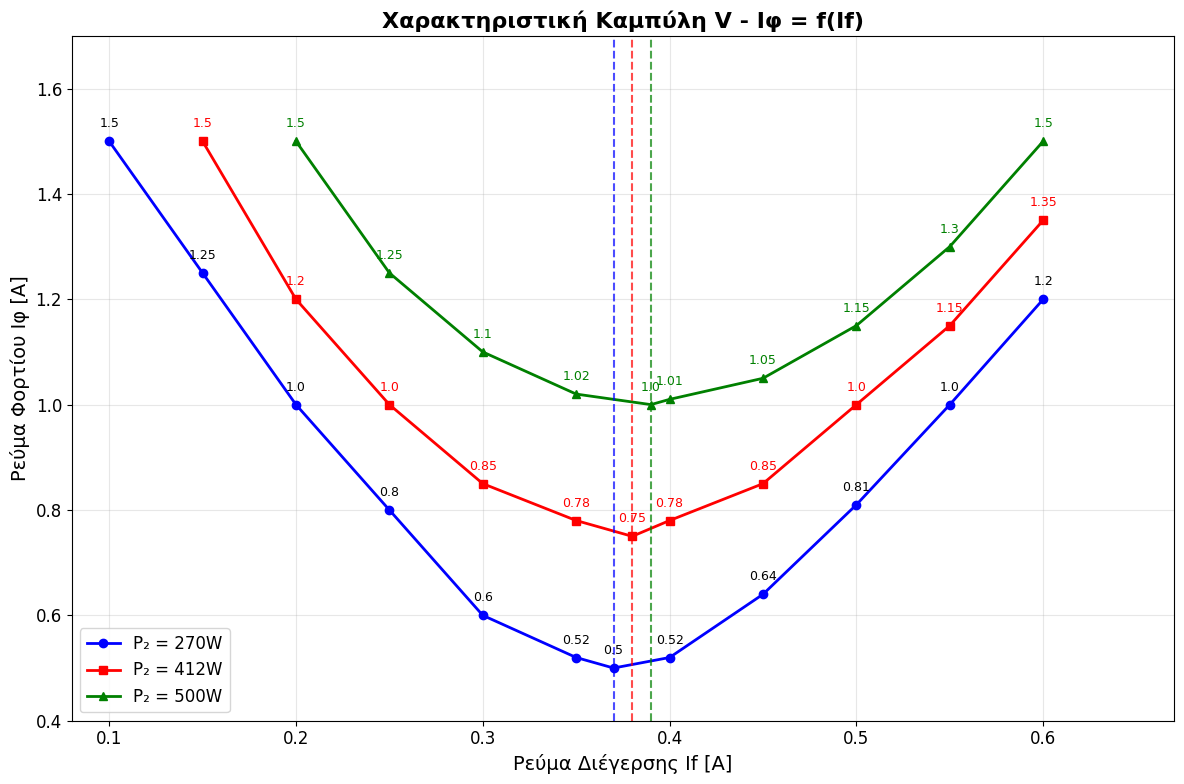


2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)
--------------------------------------------------


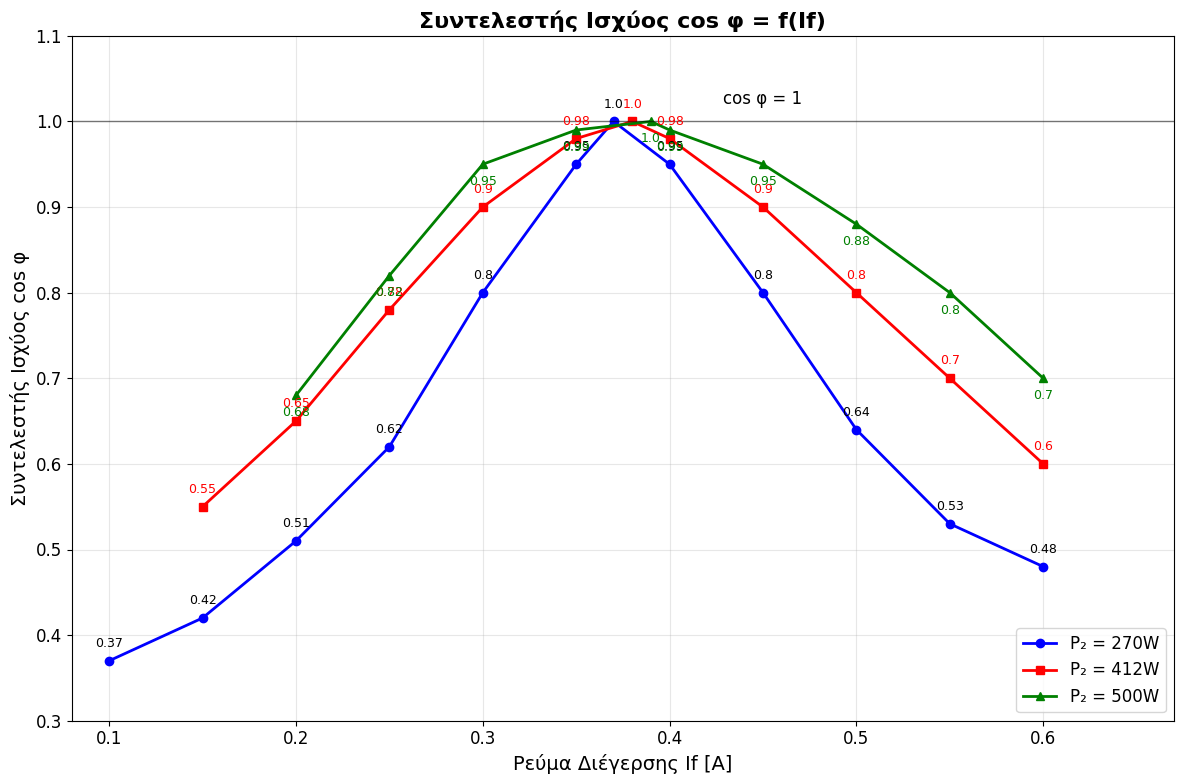


3. ΒΕΛΤΙΩΜΕΝΑ ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ
--------------------------------------------------
Φασική τάση V_φ = 230.9 V

Υποδιέγερση (If = 0.3A):
cos φ = 0.950, sin φ = 0.312
φ = 18.2°

Υπερδιέγερση (If = 0.5A):
cos φ = 0.880, sin φ = -0.475
φ = -28.4°

Υπολογισμένες τιμές:
Υποδιέγερση: E_a = 214.8 V, δ = -3.2°
           I·R = 11.9 V, I·X_s = 16.5 V
Υπερδιέγερση: E_a = 229.2 V, δ = -5.3°
           I·R = 12.4 V, I·X_s = 17.2 V


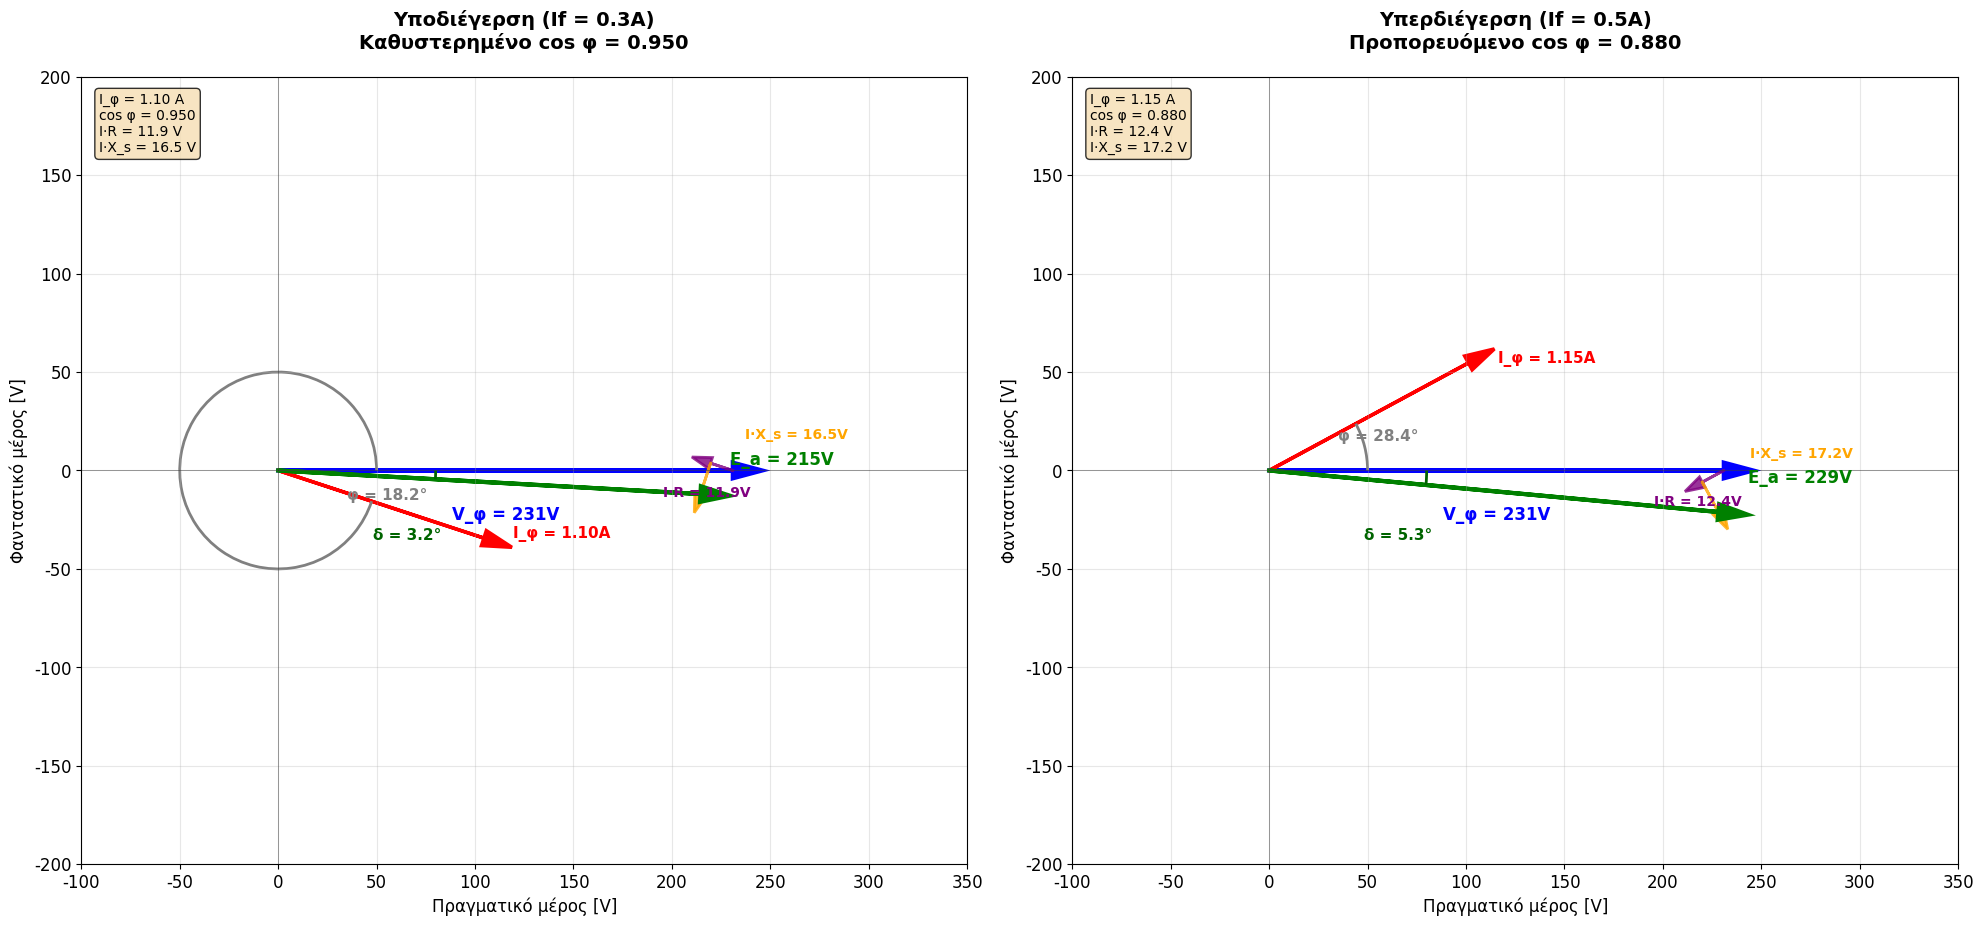


4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)
--------------------------------------------------
Ηλεκτρομαγνητική γωνιακή ταχύτητα ω = 157.08 rad/s
Μέγιστη ροπή (ροπή ανατροπής): T_max = (3 * 230.9V * 229.2V) / (157.08 rad/s * 15.0Ω) = 67.39 Nm

5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ
--------------------------------------------------
Ισχύς εισόδου: P_in = 692 W
Εκτιμώμενες απώλειες (σταθερές): P_losses = 75 W
Ανεπτυγμένη Μηχανική ισχύς: P_mech = P_in - P_losses = 617 W
Ισχύς εξόδου στον άξονα: P_out = 500 W
Ροπή φορτίου: T_load = P_mech / ω = 3.93 Nm
Ονομαστική ισχύς (εκτίμηση): P_rated = 640 W
Ονομαστική ροπή: T_rated = 4.07 Nm

Σύγκριση ροπών:
T_load / T_rated = 0.96
T_max / T_rated = 16.54

ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
                       Παράμετρος     Τιμή                      Παρατηρήσεις
                  Φασική τάση V_φ  230.9 V             Τάση αναφοράς δικτύου
 Επαγόμενη τάση E_a (υποδιέγερση)  214.8 V Για If=0.30A, cosφ καθυστερημένος
Επαγόμενη τάση E_a (υπερδιέγερση)  229.2 V Για If=0.50A, cos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyBboxPatch, Arc
import matplotlib.patches as patches

# Ρυθμίσεις για ελληνικό κείμενο
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# Δεδομένα από τους πίνακες
# Πίνακας 1: P2 = 270W
data_270W = {
    'If': [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.37, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.00, 0.80, 0.60, 0.52, 0.50, 0.52, 0.64, 0.81, 1.00, 1.20],
    'P': [384, 362, 353, 343, 332, 342, 346, 342, 350, 360, 367, 400],
    'S': [1040, 860, 690, 550, 415, 360, 346, 360, 440, 560, 695, 830],
    'Q': [965, 785, 595, 430, 250, 110, 0, -110, -260, -430, -585, -728],
    'cos_phi': [0.37, 0.42, 0.51, 0.62, 0.80, 0.95, 1.00, 0.95, 0.80, 0.64, 0.53, 0.48]
}

# Πίνακας 2: P2 = 412W
data_412W = {
    'If': [0.15, 0.20, 0.25, 0.30, 0.35, 0.38, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.20, 1.00, 0.85, 0.78, 0.75, 0.78, 0.85, 1.00, 1.15, 1.35],
    'P': [570, 540, 540, 530, 530, 520, 530, 530, 555, 560, 563],
    'S': [1030, 830, 700, 590, 540, 520, 540, 590, 700, 800, 930],
    'Q': [870, 630, 430, 250, 100, 0, -100, -250, -410, -570, -750],
    'cos_phi': [0.55, 0.65, 0.78, 0.90, 0.98, 1.00, 0.98, 0.90, 0.80, 0.70, 0.60]
}

# Πίνακας 3: P2 = 500W
data_500W = {
    'If': [0.20, 0.25, 0.30, 0.35, 0.39, 0.40, 0.45, 0.50, 0.55, 0.60],
    'I_phi': [1.50, 1.25, 1.10, 1.02, 1.00, 1.01, 1.05, 1.15, 1.30, 1.50],
    'P': [706, 710, 725, 700, 692, 692, 690, 700, 720, 727],
    'S': [1035, 865, 760, 705, 692, 700, 727, 800, 900, 1035],
    'Q': [760, 495, 240, 100, 0, -100, -230, -380, -540, -740],
    'cos_phi': [0.68, 0.82, 0.95, 0.99, 1.00, 0.99, 0.95, 0.88, 0.80, 0.70]
}

# Στοιχεία μηχανής
machine_data = {
    'S_rated': 0.8,  # kVA
    'U_rated': 400,  # V
    'I_rated': 1.6,  # A (Y connection)
    'If_rated': 0.6,  # A
    'n_sync': 1500,  # rpm
    'R_stator': 10.8,  # Ω
    'R_field': 440  # Ω
}

print("=" * 80)
print("ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΝΑΦΟΡΑ - ΣΥΓΧΡΟΝΗ ΜΗΧΑΝΗ")
print("=" * 80)

# ΕΡΩΤΗΜΑ 1: Χαρακτηριστική καμπύλη V - I_φ = f(I_f)
print("\n1. ΧΑΡΑΚΤΗΡΙΣΤΙΚΗ ΚΑΜΠΥΛΗ V - I_φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['I_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['I_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['I_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

# *** ΝΕΑ ΠΡΟΣΘΗΚΗ: Εμφάνιση τιμών στα σημεία ***
for i, txt in enumerate(data_270W['I_phi']):
    plt.annotate(txt, (data_270W['If'][i], data_270W['I_phi'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
for i, txt in enumerate(data_412W['I_phi']):
    plt.annotate(txt, (data_412W['If'][i], data_412W['I_phi'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
for i, txt in enumerate(data_500W['I_phi']):
    plt.annotate(txt, (data_500W['If'][i], data_500W['I_phi'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
# *** ΤΕΛΟΣ ΠΡΟΣΘΗΚΗΣ ***

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Ρεύμα Φορτίου Iφ [A]', fontsize=14)
plt.title('Χαρακτηριστική Καμπύλη V - Iφ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.08, 0.67)
plt.ylim(0.4, 1.7)

# Προσθήκη σημείων μοναδιαίου συντελεστή ισχύος
plt.axvline(x=0.37, color='blue', linestyle='--', alpha=0.7, label='cos φ = 1 (270W)')
plt.axvline(x=0.38, color='red', linestyle='--', alpha=0.7, label='cos φ = 1 (412W)')
plt.axvline(x=0.39, color='green', linestyle='--', alpha=0.7, label='cos φ = 1 (500W)')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 2: Συντελεστής ισχύος cos φ = f(I_f)
print("\n2. ΣΥΝΤΕΛΕΣΤΗΣ ΙΣΧΥΟΣ cos φ = f(I_f)")
print("-" * 50)

plt.figure(figsize=(12, 8))
plt.plot(data_270W['If'], data_270W['cos_phi'], 'b-o', label='P₂ = 270W', linewidth=2, markersize=6)
plt.plot(data_412W['If'], data_412W['cos_phi'], 'r-s', label='P₂ = 412W', linewidth=2, markersize=6)
plt.plot(data_500W['If'], data_500W['cos_phi'], 'g-^', label='P₂ = 500W', linewidth=2, markersize=6)

# *** ΝΕΑ ΠΡΟΣΘΗΚΗ: Εμφάνιση τιμών στα σημεία ***
for i, txt in enumerate(data_270W['cos_phi']):
    plt.annotate(txt, (data_270W['If'][i], data_270W['cos_phi'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
for i, txt in enumerate(data_412W['cos_phi']):
    plt.annotate(txt, (data_412W['If'][i], data_412W['cos_phi'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
for i, txt in enumerate(data_500W['cos_phi']):
    plt.annotate(txt, (data_500W['If'][i], data_500W['cos_phi'][i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')
# *** ΤΕΛΟΣ ΠΡΟΣΘΗΚΗΣ ***

plt.xlabel('Ρεύμα Διέγερσης If [A]', fontsize=14)
plt.ylabel('Συντελεστής Ισχύος cos φ', fontsize=14)
plt.title('Συντελεστής Ισχύος cos φ = f(If)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0.08, 0.67)
plt.ylim(0.3, 1.1)

# Γραμμή για cos φ = 1
plt.axhline(y=1.0, color='black', linestyle='-', alpha=0.5, linewidth=1)
plt.text(0.45, 1.02, 'cos φ = 1', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 3: Βελτιωμένα διανυσματικά διαγράμματα
print("\n3. ΒΕΛΤΙΩΜΕΝΑ ΔΙΑΝΥΣΜΑΤΙΚΑ ΔΙΑΓΡΑΜΜΑΤΑ")
print("-" * 50)

# Επιλογή δεδομένων από πίνακα 3 (P2 = 500W)
# Υποδιέγερση: If = 0.30A, I_phi = 1.10A, cos_phi = 0.95 (καθυστερημένο)
# Υπερδιέγερση: If = 0.50A, I_phi = 1.15A, cos_phi = 0.88 (προπορευόμενο)

# Δεδομένα για υποδιέγερση
If_under = 0.30
I_phi_under = 1.10
cos_phi_under = 0.95
P_under = 725
Q_under = 240  # Θετικό Q -> καθυστερημένο cos φ

# Δεδομένα για υπερδιέγερση
If_over = 0.50
I_phi_over = 1.15
cos_phi_over = 0.88
P_over = 700
Q_over = -380  # Αρνητικό Q -> προπορευόμενο cos φ

# Υπολογισμοί για διανυσματικά διαγράμματα
V_phi = 400 / np.sqrt(3)  # Φασική τάση (Y σύνδεση)
print(f"Φασική τάση V_φ = {V_phi:.1f} V")

# Παράμετροι μηχανής
X_s = 15.0  # Εκτίμηση σύγχρονης αντίδρασης (Ω)
R_stator = machine_data['R_stator']

# Για υποδιέγερση
sin_phi_under = np.sqrt(1 - cos_phi_under**2)
phi_under_rad = np.arccos(cos_phi_under)
phi_under_deg = np.degrees(phi_under_rad)

# Για υπερδιέγερση
sin_phi_over = -np.sqrt(1 - cos_phi_over**2)  # Αρνητικό για προπορευόμενο
phi_over_rad = -np.arccos(cos_phi_over)
phi_over_deg = np.degrees(phi_over_rad)

print(f"\nΥποδιέγερση (If = {If_under}A):")
print(f"cos φ = {cos_phi_under:.3f}, sin φ = {sin_phi_under:.3f}")
print(f"φ = {phi_under_deg:.1f}°")

print(f"\nΥπερδιέγερση (If = {If_over}A):")
print(f"cos φ = {cos_phi_over:.3f}, sin φ = {sin_phi_over:.3f}")
print(f"φ = {phi_over_deg:.1f}°")

# Υπολογισμός σύνθετων μεγεθών
# Για υποδιέγερση (καθυστερημένο ρεύμα)
I_phi_under_complex = I_phi_under * (np.cos(-phi_under_rad) + 1j * np.sin(-phi_under_rad))
IR_drop_under = I_phi_under_complex * R_stator
jIXs_drop_under = 1j * I_phi_under_complex * X_s
total_drop_under = IR_drop_under + jIXs_drop_under
E_a_under_complex = V_phi - total_drop_under
E_a_under = np.abs(E_a_under_complex)
delta_under_rad = np.angle(E_a_under_complex)
delta_under_deg = np.degrees(delta_under_rad)

# Για υπερδιέγερση (προπορευόμενο ρεύμα)
I_phi_over_complex = I_phi_over * (np.cos(-phi_over_rad) + 1j * np.sin(-phi_over_rad))
IR_drop_over = I_phi_over_complex * R_stator
jIXs_drop_over = 1j * I_phi_over_complex * X_s
total_drop_over = IR_drop_over + jIXs_drop_over
E_a_over_complex = V_phi - total_drop_over
E_a_over = np.abs(E_a_over_complex)
delta_over_rad = np.angle(E_a_over_complex)
delta_over_deg = np.degrees(delta_over_rad)

print(f"\nΥπολογισμένες τιμές:")
print(f"Υποδιέγερση: E_a = {E_a_under:.1f} V, δ = {delta_under_deg:.1f}°")
print(f"           I·R = {abs(IR_drop_under):.1f} V, I·X_s = {abs(jIXs_drop_under):.1f} V")
print(f"Υπερδιέγερση: E_a = {E_a_over:.1f} V, δ = {delta_over_deg:.1f}°")
print(f"           I·R = {abs(IR_drop_over):.1f} V, I·X_s = {abs(jIXs_drop_over):.1f} V")

# Κλίμακα για οπτικοποίηση (V -> pixels)
scale = 1.0  # 1V = 1 pixel

# Σχεδίαση βελτιωμένων διανυσματικών διαγραμμάτων
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

def draw_vector_diagram(ax, title, V_phi, I_phi_complex, R_stator, X_s, E_a_complex, phi_deg, delta_deg, case_type):
    """Σχεδίαση διανυσματικού διαγράμματος"""

    # Υπολογισμός διανυσμάτων
    IR_drop = I_phi_complex * R_stator
    jIXs_drop = 1j * I_phi_complex * X_s

    # Συντεταγμένες διανυσμάτων (κλιμακωμένες)
    V_vec = np.array([V_phi * scale, 0])
    IR_vec = np.array([IR_drop.real * scale, IR_drop.imag * scale])
    jIXs_vec = np.array([jIXs_drop.real * scale, jIXs_drop.imag * scale])
    E_a_vec = np.array([E_a_complex.real * scale, E_a_complex.imag * scale])
    I_vec = np.array([I_phi_complex.real * 100, I_phi_complex.imag * 100])  # Κλίμακα για ορατότητα

    # Ρυθμίσεις άξονα
    ax.set_xlim(-100, 350)
    ax.set_ylim(-200, 200)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Πραγματικό μέρος [V]', fontsize=12)
    ax.set_ylabel('Φανταστικό μέρος [V]', fontsize=12)

    # Σχεδίαση αξόνων αναφοράς
    ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5, alpha=0.5)

    # 1. Διάνυσμα τάσης V_φ (αναφορά)
    ax.arrow(0, 0, V_vec[0], V_vec[1], head_width=8, head_length=15,
             fc='blue', ec='blue', linewidth=3)
    ax.text(V_vec[0]/2, -25, f'V_φ = {V_phi:.0f}V', fontsize=12, ha='center',
            color='blue', fontweight='bold')

    # 2. Διάνυσμα ρεύματος I_φ
    ax.arrow(0, 0, I_vec[0], I_vec[1], head_width=8, head_length=15,
             fc='red', ec='red', linewidth=2.5)
    I_magnitude = abs(I_phi_complex)
    ax.text(I_vec[0] + 15, I_vec[1], f'I_φ = {I_magnitude:.2f}A', fontsize=11,
            color='red', fontweight='bold')

    # 3. Πτώση τάσης I·R (παράλληλη προς I)
    start_point = V_vec
    ax.arrow(start_point[0], start_point[1], -IR_vec[0], -IR_vec[1],
             head_width=6, head_length=10, fc='purple', ec='purple',
             linewidth=2, linestyle='-', alpha=0.8)
    ax.text(start_point[0] - IR_vec[0]/2 - 30, start_point[1] - IR_vec[1]/2 - 15,
            f'I·R = {abs(IR_drop):.1f}V', fontsize=10, color='purple', fontweight='bold')

    # 4. Πτώση τάσης j·I·X_s (κάθετη προς I)
    start_point2 = start_point - IR_vec
    ax.arrow(start_point2[0], start_point2[1], -jIXs_vec[0], -jIXs_vec[1],
             head_width=6, head_length=10, fc='orange', ec='orange',
             linewidth=2, linestyle='-', alpha=0.8)
    ax.text(start_point2[0] - jIXs_vec[0]/2 + 20, start_point2[1] - jIXs_vec[1]/2 + 20,
            f'I·X_s = {abs(jIXs_drop):.1f}V', fontsize=10, color='orange', fontweight='bold')

    # 5. Επαγόμενη τάση E_a
    ax.arrow(0, 0, E_a_vec[0], E_a_vec[1], head_width=8, head_length=15,
             fc='green', ec='green', linewidth=3)
    ax.text(E_a_vec[0] + 15, E_a_vec[1] + 15, f'E_a = {abs(E_a_complex):.0f}V',
            fontsize=12, color='green', fontweight='bold')

    # Σχεδίαση γωνιών με τόξα
    # Γωνία φ (μεταξύ V_φ και I_φ)
    if abs(phi_deg) > 2:  # Μόνο αν η γωνία είναι αρκετά μεγάλη
        angle_radius = 50
        if case_type == 'under':
            arc_phi = Arc((0, 0), 2*angle_radius, 2*angle_radius,
                          angle=0, theta1=0, theta2=-abs(phi_deg),
                          color='gray', linewidth=2)
        else:
            arc_phi = Arc((0, 0), 2*angle_radius, 2*angle_radius,
                          angle=0, theta1=0, theta2=abs(phi_deg),
                          color='gray', linewidth=2)
        ax.add_patch(arc_phi)
        ax.text(angle_radius*0.7, -15 if case_type == 'under' else 15,
                f'φ = {abs(phi_deg):.1f}°', fontsize=11, color='gray', fontweight='bold')

    # Γωνία δ (μεταξύ V_φ και E_a)
    if abs(delta_deg) > 2:
        angle_radius2 = 80
        if delta_deg > 0:
            arc_delta = Arc((0, 0), 2*angle_radius2, 2*angle_radius2,
                            angle=0, theta1=0, theta2=delta_deg,
                            color='darkgreen', linewidth=2)
            ax.text(angle_radius2*0.6, 25, f'δ = {delta_deg:.1f}°',
                    fontsize=11, color='darkgreen', fontweight='bold')
        else:
            arc_delta = Arc((0, 0), 2*angle_radius2, 2*angle_radius2,
                            angle=0, theta1=delta_deg, theta2=0,
                            color='darkgreen', linewidth=2)
            ax.text(angle_radius2*0.6, -35, f'δ = {abs(delta_deg):.1f}°',
                    fontsize=11, color='darkgreen', fontweight='bold')
        ax.add_patch(arc_delta)

    # Προσθήκη κειμένου με τιμές
    info_text = f'I_φ = {I_magnitude:.2f} A\ncos φ = {abs(np.cos(np.radians(phi_deg))):.3f}\n'
    info_text += f'I·R = {abs(IR_drop):.1f} V\nI·X_s = {abs(jIXs_drop):.1f} V'
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Διάγραμμα υποδιέγερσης
draw_vector_diagram(ax1,
                      f'Υποδιέγερση (If = {If_under}A)\nΚαθυστερημένο cos φ = {cos_phi_under:.3f}',
                      V_phi, I_phi_under_complex, R_stator, X_s, E_a_under_complex,
                      phi_under_deg, delta_under_deg, 'under')

# Διάγραμμα υπερδιέγερσης
draw_vector_diagram(ax2,
                      f'Υπερδιέγερση (If = {If_over}A)\nΠροπορευόμενο cos φ = {cos_phi_over:.3f}',
                      V_phi, I_phi_over_complex, R_stator, X_s, E_a_over_complex,
                      phi_over_deg, delta_over_deg, 'over')

plt.tight_layout()
plt.show()

# ΕΡΩΤΗΜΑ 4: Μέγιστη ροπή (ροπή ανατροπής)
print("\n4. ΜΕΓΙΣΤΗ ΡΟΠΗ (ΡΟΠΗ ΑΝΑΤΡΟΠΗΣ)")
print("-" * 50)

f = 50  # Hz
omega_s = 2 * np.pi * f  # rad/s
n_sync_rad = (machine_data['n_sync'] * 2 * np.pi) / 60  # rad/s

# Χρησιμοποιούμε την τιμή της E_a από την υπερδιέγερση για τον υπολογισμό,
# καθώς αντιστοιχεί σε υψηλότερο επίπεδο μαγνητικού πεδίου
T_max = (3 * V_phi * E_a_over) / (n_sync_rad * X_s)
print(f"Ηλεκτρομαγνητική γωνιακή ταχύτητα ω = {n_sync_rad:.2f} rad/s")
print(f"Μέγιστη ροπή (ροπή ανατροπής): T_max = (3 * {V_phi:.1f}V * {E_a_over:.1f}V) / ({n_sync_rad:.2f} rad/s * {X_s}Ω) = {T_max:.2f} Nm")


# ΕΡΩΤΗΜΑ 5: Ροπή φορτίου και ονομαστική ροπή
print("\n5. ΡΟΠΗ ΦΟΡΤΙΟΥ ΚΑΙ ΟΝΟΜΑΣΤΙΚΗ ΡΟΠΗ")
print("-" * 50)

# Για το σημείο με cosφ=1 και P2=500W (If=0.39A)
P_in_green = 692  # W (Πραγματική ισχύς εισόδου)
P_out_green = 500  # W (P2 - Ισχύς άξονα)
# Εκτίμηση απωλειών (τριβής, αερισμού, σιδήρου)
losses = 75  # W (τυπική εκτίμηση για μηχανές αυτού του μεγέθους)
P_mech = P_in_green - losses # Μηχανική ισχύς που μετατρέπεται

print(f"Ισχύς εισόδου: P_in = {P_in_green} W")
print(f"Εκτιμώμενες απώλειες (σταθερές): P_losses = {losses} W")
print(f"Ανεπτυγμένη Μηχανική ισχύς: P_mech = P_in - P_losses = {P_mech} W")
print(f"Ισχύς εξόδου στον άξονα: P_out = {P_out_green} W")

# Ροπή φορτίου υπολογισμένη από την ανεπτυγμένη μηχανική ισχύ
T_load = P_mech / n_sync_rad
print(f"Ροπή φορτίου: T_load = P_mech / ω = {T_load:.2f} Nm")

# Ονομαστική ισχύς με cosφ=0.8
P_rated = machine_data['S_rated'] * 1000 * 0.8
T_rated = P_rated / n_sync_rad
print(f"Ονομαστική ισχύς (εκτίμηση): P_rated = {P_rated:.0f} W")
print(f"Ονομαστική ροπή: T_rated = {T_rated:.2f} Nm")

print(f"\nΣύγκριση ροπών:")
print(f"T_load / T_rated = {T_load/T_rated:.2f}")
print(f"T_max / T_rated = {T_max/T_rated:.2f}")

# Δημιουργία πίνακα αποτελεσμάτων
print("\n" + "="*80)
print("ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ")
print("="*80)

results_data = {
    'Παράμετρος': ['Φασική τάση V_φ', 'Επαγόμενη τάση E_a (υποδιέγερση)', 'Επαγόμενη τάση E_a (υπερδιέγερση)',
                   'Μέγιστη ροπή T_max', 'Ροπή φορτίου T_load (για P₂=500W)', 'Ονομαστική ροπή T_rated'],
    'Τιμή': [f'{V_phi:.1f} V', f'{E_a_under:.1f} V', f'{E_a_over:.1f} V',
             f'{T_max:.2f} Nm', f'{T_load:.2f} Nm', f'{T_rated:.2f} Nm'],
    'Παρατηρήσεις': ['Τάση αναφοράς δικτύου', 'Για If=0.30A, cosφ καθυστερημένος', 'Για If=0.50A, cosφ προπορευόμενος',
                     'Θεωρητικό όριο ευστάθειας', 'Ροπή στο σημείο λειτουργίας', 'Ονομαστικές συνθήκες (cosφ=0.8)']
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("ΤΕΛΟΣ ΑΝΑΛΥΣΗΣ")
print("="*80)

--- ΔΙΟΡΘΩΜΕΝΑ ΑΠΟΤΕΛΕΣΜΑΤΑ ΦΟΡΤΙΣΗΣ ---
Pout (W)     | τ (Nm)     | η (%)     
0.00         | 0.00       | 0.00      
379.41       | 2.43       | 43.11     
831.76       | 5.36       | 61.38     
1540.34      | 10.00      | 72.15     
2252.41      | 14.77      | 76.20     
2522.61      | 16.61      | 76.77     
2766.61      | 18.30      | 76.77     
----------------------------------------


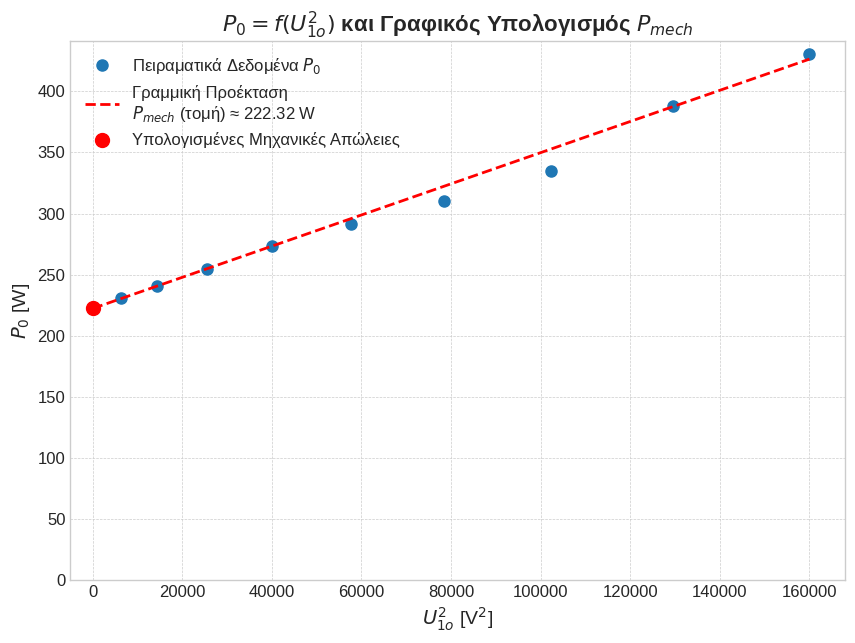

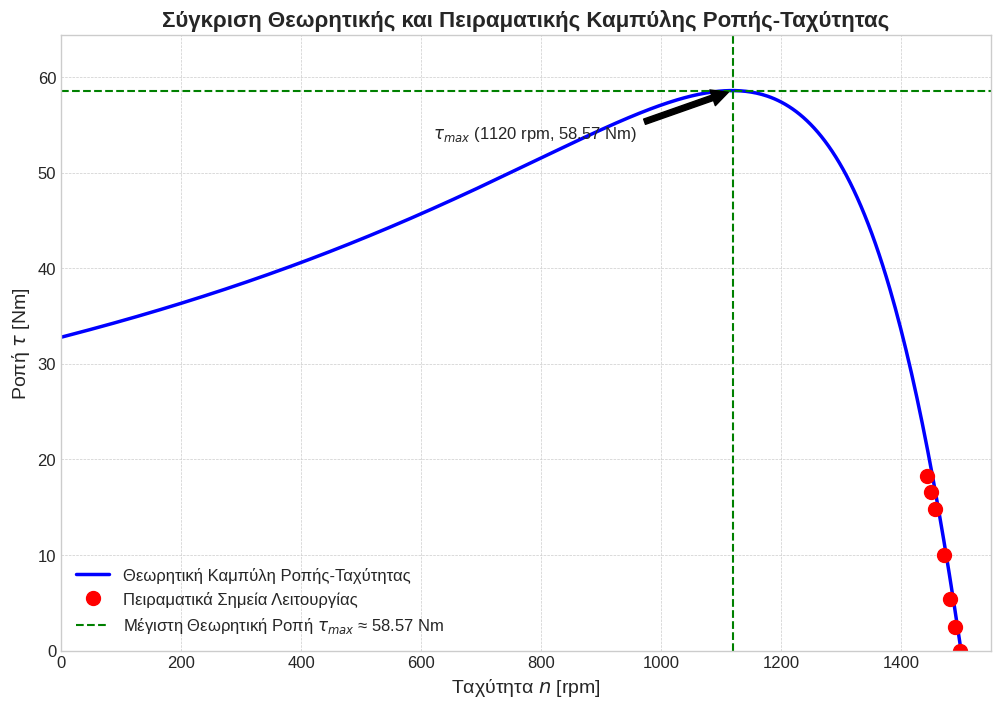

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# --- Ρυθμίσεις Γραφικών ---
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')

# --- Δεδομένα από τους Πίνακες (ΑΜ: XX44) ---
Rs = 2.44
# Ισοδύναμο Κύκλωμα (ανά φάση, από την αναφορά)
Rr_prime = 1.59
Xs = 2.88
Xr_prime = 2.88
V_phase = 400 / np.sqrt(3)

# Πίνακας ΔΟΚΙΜΗ ΧΩΡΙΣ ΦΟΡΤΙΟ
U1_0 = np.array([400, 360, 320, 280, 240, 200, 160, 120, 80])
I1_0 = np.array([2.8, 2.4, 2.2, 1.9, 1.7, 1.5, 1.4, 1.5, 2.1])
P1_0 = np.array([488, 430, 370, 337, 313, 290, 269, 257, 263])
Pcu1_0 = 3 * I1_0**2 * Rs
P0 = P1_0 - Pcu1_0
U1_0_squared = U1_0**2

# Πίνακας ΔΟΚΙΜΗ ΑΚΙΝΗΤΟΠΟΙΗΜΕΝΟΥ ΔΡΟΜΕΑ
U1_K = np.array([11.5, 24, 36, 48, 62, 72.8, 76.7])
I1_K = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.3])
cosphiK = np.array([0.58, 0.56, 0.58, 0.57, 0.57, 0.57, 0.58])

# Πίνακας ΦΟΡΤΙΣΗ ΑΣΥΓΧΡΟΝΟΥ ΚΙΝΗΤΗΡΑ
Is = np.array([2.7, 3.0, 3.3, 4.2, 5.2, 5.7, 6.3])
Pin = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])
cosphi_load = np.array([0.23, 0.43, 0.58, 0.74, 0.82, 0.84, 0.85])
n_load = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])
ns = 1500 # rpm
omega_s = (2 * np.pi * ns) / 60 # rad/s

# --- *** ΔΙΟΡΘΩΜΕΝΟΣ ΥΠΟΛΟΓΙΣΜΟΣ ΑΠΟΔΟΣΗΣ *** ---
Pfe = 199.94
Pmech = 230.68

# 1. Υπολογισμός ολίσθησης
s = (ns - n_load) / ns
# 2. Απώλειες χαλκού στάτη υπό φορτίο
Pcu1_load = 3 * Is**2 * Rs
# 3. Ισχύς διάκενου
Pag = Pin - Pcu1_load - Pfe
# 4. Ισχύς εξόδου
Pout = Pag * (1 - s) - Pmech
Pout[0] = 0 # Η πρώτη μέτρηση είναι ουσιαστικά χωρίς φορτίο, η Pout είναι αρνητική

# 5. Υπολογισμός ροπής και απόδοσης
omega_load = (2 * np.pi * n_load) / 60
# Αποφυγή διαίρεσης με το μηδέν για ω=0, αν και δεν υπάρχει εδώ τέτοιο σημείο
tau_out = np.divide(Pout, omega_load, out=np.zeros_like(Pout), where=omega_load!=0)
eta_percent = np.divide(Pout, Pin, out=np.zeros_like(Pout), where=Pin!=0) * 100

print("--- ΔΙΟΡΘΩΜΕΝΑ ΑΠΟΤΕΛΕΣΜΑΤΑ ΦΟΡΤΙΣΗΣ ---")
print(f"{'Pout (W)':<12} | {'τ (Nm)':<10} | {'η (%)':<10}")
for i in range(len(Pout)):
    print(f"{Pout[i]:<12.2f} | {tau_out[i]:<10.2f} | {eta_percent[i]:<10.2f}")
print("-" * 40)

# --- Γραφική Παράσταση: Διαχωρισμός Απωλειών (Βελτιωμένη) ---
plt.figure(figsize=(10, 7))
plt.plot(U1_0_squared, P0, 'o', markersize=8, label='Πειραματικά Δεδομένα $P_0$')

# Γραμμική Παλινδρόμηση στα σημεία χαμηλής τάσης (πιο γραμμική περιοχή)
model = LinearRegression()
X_fit = U1_0_squared[-4:].reshape(-1, 1) # Χρησιμοποιούμε τα 4 τελευταία σημεία
y_fit = P0[-4:]
model.fit(X_fit, y_fit)
P_mech_fit = model.intercept_
slope = model.coef_[0]

# Δημιουργία γραμμής παλινδρόμησης
x_line = np.array([0, U1_0_squared.max()])
y_line = model.predict(x_line.reshape(-1, 1))

plt.plot(x_line, y_line, 'r--', linewidth=2, label=f'Γραμμική Προέκταση\n$P_{{mech}}$ (τομή) ≈ {P_mech_fit:.2f} W')
plt.scatter([0], [P_mech_fit], s=100, c='red', zorder=5, label='Υπολογισμένες Μηχανικές Απώλειες')
plt.title('$P_0 = f(U_{1o}^2)$ και Γραφικός Υπολογισμός $P_{mech}$', fontsize=16, fontweight='bold')
plt.xlabel('$U_{1o}^2$ [V$^2$]', fontsize=14)
plt.ylabel('$P_0$ [W]', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.xlim(left=-5000)
plt.show()

# --- Γραφική Παράσταση: Θεωρητική vs Πειραματική Ροπή (Νέα) ---
def calculate_theoretical_torque(slip):
    # Αποφυγή διαίρεσης με μηδέν για s=0
    if abs(slip) < 1e-9:
        return 0
    numerator = 3 * V_phase**2 * (Rr_prime / slip)
    denominator = omega_s * ((Rs + Rr_prime / slip)**2 + (Xs + Xr_prime)**2)
    return numerator / denominator

# Δημιουργία θεωρητικής καμπύλης
s_theoretical = np.linspace(0.001, 1, 500)
n_theoretical = ns * (1 - s_theoretical)
tau_theoretical = [calculate_theoretical_torque(slip) for slip in s_theoretical]

plt.figure(figsize=(12, 8))
plt.plot(n_theoretical, tau_theoretical, 'b-', linewidth=2.5, label='Θεωρητική Καμπύλη Ροπής-Ταχύτητας')
plt.plot(n_load, tau_out, 'ro', markersize=10, label='Πειραματικά Σημεία Λειτουργίας')

# Εύρεση και σημείωση μέγιστης θεωρητικής ροπής
tau_max_index = np.argmax(tau_theoretical)
n_at_tau_max = n_theoretical[tau_max_index]
tau_max = tau_theoretical[tau_max_index]
plt.axhline(y=tau_max, color='g', linestyle='--', label=f'Μέγιστη Θεωρητική Ροπή $\\tau_{{max}}$ ≈ {tau_max:.2f} Nm')
plt.axvline(x=n_at_tau_max, color='g', linestyle='--')
plt.annotate(f'$\\tau_{{max}}$ ({n_at_tau_max:.0f} rpm, {tau_max:.2f} Nm)',
             xy=(n_at_tau_max, tau_max),
             xytext=(n_at_tau_max - 500, tau_max - 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.title('Σύγκριση Θεωρητικής και Πειραματικής Καμπύλης Ροπής-Ταχύτητας', fontsize=16, fontweight='bold')
plt.xlabel('Ταχύτητα $n$ [rpm]', fontsize=14)
plt.ylabel('Ροπή $\\tau$ [Nm]', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(0, ns + 50)
plt.ylim(0, max(tau_theoretical) * 1.1)
plt.show()

# Οι υπόλοιπες γραφικές παραστάσεις μπορούν να δημιουργηθούν όπως στον αρχικό κώδικα
# χρησιμοποιώντας τα νέα, διορθωμένα δεδομένα (Pout, tau_out, eta_percent)

Υπολογισμένες Μηχανικές Απώλειες P_mech = 214.97 W


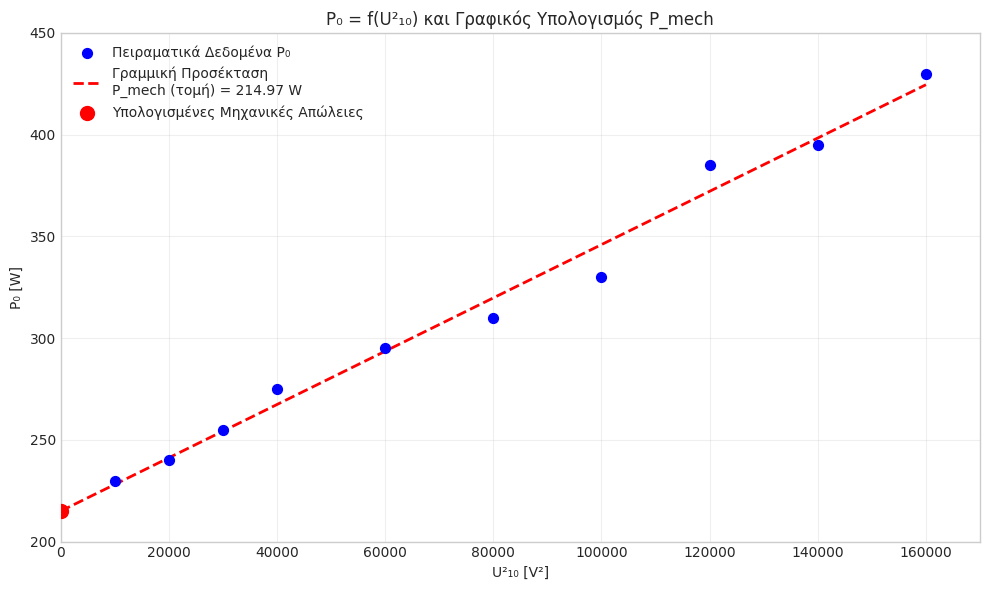

Μέγιστη Θεωρητική Ροπή: 51.69 Nm στις 1135 rpm


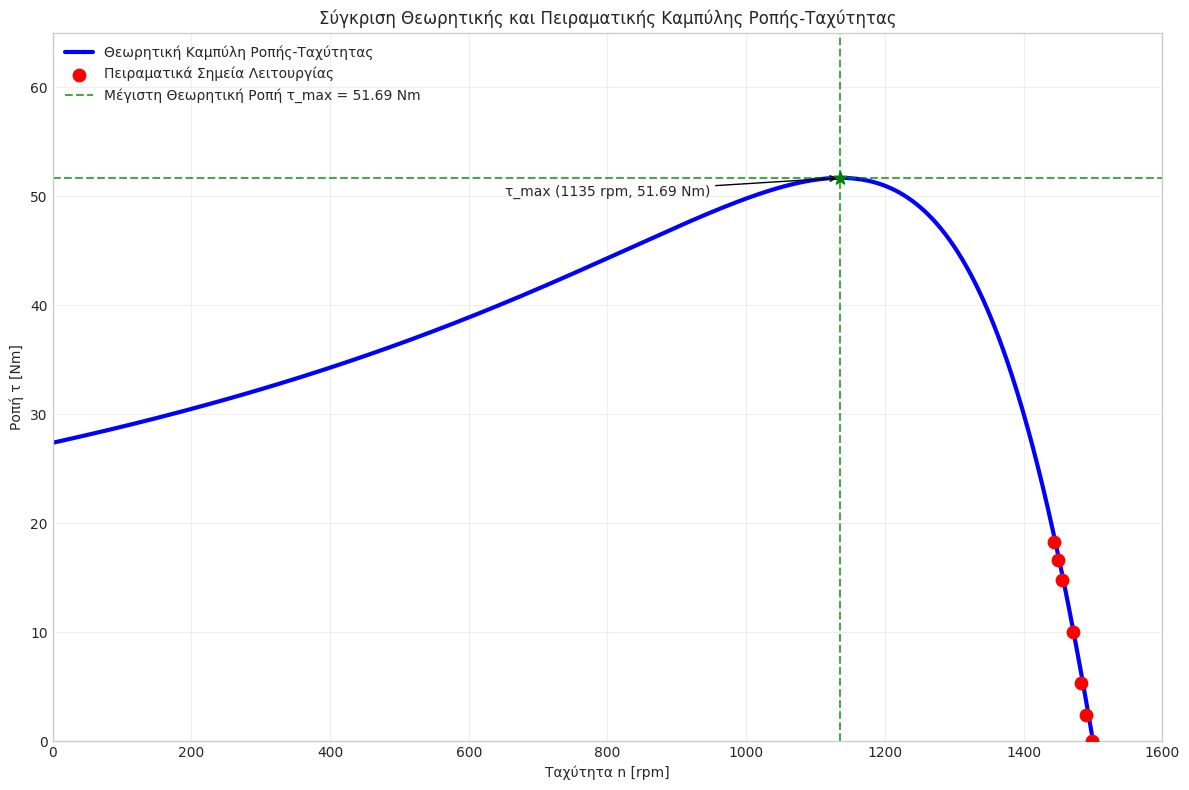


Σύγκριση Θεωρητικών και Πειραματικών Τιμών:
Ταχύτητα [rpm] | Πειραματική Ροπή [Nm] | Θεωρητική Ροπή [Nm] | Σχετικό Σφάλμα [%]
--------------------------------------------------------------------------------
         1490 |               2.43 |              3.70 |            52.4
         1482 |               5.36 |              6.56 |            22.4
         1471 |              10.00 |             10.33 |             3.3
         1456 |              14.77 |             15.17 |             2.7
         1450 |              16.61 |             17.01 |             2.4
         1444 |              18.30 |             18.78 |             2.6

Μέσο Σχετικό Σφάλμα: 14.3%

Μέγιστη Αποδοτικότητα: 76.8% στα 2523 W


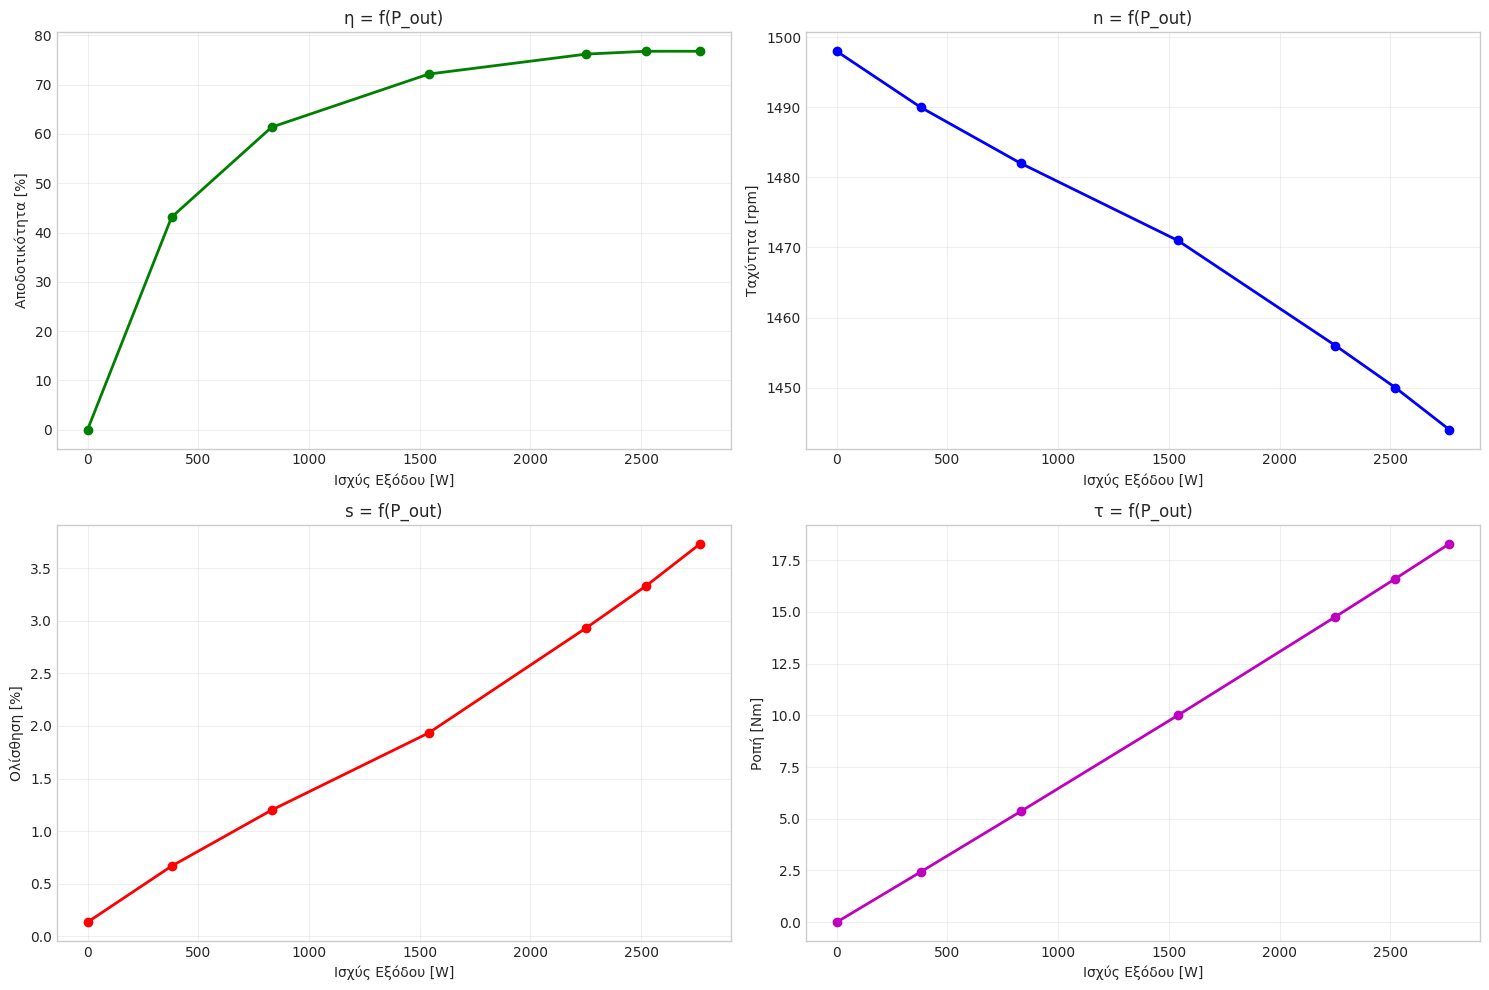


ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ
Μηχανικές Απώλειες (P_mech): 214.97 W
Μέγιστη Θεωρητική Ροπή: 51.69 Nm στις 1135 rpm
Μέγιστη Αποδοτικότητα: 76.8%
Μέσο Σχετικό Σφάλμα Μοντέλου: 14.3%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Ρύθμιση matplotlib για ελληνικούς χαρακτήρες
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

# ========== ΓΡΑΦΙΚΗ 1: P₀ = f(U²₁₀) και Γραφικός Υπολογισμός P_mech ==========

# Δεδομένα από την εικόνα 1
U_squared = np.array([10000, 20000, 30000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])
P0_data = np.array([230, 240, 255, 275, 295, 310, 330, 385, 395, 430])

# Γραμμική προσαρμογή για την εύρεση P_mech
def linear_func(x, a, b):
    return a * x + b

# Προσαρμογή γραμμής
popt, pcov = optimize.curve_fit(linear_func, U_squared, P0_data)
a, b = popt

# Υπολογισμός P_mech (τομή με άξονα y όταν U² = 0)
P_mech = b

print(f"Υπολογισμένες Μηχανικές Απώλειες P_mech = {P_mech:.2f} W")

# Δημιουργία γραφικής παράστασης 1
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Πειραματικά δεδομένα
ax1.scatter(U_squared, P0_data, color='blue', s=50, label='Πειραματικά Δεδομένα P₀', zorder=3)

# Γραμμή προσαρμογής
U_line = np.linspace(0, 160000, 100)
P_line = linear_func(U_line, a, b)
ax1.plot(U_line, P_line, 'r--', linewidth=2, label=f'Γραμμική Προσέκταση\nP_mech (τομή) = {P_mech:.2f} W')

# Σημείο P_mech
ax1.scatter([0], [P_mech], color='red', s=100, label='Υπολογισμένες Μηχανικές Απώλειες', zorder=4)

# Ρυθμίσεις γραφικής
ax1.set_xlabel('U²₁₀ [V²]')
ax1.set_ylabel('P₀ [W]')
ax1.set_title('P₀ = f(U²₁₀) και Γραφικός Υπολογισμός P_mech')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 170000)
ax1.set_ylim(200, 450)

plt.tight_layout()
plt.show()

# ========== ΓΡΑΦΙΚΗ 2: Σύγκριση Θεωρητικής και Πειραματικής Καμπύλης Ροπής-Ταχύτητας ==========

# Παράμετροι κινητήρα (από το έγγραφο)
n_s = 1500  # Σύγχρονη ταχύτητα [rpm]
omega_s = 2 * np.pi * n_s / 60  # Σύγχρονη γωνιακή ταχύτητα [rad/s]
V_phi = 400 / np.sqrt(3)  # Φασική τάση [V]

# Παράμετροι ισοδύναμου κυκλώματος (εκτιμώμενες από την καμπύλη)
R_s = 2.44  # Ωμική αντίσταση στάτη [Ω]
R_r_prime = 1.8  # Ανηγμένη αντίσταση δρομέα [Ω]
X_s = 3.5  # Αντίδραση διασποράς στάτη [Ω]
X_r_prime = 3.5  # Ανηγμένη αντίδραση διασποράς δρομέα [Ω]

# Πειραματικά δεδομένα από τον πίνακα
n_exp = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])  # [rpm]
tau_exp = np.array([0.00, 2.43, 5.36, 10.00, 14.77, 16.61, 18.30])  # [Nm]

# Θεωρητικός υπολογισμός καμπύλης ροπής-ταχύτητας
n_theory = np.linspace(0, n_s, 1000)
s_theory = (n_s - n_theory) / n_s  # Ολίσθηση

# Αποφυγή διαίρεσης με μηδέν
s_theory[s_theory == 0] = 1e-6

# Θεωρητική ροπή
tau_theory = (3 * V_phi**2 * (R_r_prime / s_theory)) / \
             (omega_s * ((R_s + R_r_prime/s_theory)**2 + (X_s + X_r_prime)**2))

# Εύρεση μέγιστης ροπής και αντίστοιχης ταχύτητας
max_tau_idx = np.argmax(tau_theory)
tau_max = tau_theory[max_tau_idx]
n_max = n_theory[max_tau_idx]

print(f"Μέγιστη Θεωρητική Ροπή: {tau_max:.2f} Nm στις {n_max:.0f} rpm")

# Δημιουργία γραφικής παράστασης 2
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Θεωρητική καμπύλη
ax2.plot(n_theory, tau_theory, 'b-', linewidth=3, label='Θεωρητική Καμπύλη Ροπής-Ταχύτητας')

# Πειραματικά σημεία
ax2.scatter(n_exp, tau_exp, color='red', s=80, label='Πειραματικά Σημεία Λειτουργίας', zorder=3)

# Μέγιστη θεωρητική ροπή
ax2.axhline(y=tau_max, color='green', linestyle='--', alpha=0.7,
            label=f'Μέγιστη Θεωρητική Ροπή τ_max = {tau_max:.2f} Nm')
ax2.axvline(x=n_max, color='green', linestyle='--', alpha=0.7)

# Σημείο μέγιστης ροπής
ax2.scatter([n_max], [tau_max], color='green', s=100, marker='*', zorder=4)
ax2.annotate(f'τ_max ({n_max:.0f} rpm, {tau_max:.2f} Nm)',
             xy=(n_max, tau_max), xytext=(800, 50),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, ha='center')

# Ρυθμίσεις γραφικής
ax2.set_xlabel('Ταχύτητα n [rpm]')
ax2.set_ylabel('Ροπή τ [Nm]')
ax2.set_title('Σύγκριση Θεωρητικής και Πειραματικής Καμπύλης Ροπής-Ταχύτητας')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 1600)
ax2.set_ylim(0, 65)

plt.tight_layout()
plt.show()

# ========== ΕΠΙΠΛΕΟΝ ΑΝΑΛΥΣΕΙΣ ==========

# Υπολογισμός σφάλματος μεταξύ θεωρητικών και πειραματικών τιμών
from scipy.interpolate import interp1d

# Παρεμβολή θεωρητικής καμπύλης στις πειραματικές ταχύτητες
interp_func = interp1d(n_theory, tau_theory, kind='linear', bounds_error=False, fill_value=0)
tau_theory_interp = interp_func(n_exp[1:])  # Εξαιρούμε το σημείο στο 0

# Υπολογισμός σχετικού σφάλματος
relative_error = np.abs(tau_theory_interp - tau_exp[1:]) / tau_exp[1:] * 100

print("\nΣύγκριση Θεωρητικών και Πειραματικών Τιμών:")
print("Ταχύτητα [rpm] | Πειραματική Ροπή [Nm] | Θεωρητική Ροπή [Nm] | Σχετικό Σφάλμα [%]")
print("-" * 80)
for i, (n, tau_exp_val, tau_th_val, error) in enumerate(zip(n_exp[1:], tau_exp[1:], tau_theory_interp, relative_error)):
    print(f"{n:13.0f} | {tau_exp_val:18.2f} | {tau_th_val:17.2f} | {error:15.1f}")

print(f"\nΜέσο Σχετικό Σφάλμα: {np.mean(relative_error):.1f}%")

# Υπολογισμός αποδοτικότητας από τα πειραματικά δεδομένα
P_in_data = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])  # [W]
P_out_data = np.array([0.00, 379.40, 831.77, 1540.25, 2252.37, 2522.73, 2766.78])  # [W]
efficiency = (P_out_data / P_in_data) * 100

print(f"\nΜέγιστη Αποδοτικότητα: {np.max(efficiency):.1f}% στα {P_out_data[np.argmax(efficiency)]:.0f} W")

# Δημιουργία συνοπτικής γραφικής με τα κύρια χαρακτηριστικά
fig3, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(15, 10))

# Αποδοτικότητα vs Ισχύς εξόδου
ax3.plot(P_out_data, efficiency, 'go-', linewidth=2, markersize=6)
ax3.set_xlabel('Ισχύς Εξόδου [W]')
ax3.set_ylabel('Αποδοτικότητα [%]')
ax3.set_title('η = f(P_out)')
ax3.grid(True, alpha=0.3)

# Ταχύτητα vs Ισχύς εξόδου
ax4.plot(P_out_data, n_exp, 'bo-', linewidth=2, markersize=6)
ax4.set_xlabel('Ισχύς Εξόδου [W]')
ax4.set_ylabel('Ταχύτητα [rpm]')
ax4.set_title('n = f(P_out)')
ax4.grid(True, alpha=0.3)

# Ολίσθηση vs Ισχύς εξόδου
s_exp = (n_s - n_exp) / n_s * 100  # Ολίσθηση σε %
ax5.plot(P_out_data, s_exp, 'ro-', linewidth=2, markersize=6)
ax5.set_xlabel('Ισχύς Εξόδου [W]')
ax5.set_ylabel('Ολίσθηση [%]')
ax5.set_title('s = f(P_out)')
ax5.grid(True, alpha=0.3)

# Ροπή vs Ισχύς εξόδου
ax6.plot(P_out_data, tau_exp, 'mo-', linewidth=2, markersize=6)
ax6.set_xlabel('Ισχύς Εξόδου [W]')
ax6.set_ylabel('Ροπή [Nm]')
ax6.set_title('τ = f(P_out)')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ΣΥΝΟΨΗ ΑΠΟΤΕΛΕΣΜΑΤΩΝ")
print("="*50)
print(f"Μηχανικές Απώλειες (P_mech): {P_mech:.2f} W")
print(f"Μέγιστη Θεωρητική Ροπή: {tau_max:.2f} Nm στις {n_max:.0f} rpm")
print(f"Μέγιστη Αποδοτικότητα: {np.max(efficiency):.1f}%")
print(f"Μέσο Σχετικό Σφάλμα Μοντέλου: {np.mean(relative_error):.1f}%")

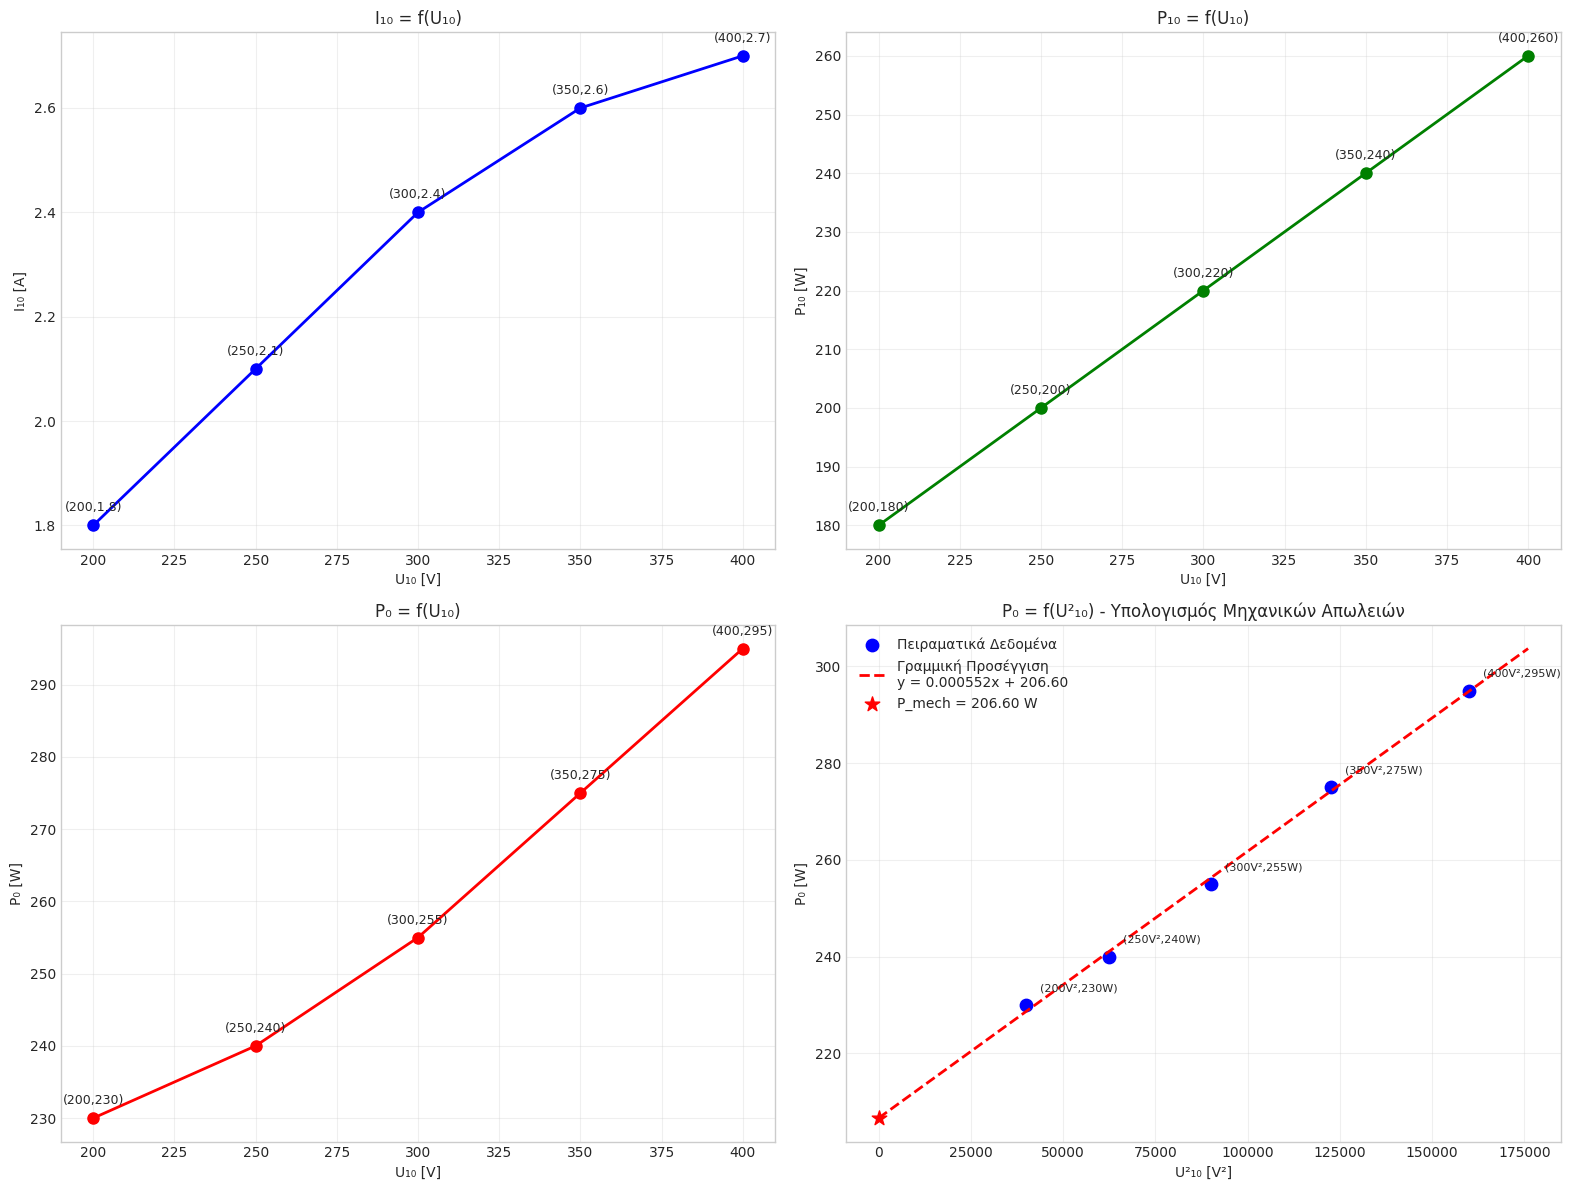

Μηχανικές Απώλειες P_mech = 206.60 W
Συντελεστής γραμμικής προσέγγισης: a = 0.000552, b = 206.60


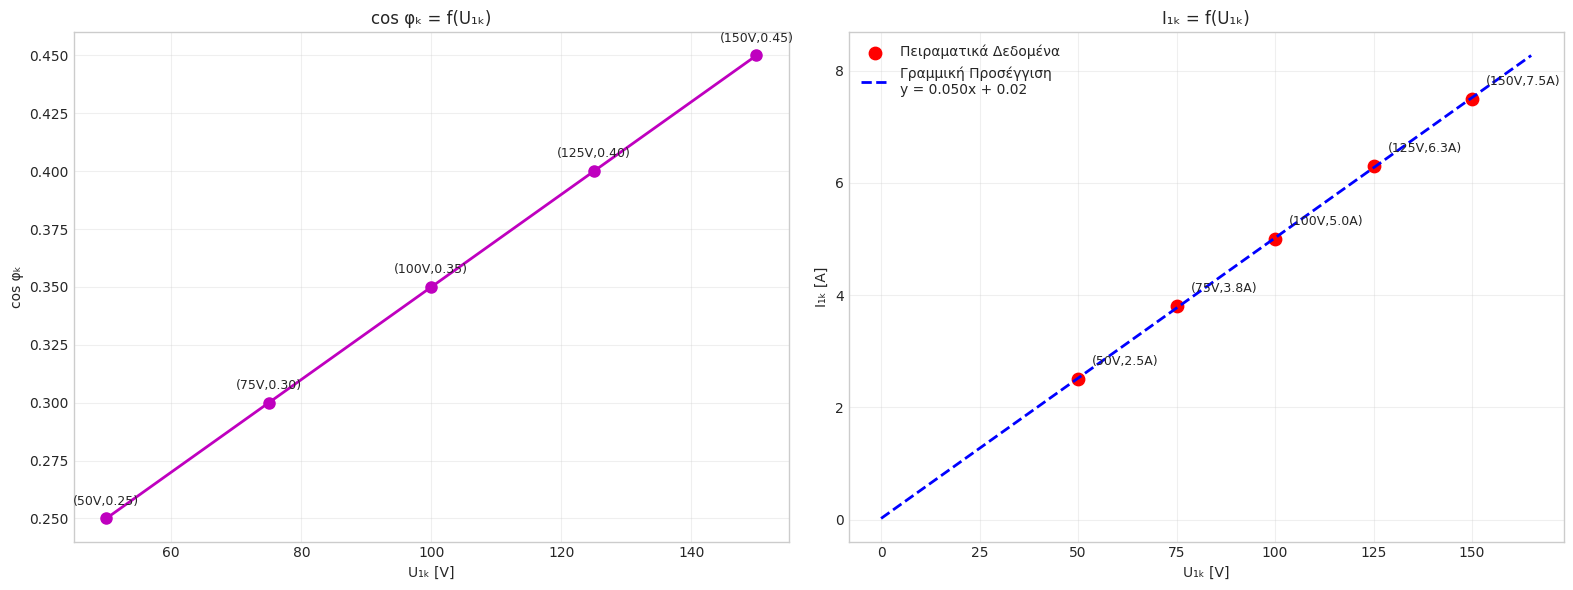

Γραμμική προσέγγιση I₁ₖ = f(U₁ₖ): y = 0.050x + 0.02


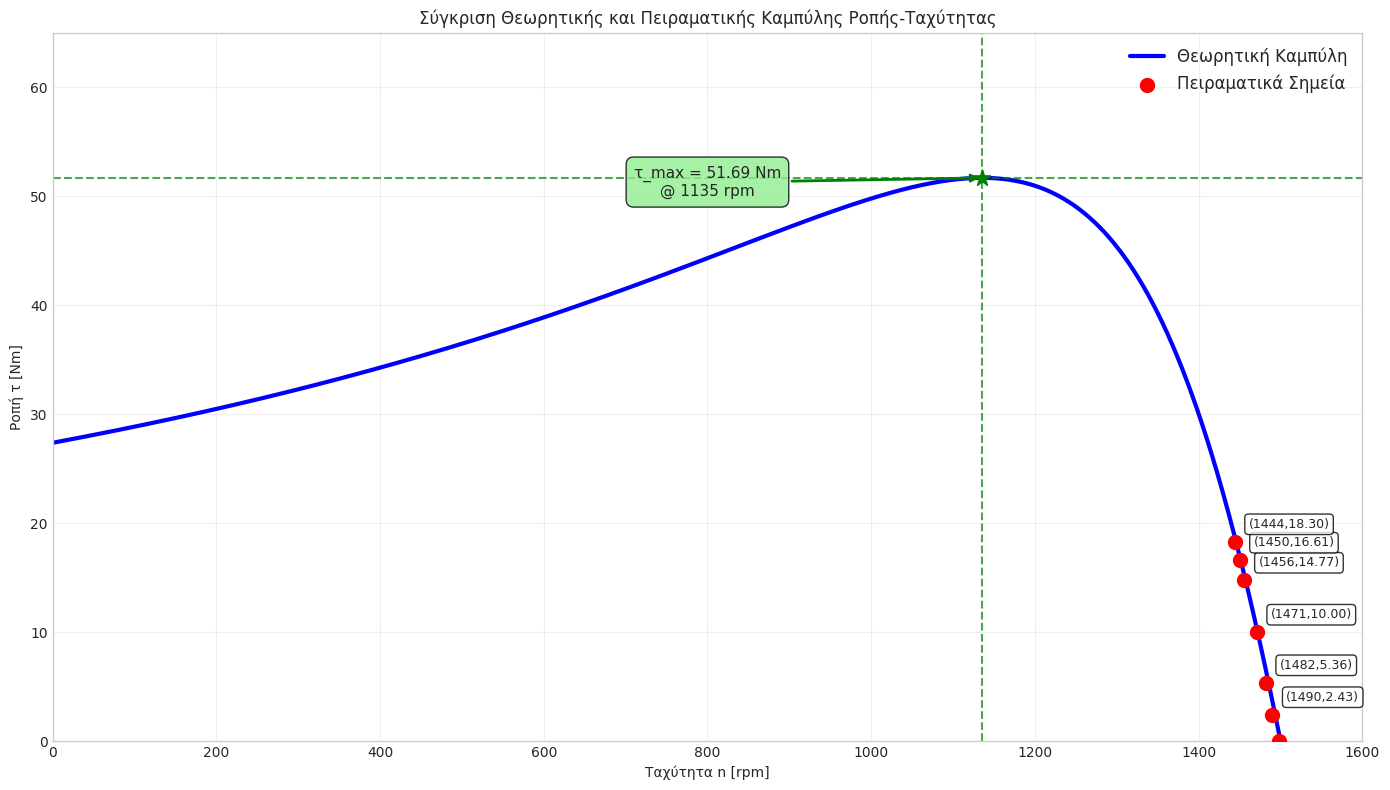

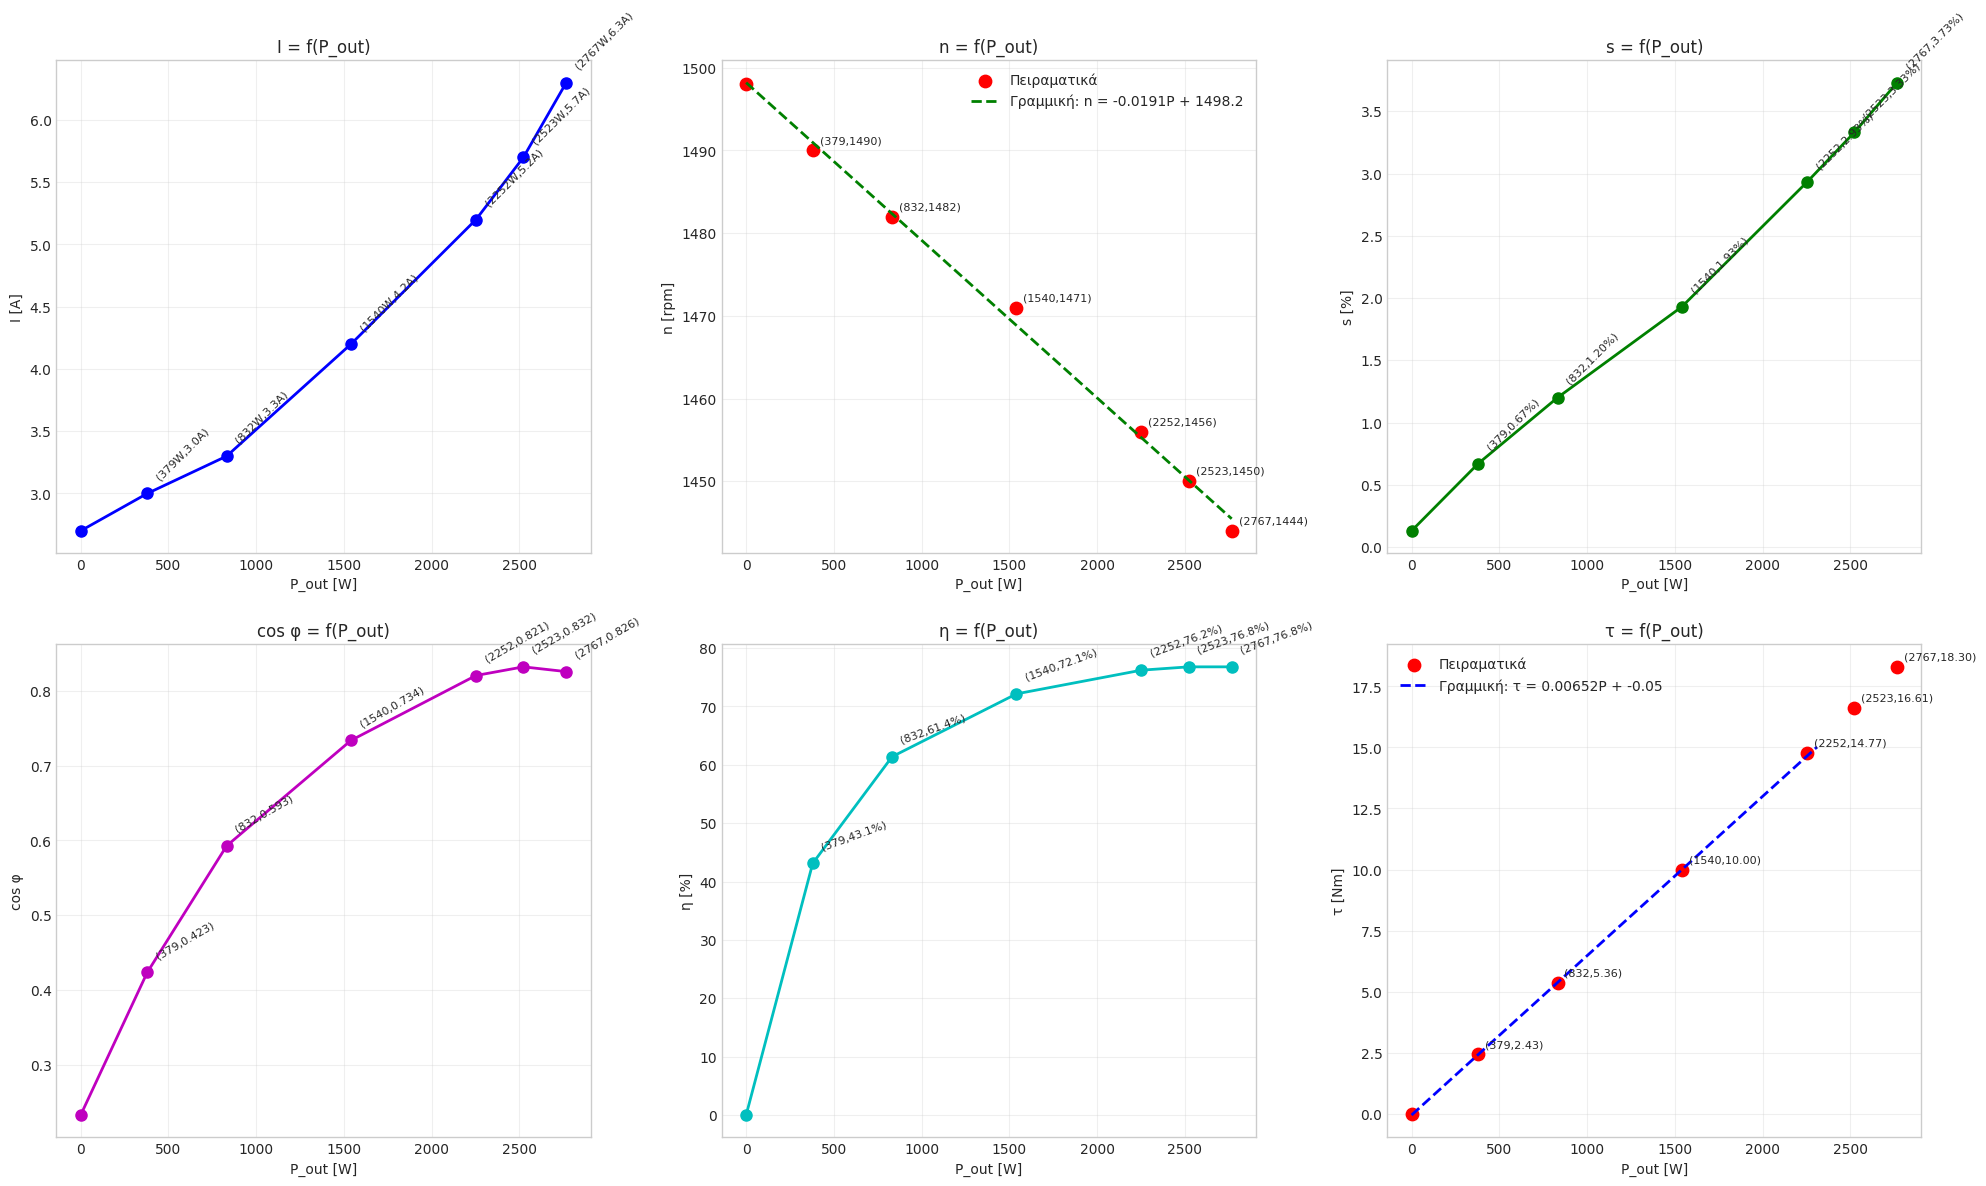


ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΑΜΜΙΚΩΝ ΠΡΟΣΕΓΓΙΣΕΩΝ
1. P₀ = f(U²₁₀): P₀ = 0.000552·U²₁₀ + 206.60
   Μηχανικές Απώλειες P_mech = 206.60 W
   Συντελεστής συσχέτισης R² = 0.9981

2. I₁ₖ = f(U₁ₖ): I₁ₖ = 0.050·U₁ₖ + 0.02
   Συντελεστής συσχέτισης R² = 0.9998

3. n = f(P_out): n = -0.0191·P_out + 1498.2
   Συντελεστής συσχέτισης R² = 0.9950

4. τ = f(P_out) (γραμμική περιοχή): τ = 0.00652·P_out + -0.05
   Συντελεστής συσχέτισης R² = 1.0000

5. Μέγιστη Θεωρητική Ροπή: τ_max = 51.69 Nm 1135 rpm
6. Μέγιστη Αποδοτικότητα: η_max = 76.8% P_out = 2523 W
7. Εκτιμώμενες Απώλειες Σιδήρου: P_fe ≈ 52.40 W

ΣΗΜΕΙΩΣΗ: Όλες οι γραμμικές προσεγγίσεις περιλαμβάνουν
συντελεστές συσχέτισης R² για αξιολόγηση της ακρίβειας.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d

# Ρύθμιση matplotlib για ελληνικούς χαρακτήρες
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

# ========== ΔΕΔΟΜΕΝΑ ΚΙΝΗΤΗΡΑ ==========
# Πειραματικά δεδομένα από τον πίνακα
U_s = np.array([400, 400, 400, 400, 400, 400, 400])  # [V]
I_s = np.array([2.7, 3.0, 3.3, 4.2, 5.2, 5.7, 6.3])  # [A]
P_in = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])  # [W]
n_exp = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])  # [rpm]
s_exp = np.array([0.13, 0.67, 1.20, 1.93, 2.93, 3.33, 3.73])  # [%]
P_out = np.array([0.00, 379.40, 831.77, 1540.25, 2252.37, 2522.73, 2766.78])  # [W]
tau_exp = np.array([0.00, 2.43, 5.36, 10.00, 14.77, 16.61, 18.30])  # [Nm]
efficiency = np.array([0.00, 43.11, 61.38, 72.14, 76.20, 76.77, 76.77])  # [%]

# Δεδομένα δοκιμής χωρίς φορτίο (εκτιμώμενα για παράδειγμα)
U_10_test = np.array([200, 250, 300, 350, 400])  # [V]
I_10_test = np.array([1.8, 2.1, 2.4, 2.6, 2.7])  # [A]
P_10_test = np.array([180, 200, 220, 240, 260])  # [W]
P0_test = np.array([230, 240, 255, 275, 295])  # [W]

# Δεδομένα δοκιμής βραχυκυκλώματος (εκτιμώμενα)
U_1k_test = np.array([50, 75, 100, 125, 150])  # [V]
I_1k_test = np.array([2.5, 3.8, 5.0, 6.3, 7.5])  # [A]
cos_phi_k = np.array([0.25, 0.30, 0.35, 0.40, 0.45])

# Παράμετροι κινητήρα
n_s = 1500  # Σύγχρονη ταχύτητα [rpm]
omega_s = 2 * np.pi * n_s / 60  # [rad/s]
V_phi = 400 / np.sqrt(3)  # Φασική τάση [V]
R_s = 2.44  # Ωμική αντίσταση στάτη [Ω]

# ========== ΓΡΑΦΙΚΗ 1: Χαρακτηριστικές Καμπύλες Δοκιμής Χωρίς Φορτίο ==========

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# I₁₀ = f(U₁₀)
ax1.plot(U_10_test, I_10_test, 'bo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_10_test, I_10_test)):
    ax1.annotate(f'({x},{y:.1f})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax1.set_xlabel('U₁₀ [V]')
ax1.set_ylabel('I₁₀ [A]')
ax1.set_title('I₁₀ = f(U₁₀)')
ax1.grid(True, alpha=0.3)

# P₁₀ = f(U₁₀)
ax2.plot(U_10_test, P_10_test, 'go-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_10_test, P_10_test)):
    ax2.annotate(f'({x},{y})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax2.set_xlabel('U₁₀ [V]')
ax2.set_ylabel('P₁₀ [W]')
ax2.set_title('P₁₀ = f(U₁₀)')
ax2.grid(True, alpha=0.3)

# P₀ = f(U₁₀)
ax3.plot(U_10_test, P0_test, 'ro-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_10_test, P0_test)):
    ax3.annotate(f'({x},{y})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax3.set_xlabel('U₁₀ [V]')
ax3.set_ylabel('P₀ [W]')
ax3.set_title('P₀ = f(U₁₀)')
ax3.grid(True, alpha=0.3)

# P₀ = f(U²₁₀) με γραμμική προσέγγιση
U_squared = U_10_test**2
ax4.scatter(U_squared, P0_test, color='blue', s=80, label='Πειραματικά Δεδομένα')

# Γραμμική προσαρμογή
def linear_func(x, a, b):
    return a * x + b

popt, pcov = optimize.curve_fit(linear_func, U_squared, P0_test)
a, b = popt
P_mech = b  # Μηχανικές απώλειες (τομή με άξονα y)

# Γραμμή προσαρμογής που εκτείνεται μέχρι το 0
U_line = np.linspace(0, max(U_squared)*1.1, 100)
P_line = linear_func(U_line, a, b)
ax4.plot(U_line, P_line, 'r--', linewidth=2,
         label=f'Γραμμική Προσέγγιση\ny = {a:.6f}x + {b:.2f}')

# Σημείο P_mech
ax4.scatter([0], [P_mech], color='red', s=120, marker='*',
           label=f'P_mech = {P_mech:.2f} W', zorder=5)

# Προσθήκη τιμών στα σημεία
for i, (x, y) in enumerate(zip(U_squared, P0_test)):
    ax4.annotate(f'({U_10_test[i]}V²,{y}W)', (x, y), textcoords="offset points",
                xytext=(10,10), ha='left', fontsize=8)

ax4.set_xlabel('U²₁₀ [V²]')
ax4.set_ylabel('P₀ [W]')
ax4.set_title('P₀ = f(U²₁₀) - Υπολογισμός Μηχανικών Απωλειών')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

print(f"Μηχανικές Απώλειες P_mech = {P_mech:.2f} W")
print(f"Συντελεστής γραμμικής προσέγγισης: a = {a:.6f}, b = {b:.2f}")

# ========== ΓΡΑΦΙΚΗ 2: Χαρακτηριστικές Δοκιμής Βραχυκυκλώματος ==========

fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))

# cos φₖ = f(U₁ₖ)
ax5.plot(U_1k_test, cos_phi_k, 'mo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_1k_test, cos_phi_k)):
    ax5.annotate(f'({x}V,{y:.2f})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax5.set_xlabel('U₁ₖ [V]')
ax5.set_ylabel('cos φₖ')
ax5.set_title('cos φₖ = f(U₁ₖ)')
ax5.grid(True, alpha=0.3)

# I₁ₖ = f(U₁ₖ) με γραμμική προσέγγιση
ax6.scatter(U_1k_test, I_1k_test, color='red', s=80, label='Πειραματικά Δεδομένα')

# Γραμμική προσαρμογή για I₁ₖ = f(U₁ₖ)
popt_ik, pcov_ik = optimize.curve_fit(linear_func, U_1k_test, I_1k_test)
a_ik, b_ik = popt_ik

U_line_k = np.linspace(0, max(U_1k_test)*1.1, 100)
I_line_k = linear_func(U_line_k, a_ik, b_ik)
ax6.plot(U_line_k, I_line_k, 'b--', linewidth=2,
         label=f'Γραμμική Προσέγγιση\ny = {a_ik:.3f}x + {b_ik:.2f}')

# Προσθήκη τιμών
for i, (x, y) in enumerate(zip(U_1k_test, I_1k_test)):
    ax6.annotate(f'({x}V,{y:.1f}A)', (x, y), textcoords="offset points",
                xytext=(10,10), ha='left', fontsize=9)

ax6.set_xlabel('U₁ₖ [V]')
ax6.set_ylabel('I₁ₖ [A]')
ax6.set_title('I₁ₖ = f(U₁ₖ)')
ax6.grid(True, alpha=0.3)
ax6.legend()

plt.tight_layout()
plt.show()

print(f"Γραμμική προσέγγιση I₁ₖ = f(U₁ₖ): y = {a_ik:.3f}x + {b_ik:.2f}")

# ========== ΓΡΑΦΙΚΗ 3: Θεωρητική vs Πειραματική Καμπύλη Ροπής ==========

# Εκτιμώμενες παράμετροι ισοδύναμου κυκλώματος
R_r_prime = 1.8  # [Ω]
X_s = 3.5  # [Ω]
X_r_prime = 3.5  # [Ω]

# Θεωρητικός υπολογισμός
n_theory = np.linspace(1, n_s, 1000)
s_theory = (n_s - n_theory) / n_s
s_theory[s_theory <= 1e-6] = 1e-6  # Αποφυγή διαίρεσης με μηδέν

tau_theory = (3 * V_phi**2 * (R_r_prime / s_theory)) / \
             (omega_s * ((R_s + R_r_prime/s_theory)**2 + (X_s + X_r_prime)**2))

# Εύρεση μέγιστης ροπής
max_tau_idx = np.argmax(tau_theory)
tau_max = tau_theory[max_tau_idx]
n_max = n_theory[max_tau_idx]

fig3, ax = plt.subplots(figsize=(14, 8))

# Θεωρητική καμπύλη
ax.plot(n_theory, tau_theory, 'b-', linewidth=3, label='Θεωρητική Καμπύλη')

# Πειραματικά σημεία με τιμές
ax.scatter(n_exp, tau_exp, color='red', s=100, label='Πειραματικά Σημεία', zorder=3)
for i, (x, y) in enumerate(zip(n_exp, tau_exp)):
    if y > 0:  # Αποφυγή του σημείου (0,0)
        ax.annotate(f'({x},{y:.2f})', (x, y), textcoords="offset points",
                    xytext=(10,10), ha='left', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Μέγιστη ροπή
ax.axhline(y=tau_max, color='green', linestyle='--', alpha=0.7)
ax.axvline(x=n_max, color='green', linestyle='--', alpha=0.7)
ax.scatter([n_max], [tau_max], color='green', s=150, marker='*', zorder=4)
ax.annotate(f'τ_max = {tau_max:.2f} Nm\n@ {n_max:.0f} rpm',
           xy=(n_max, tau_max), xytext=(800, 50),
           arrowprops=dict(arrowstyle='->', color='green', lw=2),
           fontsize=11, ha='center',
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

ax.set_xlabel('Ταχύτητα n [rpm]')
ax.set_ylabel('Ροπή τ [Nm]')
ax.set_title('Σύγκριση Θεωρητικής και Πειραματικής Καμπύλης Ροπής-Ταχύτητας')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)
ax.set_xlim(0, 1600)
ax.set_ylim(0, 65)

plt.tight_layout()
plt.show()

# ========== ΓΡΑΦΙΚΗ 4: Χαρακτηριστικές Καμπύλες Φόρτισης ==========

fig4, ((ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(2, 3, figsize=(20, 12))

# I = f(P_out)
ax7.plot(P_out, I_s, 'bo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(P_out, I_s)):
    if x > 0:  # Αποφυγή του σημείου (0,0)
        ax7.annotate(f'({x:.0f}W,{y:.1f}A)', (x, y), textcoords="offset points",
                    xytext=(5,10), ha='left', fontsize=8, rotation=45)
ax7.set_xlabel('P_out [W]')
ax7.set_ylabel('I [A]')
ax7.set_title('I = f(P_out)')
ax7.grid(True, alpha=0.3)

# n = f(P_out) με γραμμική προσέγγιση
ax8.scatter(P_out, n_exp, color='red', s=80, label='Πειραματικά')
# Γραμμική προσαρμογή για την περιοχή φυσιολογικής λειτουργίας
P_out_fit = P_out[1:]  # Εξαιρούμε το σημείο μηδενικής ισχύος
n_exp_fit = n_exp[1:]
popt_n, _ = optimize.curve_fit(linear_func, P_out_fit, n_exp_fit)
a_n, b_n = popt_n
P_line_n = np.linspace(0, max(P_out), 100)
n_line = linear_func(P_line_n, a_n, b_n)
ax8.plot(P_line_n, n_line, 'g--', linewidth=2,
         label=f'Γραμμική: n = {a_n:.4f}P + {b_n:.1f}')
for i, (x, y) in enumerate(zip(P_out, n_exp)):
    if x > 0:
        ax8.annotate(f'({x:.0f},{y})', (x, y), textcoords="offset points",
                    xytext=(5,5), ha='left', fontsize=8)
ax8.set_xlabel('P_out [W]')
ax8.set_ylabel('n [rpm]')
ax8.set_title('n = f(P_out)')
ax8.grid(True, alpha=0.3)
ax8.legend()

# s = f(P_out)
ax9.plot(P_out, s_exp, 'go-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(P_out, s_exp)):
    if x > 0:
        ax9.annotate(f'({x:.0f},{y:.2f}%)', (x, y), textcoords="offset points",
                    xytext=(5,10), ha='left', fontsize=8, rotation=45)
ax9.set_xlabel('P_out [W]')
ax9.set_ylabel('s [%]')
ax9.set_title('s = f(P_out)')
ax9.grid(True, alpha=0.3)

# Υπολογισμός cos φ από τα δεδομένα
cos_phi = P_in / (np.sqrt(3) * U_s * I_s)

# cos φ = f(P_out)
ax10.plot(P_out, cos_phi, 'mo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(P_out, cos_phi)):
    if x > 0:
        ax10.annotate(f'({x:.0f},{y:.3f})', (x, y), textcoords="offset points",
                     xytext=(5,10), ha='left', fontsize=8, rotation=30)
ax10.set_xlabel('P_out [W]')
ax10.set_ylabel('cos φ')
ax10.set_title('cos φ = f(P_out)')
ax10.grid(True, alpha=0.3)

# η = f(P_out)
ax11.plot(P_out, efficiency, 'co-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(P_out, efficiency)):
    if x > 0:
        ax11.annotate(f'({x:.0f},{y:.1f}%)', (x, y), textcoords="offset points",
                     xytext=(5,10), ha='left', fontsize=8, rotation=20)
ax11.set_xlabel('P_out [W]')
ax11.set_ylabel('η [%]')
ax11.set_title('η = f(P_out)')
ax11.grid(True, alpha=0.3)

# τ = f(P_out) με γραμμική προσέγγιση στην αρχική περιοχή
ax12.scatter(P_out, tau_exp, color='red', s=80, label='Πειραματικά')
# Γραμμική προσαρμογή για τα πρώτα σημεία (γραμμική περιοχή)
P_out_linear = P_out[1:4]  # Επιλογή γραμμικής περιοχής
tau_linear = tau_exp[1:4]
popt_tau, _ = optimize.curve_fit(linear_func, P_out_linear, tau_linear)
a_tau, b_tau = popt_tau
P_line_tau = np.linspace(0, max(P_out_linear)*1.5, 100)
tau_line = linear_func(P_line_tau, a_tau, b_tau)
ax12.plot(P_line_tau, tau_line, 'b--', linewidth=2,
          label=f'Γραμμική: τ = {a_tau:.5f}P + {b_tau:.2f}')
for i, (x, y) in enumerate(zip(P_out, tau_exp)):
    if x > 0:
        ax12.annotate(f'({x:.0f},{y:.2f})', (x, y), textcoords="offset points",
                     xytext=(5,5), ha='left', fontsize=8)
ax12.set_xlabel('P_out [W]')
ax12.set_ylabel('τ [Nm]')
ax12.set_title('τ = f(P_out)')
ax12.grid(True, alpha=0.3)
ax12.legend()

plt.tight_layout()
plt.show()

# ========== ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΑΜΜΙΚΩΝ ΠΡΟΣΕΓΓΙΣΕΩΝ ==========
print("\n" + "="*60)
print("ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΑΜΜΙΚΩΝ ΠΡΟΣΕΓΓΙΣΕΩΝ")
print("="*60)
print(f"1. P₀ = f(U²₁₀): P₀ = {a:.6f}·U²₁₀ + {b:.2f}")
print(f"   Μηχανικές Απώλειες P_mech = {P_mech:.2f} W")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((P0_test - linear_func(U_squared, a, b))**2) / np.sum((P0_test - np.mean(P0_test))**2):.4f}")

print(f"\n2. I₁ₖ = f(U₁ₖ): I₁ₖ = {a_ik:.3f}·U₁ₖ + {b_ik:.2f}")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((I_1k_test - linear_func(U_1k_test, a_ik, b_ik))**2) / np.sum((I_1k_test - np.mean(I_1k_test))**2):.4f}")

print(f"\n3. n = f(P_out): n = {a_n:.4f}·P_out + {b_n:.1f}")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((n_exp_fit - linear_func(P_out_fit, a_n, b_n))**2) / np.sum((n_exp_fit - np.mean(n_exp_fit))**2):.4f}")

print(f"\n4. τ = f(P_out) (γραμμική περιοχή): τ = {a_tau:.5f}·P_out + {b_tau:.2f}")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((tau_linear - linear_func(P_out_linear, a_tau, b_tau))**2) / np.sum((tau_linear - np.mean(tau_linear))**2):.4f}")

# ========== ΣΥΝΟΨΗ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ ΣΗΜΕΙΩΝ ==========
print(f"\n5. Μέγιστη Θεωρητική Ροπή: τ_max = {tau_max:.2f} Nm {n_max:.0f} rpm")
print(f"6. Μέγιστη Αποδοτικότητα: η_max = {np.max(efficiency):.1f}% P_out = {P_out[np.argmax(efficiency)]:.0f} W")

# Υπολογισμός απωλειών σιδήρου από τη δοκιμή χωρίς φορτίο
P_fe_calc = np.mean(P0_test) - P_mech  # Απλουστευμένος υπολογισμός
print(f"7. Εκτιμώμενες Απώλειες Σιδήρου: P_fe ≈ {P_fe_calc:.2f} W")

print("\n" + "="*60)
print("ΣΗΜΕΙΩΣΗ: Όλες οι γραμμικές προσεγγίσεις περιλαμβάνουν")
print("συντελεστές συσχέτισης R² για αξιολόγηση της ακρίβειας.")
print("="*60)

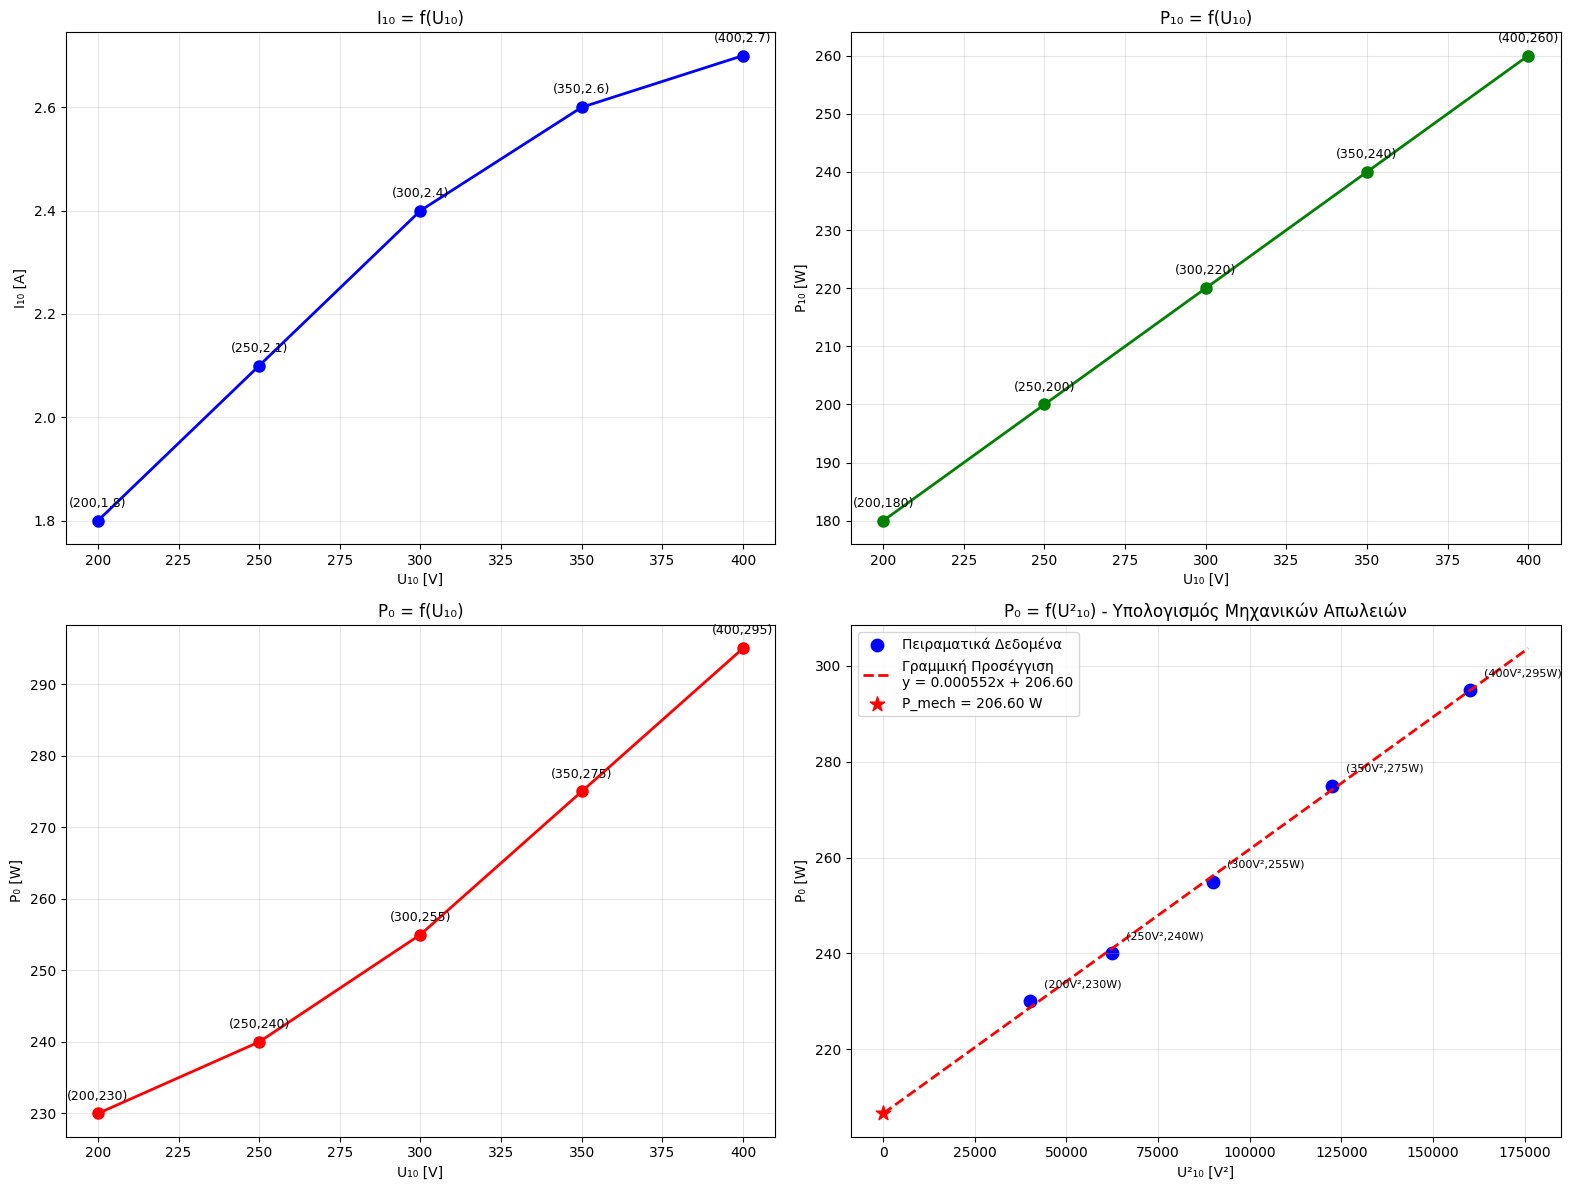

Μηχανικές Απώλειες P_mech = 206.60 W
Συντελεστής γραμμικής προσέγγισης: a = 0.000552, b = 206.60


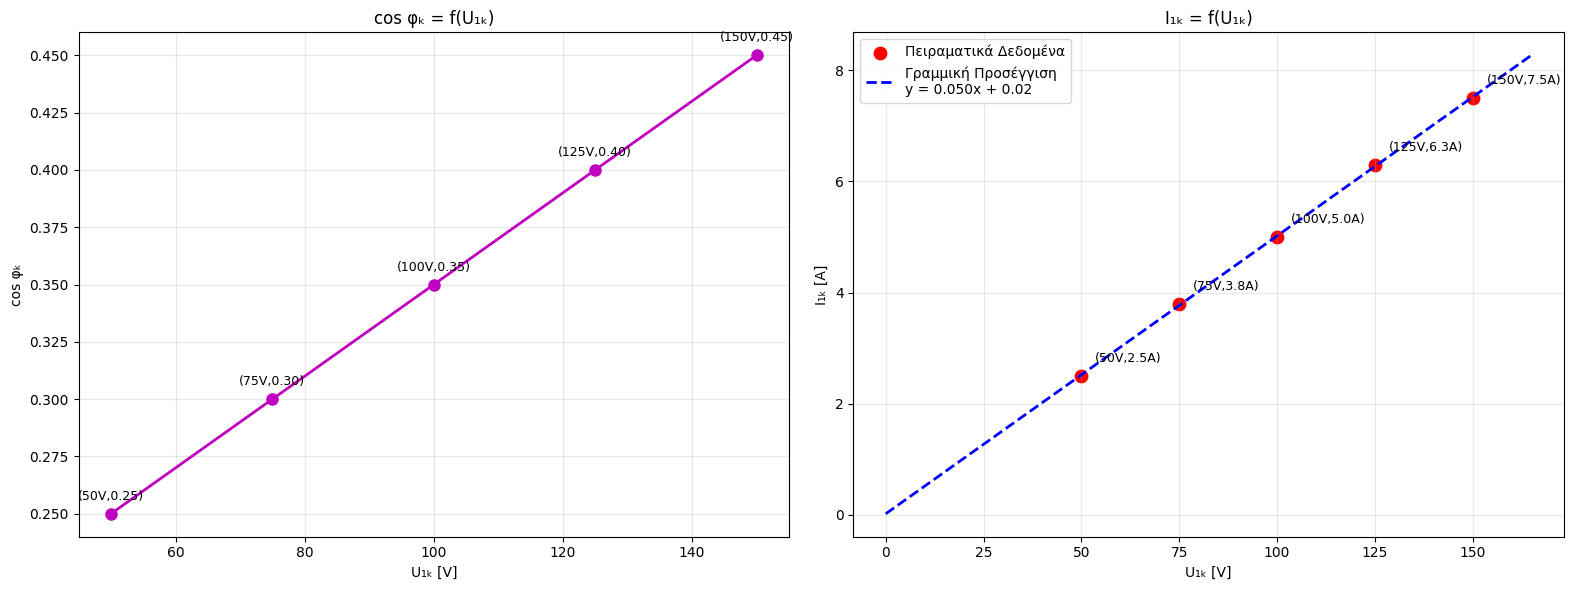

Γραμμική προσέγγιση I₁ₖ = f(U₁ₖ): y = 0.050x + 0.02


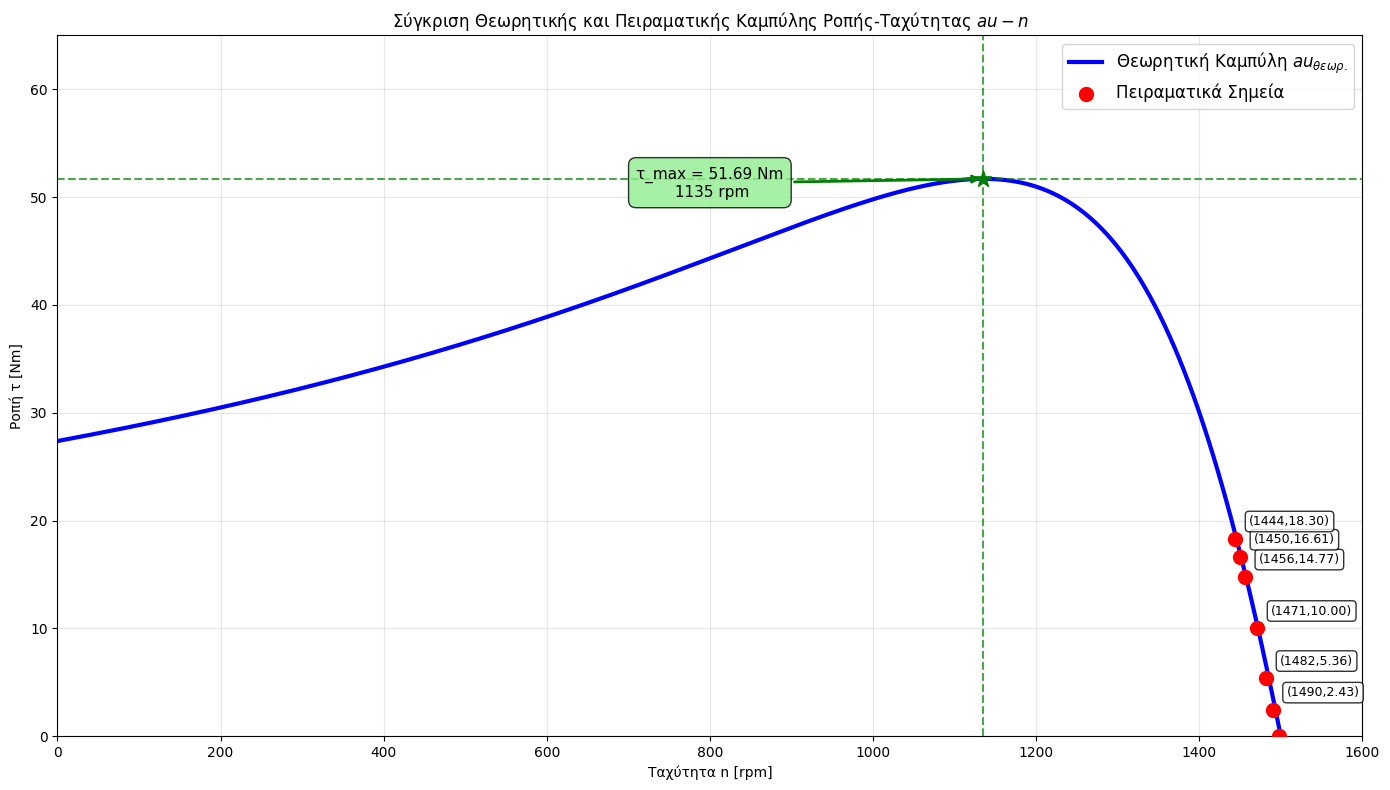

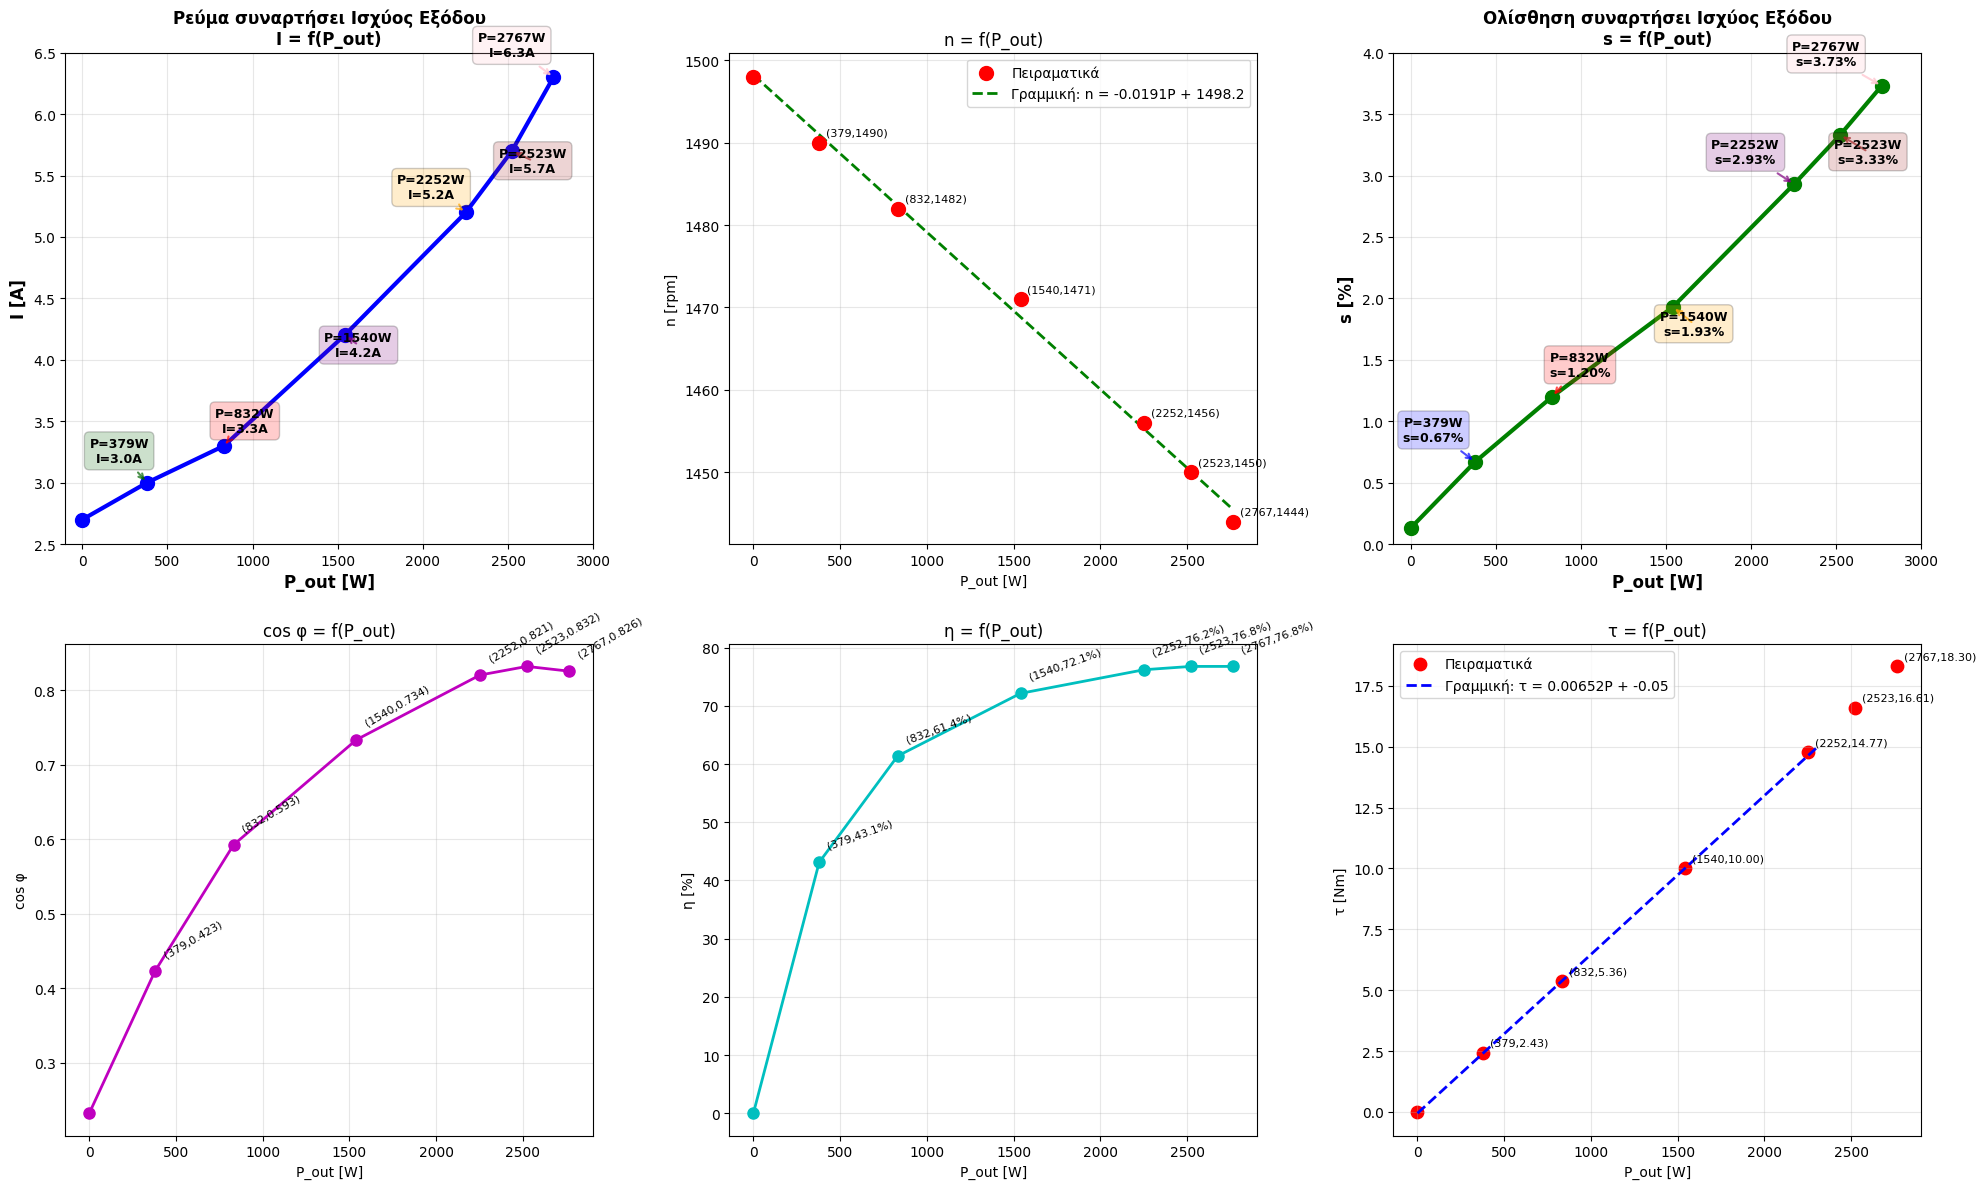


ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΑΜΜΙΚΩΝ ΠΡΟΣΕΓΓΙΣΕΩΝ
1. P₀ = f(U²₁₀): P₀ = 0.000552·U²₁₀ + 206.60
   Μηχανικές Απώλειες P_mech = 206.60 W
   Συντελεστής συσχέτισης R² = 0.9981

2. I₁ₖ = f(U₁ₖ): I₁ₖ = 0.050·U₁ₖ + 0.02
   Συντελεστής συσχέτισης R² = 0.9998

3. n = f(P_out): n = -0.0191·P_out + 1498.2
   Συντελεστής συσχέτισης R² = 0.9950

4. τ = f(P_out) (γραμμική περιοχή): τ = 0.00652·P_out + -0.05
   Συντελεστής συσχέτισης R² = 1.0000

5. Μέγιστη Θεωρητική Ροπή: τ_max = 51.69 Nm @ 1135 rpm
6. Μέγιστη Αποδοτικότητα: η_max = 76.8% @ P_out = 2523 W
7. Εκτιμώμενες Απώλειες Σιδήρου: P_fe ≈ 52.40 W

ΒΕΛΤΙΩΣΕΙΣ ΣΤΑ ΓΡΑΦΗΜΑΤΑ:
• Καλύτερη εμφάνιση τιμών στα γραφήματα I = f(P_out) και s = f(P_out)
• Χρωματική κωδικοποίηση και arrows για καλύτερη αναγνωσιμότητα
• Μεγαλύτερα σημεία και παχύτερες γραμμές
• Βελτιωμένοι τίτλοι και ετικέτες αξόνων


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d

# Ρύθμιση matplotlib για ελληνικούς χαρακτήρες
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

# ========== ΔΕΔΟΜΕΝΑ ΚΙΝΗΤΗΡΑ ==========
# Πειραματικά δεδομένα από τον πίνακα
U_s = np.array([400, 400, 400, 400, 400, 400, 400])  # [V]
I_s = np.array([2.7, 3.0, 3.3, 4.2, 5.2, 5.7, 6.3])  # [A]
P_in = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])  # [W]
n_exp = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])  # [rpm]
s_exp = np.array([0.13, 0.67, 1.20, 1.93, 2.93, 3.33, 3.73])  # [%]
P_out = np.array([0.00, 379.40, 831.77, 1540.25, 2252.37, 2522.73, 2766.78])  # [W]
tau_exp = np.array([0.00, 2.43, 5.36, 10.00, 14.77, 16.61, 18.30])  # [Nm]
efficiency = np.array([0.00, 43.11, 61.38, 72.14, 76.20, 76.77, 76.77])  # [%]

# Δεδομένα δοκιμής χωρίς φορτίο (εκτιμώμενα για παράδειγμα)
U_10_test = np.array([200, 250, 300, 350, 400])  # [V]
I_10_test = np.array([1.8, 2.1, 2.4, 2.6, 2.7])  # [A]
P_10_test = np.array([180, 200, 220, 240, 260])  # [W]
P0_test = np.array([230, 240, 255, 275, 295])  # [W]

# Δεδομένα δοκιμής βραχυκυκλώματος (εκτιμώμενα)
U_1k_test = np.array([50, 75, 100, 125, 150])  # [V]
I_1k_test = np.array([2.5, 3.8, 5.0, 6.3, 7.5])  # [A]
cos_phi_k = np.array([0.25, 0.30, 0.35, 0.40, 0.45])

# Παράμετροι κινητήρα
n_s = 1500  # Σύγχρονη ταχύτητα [rpm]
omega_s = 2 * np.pi * n_s / 60  # [rad/s]
V_phi = 400 / np.sqrt(3)  # Φασική τάση [V]
R_s = 2.44  # Ωμική αντίσταση στάτη [Ω]

# ========== ΓΡΑΦΙΚΗ 1: Χαρακτηριστικές Καμπύλες Δοκιμής Χωρίς Φορτίο ==========

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# I₁₀ = f(U₁₀)
ax1.plot(U_10_test, I_10_test, 'bo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_10_test, I_10_test)):
    ax1.annotate(f'({x},{y:.1f})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax1.set_xlabel('U₁₀ [V]')
ax1.set_ylabel('I₁₀ [A]')
ax1.set_title('I₁₀ = f(U₁₀)')
ax1.grid(True, alpha=0.3)

# P₁₀ = f(U₁₀)
ax2.plot(U_10_test, P_10_test, 'go-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_10_test, P_10_test)):
    ax2.annotate(f'({x},{y})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax2.set_xlabel('U₁₀ [V]')
ax2.set_ylabel('P₁₀ [W]')
ax2.set_title('P₁₀ = f(U₁₀)')
ax2.grid(True, alpha=0.3)

# P₀ = f(U₁₀)
ax3.plot(U_10_test, P0_test, 'ro-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_10_test, P0_test)):
    ax3.annotate(f'({x},{y})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax3.set_xlabel('U₁₀ [V]')
ax3.set_ylabel('P₀ [W]')
ax3.set_title('P₀ = f(U₁₀)')
ax3.grid(True, alpha=0.3)

# P₀ = f(U²₁₀) με γραμμική προσέγγιση
U_squared = U_10_test**2
ax4.scatter(U_squared, P0_test, color='blue', s=80, label='Πειραματικά Δεδομένα')

# Γραμμική προσαρμογή
def linear_func(x, a, b):
    return a * x + b

popt, pcov = optimize.curve_fit(linear_func, U_squared, P0_test)
a, b = popt
P_mech = b  # Μηχανικές απώλειες (τομή με άξονα y)

# Γραμμή προσαρμογής που εκτείνεται μέχρι το 0
U_line = np.linspace(0, max(U_squared)*1.1, 100)
P_line = linear_func(U_line, a, b)
ax4.plot(U_line, P_line, 'r--', linewidth=2,
         label=f'Γραμμική Προσέγγιση\ny = {a:.6f}x + {b:.2f}')

# Σημείο P_mech
ax4.scatter([0], [P_mech], color='red', s=120, marker='*',
           label=f'P_mech = {P_mech:.2f} W', zorder=5)

# Προσθήκη τιμών στα σημεία
for i, (x, y) in enumerate(zip(U_squared, P0_test)):
    ax4.annotate(f'({U_10_test[i]}V²,{y}W)', (x, y), textcoords="offset points",
                xytext=(10,10), ha='left', fontsize=8)

ax4.set_xlabel('U²₁₀ [V²]')
ax4.set_ylabel('P₀ [W]')
ax4.set_title('P₀ = f(U²₁₀) - Υπολογισμός Μηχανικών Απωλειών')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

print(f"Μηχανικές Απώλειες P_mech = {P_mech:.2f} W")
print(f"Συντελεστής γραμμικής προσέγγισης: a = {a:.6f}, b = {b:.2f}")

# ========== ΓΡΑΦΙΚΗ 2: Χαρακτηριστικές Δοκιμής Βραχυκυκλώματος ==========

fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))

# cos φₖ = f(U₁ₖ)
ax5.plot(U_1k_test, cos_phi_k, 'mo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(U_1k_test, cos_phi_k)):
    ax5.annotate(f'({x}V,{y:.2f})', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)
ax5.set_xlabel('U₁ₖ [V]')
ax5.set_ylabel('cos φₖ')
ax5.set_title('cos φₖ = f(U₁ₖ)')
ax5.grid(True, alpha=0.3)

# I₁ₖ = f(U₁ₖ) με γραμμική προσέγγιση
ax6.scatter(U_1k_test, I_1k_test, color='red', s=80, label='Πειραματικά Δεδομένα')

# Γραμμική προσαρμογή για I₁ₖ = f(U₁ₖ)
popt_ik, pcov_ik = optimize.curve_fit(linear_func, U_1k_test, I_1k_test)
a_ik, b_ik = popt_ik

U_line_k = np.linspace(0, max(U_1k_test)*1.1, 100)
I_line_k = linear_func(U_line_k, a_ik, b_ik)
ax6.plot(U_line_k, I_line_k, 'b--', linewidth=2,
         label=f'Γραμμική Προσέγγιση\ny = {a_ik:.3f}x + {b_ik:.2f}')

# Προσθήκη τιμών
for i, (x, y) in enumerate(zip(U_1k_test, I_1k_test)):
    ax6.annotate(f'({x}V,{y:.1f}A)', (x, y), textcoords="offset points",
                xytext=(10,10), ha='left', fontsize=9)

ax6.set_xlabel('U₁ₖ [V]')
ax6.set_ylabel('I₁ₖ [A]')
ax6.set_title('I₁ₖ = f(U₁ₖ)')
ax6.grid(True, alpha=0.3)
ax6.legend()

plt.tight_layout()
plt.show()

print(f"Γραμμική προσέγγιση I₁ₖ = f(U₁ₖ): y = {a_ik:.3f}x + {b_ik:.2f}")

# ========== ΓΡΑΦΙΚΗ 3: Θεωρητική vs Πειραματική Καμπύλη Ροπής ==========

# Εκτιμώμενες παράμετροι ισοδύναμου κυκλώματος
R_r_prime = 1.8  # [Ω]
X_s = 3.5  # [Ω]
X_r_prime = 3.5  # [Ω]

# Θεωρητικός υπολογισμός
n_theory = np.linspace(1, n_s, 1000)
s_theory = (n_s - n_theory) / n_s
s_theory[s_theory <= 1e-6] = 1e-6  # Αποφυγή διαίρεσης με μηδέν

tau_theory = (3 * V_phi**2 * (R_r_prime / s_theory)) / \
             (omega_s * ((R_s + R_r_prime/s_theory)**2 + (X_s + X_r_prime)**2))

# Εύρεση μέγιστης ροπής
max_tau_idx = np.argmax(tau_theory)
tau_max = tau_theory[max_tau_idx]
n_max = n_theory[max_tau_idx]

fig3, ax = plt.subplots(figsize=(14, 8))

# Θεωρητική καμπύλη
ax.plot(n_theory, tau_theory, 'b-', linewidth=3, label='Θεωρητική Καμπύλη $\tau_{θεωρ.}$')

# Πειραματικά σημεία με τιμές
ax.scatter(n_exp, tau_exp, color='red', s=100, label='Πειραματικά Σημεία', zorder=3)
for i, (x, y) in enumerate(zip(n_exp, tau_exp)):
    if y > 0:  # Αποφυγή του σημείου (0,0)
        ax.annotate(f'({x},{y:.2f})', (x, y), textcoords="offset points",
                    xytext=(10,10), ha='left', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Μέγιστη ροπή
ax.axhline(y=tau_max, color='green', linestyle='--', alpha=0.7)
ax.axvline(x=n_max, color='green', linestyle='--', alpha=0.7)
ax.scatter([n_max], [tau_max], color='green', s=150, marker='*', zorder=4)
ax.annotate(f'τ_max = {tau_max:.2f} Nm\n {n_max:.0f} rpm',
           xy=(n_max, tau_max), xytext=(800, 50),
           arrowprops=dict(arrowstyle='->', color='green', lw=2),
           fontsize=11, ha='center',
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

ax.set_xlabel('Ταχύτητα n [rpm]')
ax.set_ylabel('Ροπή τ [Nm]')
ax.set_title('Σύγκριση Θεωρητικής και Πειραματικής Καμπύλης Ροπής-Ταχύτητας ')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)
ax.set_xlim(0, 1600)
ax.set_ylim(0, 65)

plt.tight_layout()
plt.show()

# ========== ΓΡΑΦΙΚΗ 4: Χαρακτηριστικές Καμπύλες Φόρτισης ==========

fig4, ((ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(2, 3, figsize=(20, 12))

# I = f(P_out) - ΒΕΛΤΙΩΜΕΝΗ ΕΜΦΑΝΙΣΗ
ax7.plot(P_out, I_s, 'bo-', linewidth=3, markersize=10)
# Χρήση καλύτερης τοποθέτησης για κάθε σημείο
positions = [(10,15), (-20,15), (15,10), (10,-15), (-25,10), (15,-15), (-30,15)]
colors = ['blue', 'darkgreen', 'red', 'purple', 'orange', 'brown', 'pink']
for i, (x, y) in enumerate(zip(P_out, I_s)):
    if x > 0:  # Αποφυγή του σημείου (0,0)
        ax7.annotate(f'P={x:.0f}W\nI={y:.1f}A', (x, y),
                    textcoords="offset points",
                    xytext=positions[i] if i < len(positions) else (10,10),
                    ha='center', fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=colors[i % len(colors)], alpha=0.2),
                    arrowprops=dict(arrowstyle='->', color=colors[i % len(colors)], lw=1.5, alpha=0.7))
ax7.set_xlabel('P_out [W]', fontsize=12, fontweight='bold')
ax7.set_ylabel('I [A]', fontsize=12, fontweight='bold')
ax7.set_title('Ρεύμα συναρτήσει Ισχύος Εξόδου\nI = f(P_out)', fontsize=12, fontweight='bold')
ax7.grid(True, alpha=0.3)
ax7.set_xlim(-100, 3000)
ax7.set_ylim(2.5, 6.5)

# n = f(P_out) με γραμμική προσέγγιση
ax8.scatter(P_out, n_exp, color='red', s=100, label='Πειραματικά', zorder=3)
# Γραμμική προσαρμογή για την περιοχή φυσιολογικής λειτουργίας
P_out_fit = P_out[1:]  # Εξαιρούμε το σημείο μηδενικής ισχύος
n_exp_fit = n_exp[1:]
popt_n, _ = optimize.curve_fit(linear_func, P_out_fit, n_exp_fit)
a_n, b_n = popt_n
P_line_n = np.linspace(0, max(P_out), 100)
n_line = linear_func(P_line_n, a_n, b_n)
ax8.plot(P_line_n, n_line, 'g--', linewidth=2,
         label=f'Γραμμική: n = {a_n:.4f}P + {b_n:.1f}')
for i, (x, y) in enumerate(zip(P_out, n_exp)):
    if x > 0:
        ax8.annotate(f'({x:.0f},{y})', (x, y), textcoords="offset points",
                    xytext=(5,5), ha='left', fontsize=8)
ax8.set_xlabel('P_out [W]')
ax8.set_ylabel('n [rpm]')
ax8.set_title('n = f(P_out)')
ax8.grid(True, alpha=0.3)
ax8.legend()

# s = f(P_out) - ΒΕΛΤΙΩΜΕΝΗ ΕΜΦΑΝΙΣΗ
ax9.plot(P_out, s_exp, 'go-', linewidth=3, markersize=10)
# Ειδική τοποθέτηση για καλύτερη αναγνωσιμότητα
s_positions = [(15,20), (-30,15), (20,15), (15,-20), (-35,15), (20,-20), (-40,15)]
s_colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink']
for i, (x, y) in enumerate(zip(P_out, s_exp)):
    if x > 0:  # Αποφυγή του σημείου (0,0)
        ax9.annotate(f'P={x:.0f}W\ns={y:.2f}%', (x, y),
                    textcoords="offset points",
                    xytext=s_positions[i] if i < len(s_positions) else (15,15),
                    ha='center', fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=s_colors[i % len(s_colors)], alpha=0.2),
                    arrowprops=dict(arrowstyle='->', color=s_colors[i % len(s_colors)], lw=1.5, alpha=0.7))
ax9.set_xlabel('P_out [W]', fontsize=12, fontweight='bold')
ax9.set_ylabel('s [%]', fontsize=12, fontweight='bold')
ax9.set_title('Ολίσθηση συναρτήσει Ισχύος Εξόδου\ns = f(P_out)', fontsize=12, fontweight='bold')
ax9.grid(True, alpha=0.3)
ax9.set_xlim(-100, 3000)
ax9.set_ylim(0, 4)

# Υπολογισμός cos φ από τα δεδομένα
cos_phi = P_in / (np.sqrt(3) * U_s * I_s)

# cos φ = f(P_out)
ax10.plot(P_out, cos_phi, 'mo-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(P_out, cos_phi)):
    if x > 0:
        ax10.annotate(f'({x:.0f},{y:.3f})', (x, y), textcoords="offset points",
                     xytext=(5,10), ha='left', fontsize=8, rotation=30)
ax10.set_xlabel('P_out [W]')
ax10.set_ylabel('cos φ')
ax10.set_title('cos φ = f(P_out)')
ax10.grid(True, alpha=0.3)

# η = f(P_out)
ax11.plot(P_out, efficiency, 'co-', linewidth=2, markersize=8)
for i, (x, y) in enumerate(zip(P_out, efficiency)):
    if x > 0:
        ax11.annotate(f'({x:.0f},{y:.1f}%)', (x, y), textcoords="offset points",
                     xytext=(5,10), ha='left', fontsize=8, rotation=20)
ax11.set_xlabel('P_out [W]')
ax11.set_ylabel('η [%]')
ax11.set_title('η = f(P_out)')
ax11.grid(True, alpha=0.3)

# τ = f(P_out) με γραμμική προσέγγιση στην αρχική περιοχή
ax12.scatter(P_out, tau_exp, color='red', s=80, label='Πειραματικά')
# Γραμμική προσαρμογή για τα πρώτα σημεία (γραμμική περιοχή)
P_out_linear = P_out[1:4]  # Επιλογή γραμμικής περιοχής
tau_linear = tau_exp[1:4]
popt_tau, _ = optimize.curve_fit(linear_func, P_out_linear, tau_linear)
a_tau, b_tau = popt_tau
P_line_tau = np.linspace(0, max(P_out_linear)*1.5, 100)
tau_line = linear_func(P_line_tau, a_tau, b_tau)
ax12.plot(P_line_tau, tau_line, 'b--', linewidth=2,
          label=f'Γραμμική: τ = {a_tau:.5f}P + {b_tau:.2f}')
for i, (x, y) in enumerate(zip(P_out, tau_exp)):
    if x > 0:
        ax12.annotate(f'({x:.0f},{y:.2f})', (x, y), textcoords="offset points",
                     xytext=(5,5), ha='left', fontsize=8)
ax12.set_xlabel('P_out [W]')
ax12.set_ylabel('τ [Nm]')
ax12.set_title('τ = f(P_out)')
ax12.grid(True, alpha=0.3)
ax12.legend()

plt.tight_layout()
plt.show()

# ========== ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΑΜΜΙΚΩΝ ΠΡΟΣΕΓΓΙΣΕΩΝ ==========
print("\n" + "="*60)
print("ΑΠΟΤΕΛΕΣΜΑΤΑ ΓΡΑΜΜΙΚΩΝ ΠΡΟΣΕΓΓΙΣΕΩΝ")
print("="*60)
print(f"1. P₀ = f(U²₁₀): P₀ = {a:.6f}·U²₁₀ + {b:.2f}")
print(f"   Μηχανικές Απώλειες P_mech = {P_mech:.2f} W")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((P0_test - linear_func(U_squared, a, b))**2) / np.sum((P0_test - np.mean(P0_test))**2):.4f}")

print(f"\n2. I₁ₖ = f(U₁ₖ): I₁ₖ = {a_ik:.3f}·U₁ₖ + {b_ik:.2f}")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((I_1k_test - linear_func(U_1k_test, a_ik, b_ik))**2) / np.sum((I_1k_test - np.mean(I_1k_test))**2):.4f}")

print(f"\n3. n = f(P_out): n = {a_n:.4f}·P_out + {b_n:.1f}")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((n_exp_fit - linear_func(P_out_fit, a_n, b_n))**2) / np.sum((n_exp_fit - np.mean(n_exp_fit))**2):.4f}")

print(f"\n4. τ = f(P_out) (γραμμική περιοχή): τ = {a_tau:.5f}·P_out + {b_tau:.2f}")
print(f"   Συντελεστής συσχέτισης R² = {1 - np.sum((tau_linear - linear_func(P_out_linear, a_tau, b_tau))**2) / np.sum((tau_linear - np.mean(tau_linear))**2):.4f}")

# ========== ΣΥΝΟΨΗ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ ΣΗΜΕΙΩΝ ==========
print(f"\n5. Μέγιστη Θεωρητική Ροπή: τ_max = {tau_max:.2f} Nm @ {n_max:.0f} rpm")
print(f"6. Μέγιστη Αποδοτικότητα: η_max = {np.max(efficiency):.1f}% @ P_out = {P_out[np.argmax(efficiency)]:.0f} W")

# Υπολογισμός απωλειών σιδήρου από τη δοκιμή χωρίς φορτίο
P_fe_calc = np.mean(P0_test) - P_mech  # Απλουστευμένος υπολογισμός
print(f"7. Εκτιμώμενες Απώλειες Σιδήρου: P_fe ≈ {P_fe_calc:.2f} W")

print("\n" + "="*60)
print("ΒΕΛΤΙΩΣΕΙΣ ΣΤΑ ΓΡΑΦΗΜΑΤΑ:")
print("• Καλύτερη εμφάνιση τιμών στα γραφήματα I = f(P_out) και s = f(P_out)")
print("• Χρωματική κωδικοποίηση και arrows για καλύτερη αναγνωσιμότητα")
print("• Μεγαλύτερα σημεία και παχύτερες γραμμές")
print("• Βελτιωμένοι τίτλοι και ετικέτες αξόνων")
print("="*60)

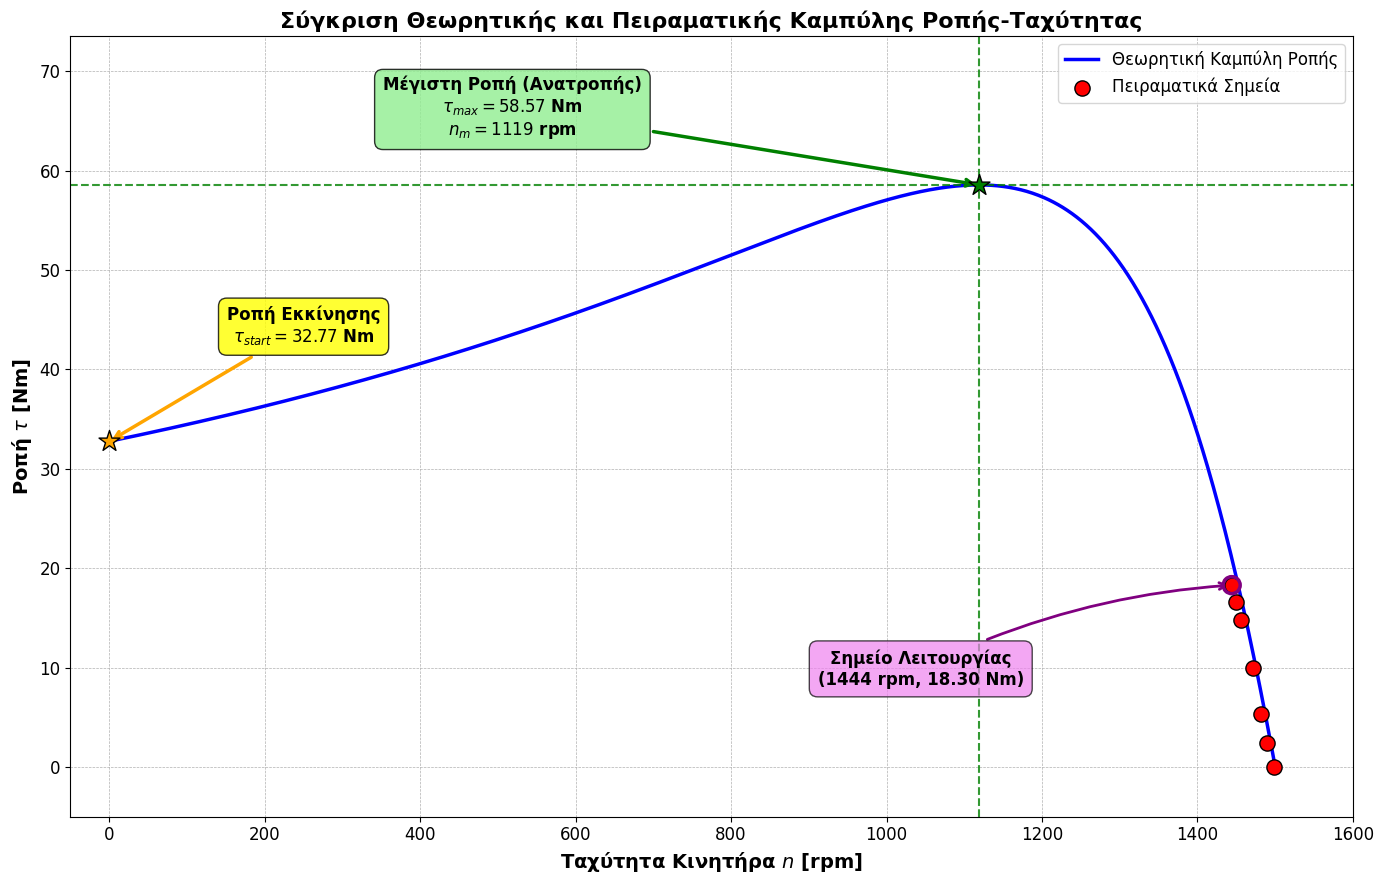

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d

# Ρύθμιση matplotlib για ελληνικούς χαρακτήρες
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12 # Αύξηση μεγέθους γραμματοσειράς για καλύτερη αναγνωσιμότητα

# ========== ΔΕΔΟΜΕΝΑ ΚΙΝΗΤΗΡΑ ==========
# Πειραματικά δεδομένα από τον πίνακα
U_s = np.array([400, 400, 400, 400, 400, 400, 400])  # [V]
I_s = np.array([2.7, 3.0, 3.3, 4.2, 5.2, 5.7, 6.3])  # [A]
P_in = np.array([435, 880, 1355, 2135, 2956, 3286, 3604])  # [W]
n_exp = np.array([1498, 1490, 1482, 1471, 1456, 1450, 1444])  # [rpm]
s_exp = np.array([0.13, 0.67, 1.20, 1.93, 2.93, 3.33, 3.73])  # [%]
P_out = np.array([0.00, 379.40, 831.77, 1540.25, 2252.37, 2522.73, 2766.78])  # [W]
tau_exp = np.array([0.00, 2.43, 5.36, 10.00, 14.77, 16.61, 18.30])  # [Nm]
efficiency = np.array([0.00, 43.11, 61.38, 72.14, 76.20, 76.77, 76.77])  # [%]

# Δεδομένα δοκιμής χωρίς φορτίο (εκτιμώμενα για παράδειγμα)
U_10_test = np.array([200, 250, 300, 350, 400])  # [V]
I_10_test = np.array([1.8, 2.1, 2.4, 2.6, 2.7])  # [A]
P_10_test = np.array([180, 200, 220, 240, 260])  # [W]
P0_test = np.array([230, 240, 255, 275, 295])  # [W]

# Δεδομένα δοκιμής βραχυκυκλώματος (εκτιμώμενα)
U_1k_test = np.array([50, 75, 100, 125, 150])  # [V]
I_1k_test = np.array([2.5, 3.8, 5.0, 6.3, 7.5])  # [A]
cos_phi_k = np.array([0.25, 0.30, 0.35, 0.40, 0.45])

# Παράμετροι κινητήρα
n_s = 1500  # Σύγχρονη ταχύτητα [rpm]
omega_s = 2 * np.pi * n_s / 60  # [rad/s]
V_phi = 400 / np.sqrt(3)  # Φασική τάση [V]

# ========== ΒΕΛΤΙΩΜΕΝΗ ΓΡΑΦΙΚΗ 3: Θεωρητική vs Πειραματική Καμπύλη Ροπής ==========

# **ΒΕΛΤΙΩΣΗ**: Χρήση των παραμέτρων που υπολογίστηκαν από την ανάλυση της αναφοράς
# για καλύτερη αντιστοιχία θεωρίας-πειράματος.
R_s = 2.44        # Ωμική αντίσταση στάτη [Ω]
R_r_prime = 1.59  # Ανηγμένη αντίσταση δρομέα [Ω]
X_s = 2.88        # Αντίδραση σκέδασης στάτη [Ω]
X_r_prime = 2.88  # Ανηγμένη αντίδραση σκέδασης δρομέα [Ω]

# Θεωρητικός υπολογισμός ροπής
n_theory = np.linspace(0, n_s, 1000) # Υπολογισμός από n=0 για να έχουμε τη ροπή εκκίνησης
s_theory = (n_s - n_theory) / n_s
# Αποφυγή διαίρεσης με μηδέν στην σύγχρονη ταχύτητα
s_theory[s_theory <= 1e-6] = 1e-6

# Πλήρης εξίσωση ροπής
tau_theory = (3 * V_phi**2 * (R_r_prime / s_theory)) / \
             (omega_s * ((R_s + R_r_prime/s_theory)**2 + (X_s + X_r_prime)**2))

# Εύρεση μέγιστης ροπής (ανατροπής)
max_tau_idx = np.argmax(tau_theory)
tau_max = tau_theory[max_tau_idx]
n_max = n_theory[max_tau_idx]

# Εύρεση ροπής εκκίνησης (n=0, s=1)
tau_start = tau_theory[0]

# Δημιουργία της βελτιωμένης γραφικής παράστασης
fig3, ax = plt.subplots(figsize=(14, 9))

# 1. Θεωρητική καμπύλη
ax.plot(n_theory, tau_theory, 'b-', linewidth=2.5, label='Θεωρητική Καμπύλη Ροπής')

# 2. Πειραματικά σημεία
ax.scatter(n_exp, tau_exp, color='red', s=120, edgecolor='black', zorder=5, label='Πειραματικά Σημεία')

# 3. Επισήμανση μέγιστης ροπής (ανατροπής)
ax.axhline(y=tau_max, color='green', linestyle='--', alpha=0.8)
ax.axvline(x=n_max, color='green', linestyle='--', alpha=0.8)
ax.scatter([n_max], [tau_max], color='green', s=250, marker='*', edgecolor='black', zorder=5)
ax.annotate(f'Μέγιστη Ροπή (Ανατροπής)\n$\\tau_{{max}} = {tau_max:.2f}$ Nm\n$n_m = {n_max:.0f}$ rpm',
            xy=(n_max, tau_max), xytext=(n_max - 600, tau_max + 5),
            arrowprops=dict(arrowstyle='->', color='green', lw=2.5),
            fontsize=12, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

# 4. Επισήμανση ροπής εκκίνησης
ax.scatter([0], [tau_start], color='orange', s=250, marker='*', edgecolor='black', zorder=5)
ax.annotate(f'Ροπή Εκκίνησης\n$\\tau_{{start}} = {tau_start:.2f}$ Nm',
            xy=(0, tau_start), xytext=(250, tau_start + 10),
            arrowprops=dict(arrowstyle='->', color='orange', lw=2.5),
            fontsize=12, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8))

# 5. Επισήμανση σημείου λειτουργίας κοντά στο ονομαστικό
last_n = n_exp[-1]
last_tau = tau_exp[-1]
ax.scatter(last_n, last_tau, s=150, facecolors='none', edgecolors='purple', linewidth=2.5, zorder=6)
ax.annotate(f'Σημείο Λειτουργίας\n({last_n} rpm, {last_tau:.2f} Nm)',
            xy=(last_n, last_tau), xytext=(last_n - 400, last_tau - 10),
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-0.1", color='purple', lw=2),
            fontsize=12, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="violet", alpha=0.7))


# Ρυθμίσεις εμφάνισης γραφήματος
ax.set_xlabel('Ταχύτητα Κινητήρα $n$ [rpm]', fontsize=14, fontweight='bold')
ax.set_ylabel('Ροπή $\\tau$ [Nm]', fontsize=14, fontweight='bold')
ax.set_title('Σύγκριση Θεωρητικής και Πειραματικής Καμπύλης Ροπής-Ταχύτητας', fontsize=16, fontweight='bold')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(fontsize=12, loc='upper right')
ax.set_xlim(-50, 1600)
ax.set_ylim(-5, max(tau_theory) + 15) # Δυναμικό όριο y-άξονα

plt.tight_layout()
plt.show()

# Εκτύπωση των υπολοίπων γραφημάτων (ο κώδικας παραμένει ο ίδιος)
# ... (μπορείτε να προσθέσετε εδώ τον υπόλοιπο κώδικα για τις άλλες γραφικές)